# Load the libraries

In [1247]:
library(data.table);
library(ggplot2);
library(repr)
library(reshape2)
##library(gplots)
library(pheatmap)
library(cowplot)
library(RColorBrewer)
source("pca_cell_type_plot.R")

In [961]:
options(repr.plot.width = 3, repr.plot.height = 3, repr.plot.res=80)
name <- "CLUESImmVar_processed.V5.1";

# Load the necessary input

## Load the covariates from ```/ye/yelabstore2/10x.lupus/eqtls/demux.v2```

In [962]:
cm_covs <- fread("v5.expr/v5.full.cM.immvar21.covs.txt");
colnames(cm_covs) <- sapply(colnames(cm_covs), function(x) {strsplit(x,"_")[[1]][[1]]})
covs_gene_names <- cm_covs$V1;
cm_covs <- as.matrix(cm_covs[,-1]);

th_covs <- as.matrix(fread("v5.expr/v5.full.Th.immvar21.covs.txt")[,-1]);
colnames(th_covs) <- sapply(colnames(th_covs), function(x) {strsplit(x,"_")[[1]][[1]]})

tc_covs <- as.matrix(fread("v5.expr/v5.full.Tc.immvar21.covs.txt")[,-1]);
colnames(tc_covs) <- sapply(colnames(tc_covs), function(x) {strsplit(x,"_")[[1]][[1]]})

ncm_covs <- as.matrix(fread("v5.expr/v5.full.ncM.immvar21.covs.txt")[,-1]);
colnames(ncm_covs) <- sapply(colnames(ncm_covs), function(x) {strsplit(x,"_")[[1]][[1]]})

b_covs <- as.matrix(fread("v5.expr/v5.full.B.immvar21.covs.txt")[,-1]);
colnames(b_covs) <- sapply(colnames(b_covs), function(x) {strsplit(x,"_")[[1]][[1]]})

nk_covs <- as.matrix(fread("v5.expr/v5.full.NK.immvar21.covs.txt")[,-1]);
colnames(nk_covs) <- sapply(colnames(nk_covs), function(x) {strsplit(x,"_")[[1]][[1]]})

dc_covs <- as.matrix(fread("v5.expr/v5.full.cDC.immvar21.covs.txt")[,-1]);
colnames(dc_covs) <- sapply(colnames(dc_covs), function(x) {strsplit(x,"_")[[1]][[1]]})

pbmc_covs <- as.matrix(fread("v5.expr/v5.full.PBMC.immvar21.covs.txt")[,-1]);
colnames(pbmc_covs) <- sapply(colnames(pbmc_covs), function(x) {strsplit(x,"_")[[1]][[1]]})

rownames(pbmc_covs) <- rownames(cm_covs) <- rownames(th_covs) <- rownames(tc_covs) <- rownames(ncm_covs) <- rownames(b_covs) <- rownames(nk_covs) <-rownames(dc_covs) <- covs_gene_names;


## Load the processed expression data from ```/ye/yelabstore2/10x.lupus/eqtls/demux.v2```

In [963]:
cm_expr <- fread("v5.expr/v5.full.cM.immvar21.expr.txt");
colnames(cm_expr) <- sapply(colnames(cm_expr), function(x) {strsplit(x,"_")[[1]][[1]]})
expr_gene_names <- cm_expr$V1;
cm_expr <- as.matrix(cm_expr[,-1]);

th_expr <- as.matrix(fread("v5.expr/v5.full.Th.immvar21.expr.txt")[,-1]);
colnames(th_expr) <- sapply(colnames(th_expr), function(x) {strsplit(x,"_")[[1]][[1]]})

tc_expr <- as.matrix(fread("v5.expr/v5.full.Tc.immvar21.expr.txt")[,-1]);
colnames(tc_expr) <- sapply(colnames(tc_expr), function(x) {strsplit(x,"_")[[1]][[1]]})

ncm_expr <- as.matrix(fread("v5.expr/v5.full.ncM.immvar21.expr.txt")[,-1]);
colnames(ncm_expr) <- sapply(colnames(ncm_expr), function(x) {strsplit(x,"_")[[1]][[1]]})

b_expr <- as.matrix(fread("v5.expr/v5.full.B.immvar21.expr.txt")[,-1]);
colnames(b_expr) <- sapply(colnames(b_expr), function(x) {strsplit(x,"_")[[1]][[1]]})

nk_expr <- as.matrix(fread("v5.expr/v5.full.NK.immvar21.expr.txt")[,-1]);
colnames(nk_expr) <- sapply(colnames(nk_expr), function(x) {strsplit(x,"_")[[1]][[1]]})

dc_expr <- as.matrix(fread("v5.expr/v5.full.cDC.immvar21.expr.txt")[,-1]);
colnames(dc_expr) <- sapply(colnames(dc_expr), function(x) {strsplit(x,"_")[[1]][[1]]})

pbmc_expr <- as.matrix(fread("v5.expr/v5.full.PBMC.immvar21.expr.txt")[,-1]);
colnames(pbmc_expr) <- sapply(colnames(pbmc_expr), function(x) {strsplit(x,"_")[[1]][[1]]})

rownames(pbmc_expr) <- rownames(cm_expr) <- rownames(th_expr) <- rownames(tc_expr) <- rownames(ncm_expr) <- rownames(b_expr) <- rownames(nk_expr) <-rownames(dc_expr) <- expr_gene_names;

## do a quick filter for all zeros
any_zeros = unique(c(which(rowSums(pbmc_expr) ==0),
                     which(rowSums(cm_expr)==0),
                     which(rowSums(ncm_expr)==0),
                     which(rowSums(th_expr)==0),
                     which(rowSums(tc_expr)==0),
                     which(rowSums(b_expr)==0),
                     which(rowSums(nk_expr)==0),
                     which(rowSums(dc_expr)==0)))
pbmc_expr <- pbmc_expr[-any_zeros,];
cm_expr <- cm_expr[-any_zeros,];
ncm_expr <- ncm_expr[-any_zeros,];
th_expr <- th_expr[-any_zeros,];
tc_expr <- tc_expr[-any_zeros,];
b_expr <- b_expr[-any_zeros,];
nk_expr <- nk_expr[-any_zeros,];
dc_expr <- dc_expr[-any_zeros,];
expr_gene_names <- expr_gene_names[-any_zeros];


Warning message in fread("v5.expr/v5.full.cM.immvar21.expr.txt"):
“Detected 206 column names but the data has 207 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”Warning message in fread("v5.expr/v5.full.Th.immvar21.expr.txt"):
“Detected 206 column names but the data has 207 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”Warning message in fread("v5.expr/v5.full.Tc.immvar21.expr.txt"):
“Detected 206 column names but the data has 207 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use 

## filter samples

In [964]:
joined_pivot <- fread(paste(name,'_joined_pivot_ct_perc.txt', sep=""), sep=",")

In [965]:
## let's remove the broad samples for now
ind_cov = sapply(cm_covs[,"sample"], function(x) {strsplit(as.character(x),"_")[[1]][[1]]})
ind_cov_batch = paste(ind_cov, cm_covs[,"batch"], "_")
joined_ind_cov_batch = paste(joined_pivot$ind_cov, joined_pivot$batch, "_")
ucsf_samples_nodups <- na.omit(match(joined_ind_cov_batch, ind_cov_batch));

## below also works but may not get exactly the same sample
# ucsf_samples <- grep("lupus",cm_covs[,"batch"]);
# ucsf_samples_nodups <- ucsf_samples[!duplicated(colnames(cm_expr)[ucsf_samples])];

cm_expr <- cm_expr[,ucsf_samples_nodups];
th_expr <- th_expr[,ucsf_samples_nodups];
tc_expr <- tc_expr[,ucsf_samples_nodups];
ncm_expr <- ncm_expr[,ucsf_samples_nodups];
b_expr <- b_expr[,ucsf_samples_nodups];
nk_expr <- nk_expr[,ucsf_samples_nodups];
dc_expr <- dc_expr[,ucsf_samples_nodups];
pbmc_expr <- pbmc_expr[,ucsf_samples_nodups];

sle_indices <- setdiff((1:ncol(pbmc_expr)), grep("IGTB",colnames(pbmc_expr)))
sle_colnames <- colnames(pbmc_expr)[sle_indices]

cm_sle_expr <- cm_expr[,sle_indices]
th_sle_expr <- th_expr[,sle_indices]
tc_sle_expr <- tc_expr[,sle_indices]
ncm_sle_expr <- ncm_expr[,sle_indices]
b_sle_expr <- b_expr[,sle_indices]
nk_sle_expr <- nk_expr[,sle_indices]
dc_sle_expr <- dc_expr[,sle_indices]
pbmc_sle_expr <- pbmc_expr[,sle_indices]

healthy_indices <- grep("IGTB",colnames(pbmc_expr))
healthy_colnames <- colnames(pbmc_expr)[healthy_indices]

cm_healthy_expr <- cm_expr[,healthy_indices]
th_healthy_expr <- th_expr[,healthy_indices]
tc_healthy_expr <- tc_expr[,healthy_indices]
ncm_healthy_expr <- ncm_expr[,healthy_indices]
b_healthy_expr <- b_expr[,healthy_indices]
nk_healthy_expr <- nk_expr[,healthy_indices]
dc_healthy_expr <- dc_expr[,healthy_indices]
pbmc_healthy_expr <- pbmc_expr[,healthy_indices]

In [966]:
standardize <- function(x) {(x-mean(x))/sd(x)}

pbmc_expr_std <- t(apply(pbmc_expr,1,standardize))
cm_expr_std <- t(apply(cm_expr,1,standardize))
cm_expr_std[is.na(cm_expr_std)] <- 0
th_expr_std <- t(apply(th_expr,1,standardize))
th_expr_std[is.na(th_expr_std)] <- 0
b_expr_std <- t(apply(b_expr,1,standardize))
b_expr_std[is.na(b_expr_std)] <- 0
nk_expr_std <- t(apply(nk_expr,1,standardize))
nk_expr_std[is.na(nk_expr_std)] <- 0
ncm_expr_std <- t(apply(ncm_expr,1,standardize))
ncm_expr_std[is.na(ncm_expr_std)] <- 0
tc_expr_std <- t(apply(tc_expr,1,standardize))
tc_expr_std[is.na(tc_expr_std)] <- 0
dc_expr_std <- t(apply(dc_expr,1,standardize))
dc_expr_std[is.na(dc_expr_std)] <- 0


In [967]:
pbmc_expr_prcomp <- prcomp(pbmc_expr)

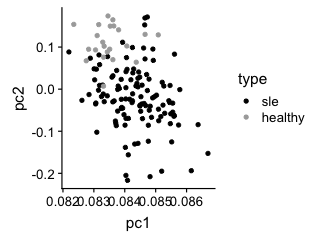

In [968]:
df <- rbind(data.frame(pc1=pbmc_expr_prcomp$rotation[1:ncol(pbmc_sle_expr),1], pc2=pbmc_expr_prcomp$rotation[1:ncol(pbmc_sle_expr),2], type="sle"),
            data.frame(pc1=pbmc_expr_prcomp$rotation[(ncol(pbmc_sle_expr)+1):ncol(pbmc_expr),1], pc2=pbmc_expr_prcomp$rotation[(ncol(pbmc_sle_expr)+1):ncol(pbmc_expr),2], type="healthy"))

options(repr.plot.width = 4, repr.plot.height = 3)
ggplot(aes(pc1,pc2,color=type),data=df)+geom_point()+scale_colour_manual(values=c("black","darkgray"))

## Load the raw counts from ```/ye/yelabstore2/10x.lupus/disease/demux.v2```

In [969]:
## either load only the original samples

# cm_counts <- fread("v2.deseq/norep.noadjrace.CD14+.Monocytes.counts.txt");
# colnames(cm_counts) <- sapply(colnames(cm_counts), function(x) {strsplit(x,"_")[[1]][[1]]})

# th_counts <- fread("v2.deseq/norep.noadjrace.CD4.T.cells.counts.txt");
# colnames(th_counts) <- sapply(colnames(th_counts), function(x) {strsplit(x,"_")[[1]][[1]]})

# tc_counts <- fread("v2.deseq/norep.noadjrace.CD8.T.cells.counts.txt");
# colnames(tc_counts) <- sapply(colnames(tc_counts), function(x) {strsplit(x,"_")[[1]][[1]]})

# ncm_counts <- fread("v2.deseq/norep.noadjrace.FCGR3A+.Monocytes.counts.txt");
# colnames(ncm_counts) <- sapply(colnames(ncm_counts), function(x) {strsplit(x,"_")[[1]][[1]]})

# b_counts <- fread("v2.deseq/norep.noadjrace.B.cells.counts.txt");
# colnames(b_counts) <- sapply(colnames(b_counts), function(x) {strsplit(x,"_")[[1]][[1]]})

# nk_counts <- fread("v2.deseq/norep.noadjrace.NK.cells.counts.txt");
# colnames(nk_counts) <- sapply(colnames(nk_counts), function(x) {strsplit(x,"_")[[1]][[1]]})

# dc_counts <- fread("v2.deseq/norep.noadjrace.Dendritic.cells.counts.txt");
# colnames(dc_counts) <- sapply(colnames(dc_counts), function(x) {strsplit(x,"_")[[1]][[1]]})

# pbmc_counts <- fread("v2.deseq/norep.noadjrace.PBMC.counts.txt");
# colnames(pbmc_counts) <- sapply(colnames(pbmc_counts), function(x) {strsplit(x,"_")[[1]][[1]]})


## or new with immvar as separate

cm_counts <- fread("v5.deseq/v5.cM.counts.txt");
colnames(cm_counts) <- sapply(colnames(cm_counts), function(x) {strsplit(x,"_")[[1]][[1]]})

th_counts <- fread("v5.deseq/v5.Th.counts.txt");
colnames(th_counts) <- sapply(colnames(th_counts), function(x) {strsplit(x,"_")[[1]][[1]]})

tc_counts <- fread("v5.deseq/v5.Tc.counts.txt");
colnames(tc_counts) <- sapply(colnames(tc_counts), function(x) {strsplit(x,"_")[[1]][[1]]})

ncm_counts <- fread("v5.deseq/v5.ncM.counts.txt");
colnames(ncm_counts) <- sapply(colnames(ncm_counts), function(x) {strsplit(x,"_")[[1]][[1]]})

b_counts <- fread("v5.deseq/v5.B.counts.txt");
colnames(b_counts) <- sapply(colnames(b_counts), function(x) {strsplit(x,"_")[[1]][[1]]})

nk_counts <- fread("v5.deseq/v5.NK.counts.txt");
colnames(nk_counts) <- sapply(colnames(nk_counts), function(x) {strsplit(x,"_")[[1]][[1]]})

dc_counts <- fread("v5.deseq/v5.cDC.counts.txt");
colnames(dc_counts) <- sapply(colnames(dc_counts), function(x) {strsplit(x,"_")[[1]][[1]]})

pbmc_counts <- fread("v5.deseq/v5.PBMC.counts.txt");
colnames(pbmc_counts) <- sapply(colnames(pbmc_counts), function(x) {strsplit(x,"_")[[1]][[1]]})


counts_gene_names <- cm_counts$gene;
cm_counts <- as.matrix(cm_counts[,-1]);
pbmc_counts <- as.matrix(pbmc_counts[,-1]);
th_counts <- as.matrix(th_counts[,-1]);
tc_counts <- as.matrix(tc_counts[,-1]);
b_counts <- as.matrix(b_counts[,-1]);
ncm_counts <- as.matrix(ncm_counts[,-1]);
nk_counts <- as.matrix(nk_counts[,-1]);
dc_counts <- as.matrix(dc_counts[,-1]);

all_counts_samples <- na.omit(match(colnames(pbmc_expr), colnames(pbmc_counts)))

cm_counts <- cm_counts[,all_counts_samples]
pbmc_counts <- pbmc_counts[,all_counts_samples]
th_counts <- th_counts[,all_counts_samples]
tc_counts <- tc_counts[,all_counts_samples]
b_counts <- b_counts[,all_counts_samples]
ncm_counts <- ncm_counts[,all_counts_samples]
nk_counts <- nk_counts[,all_counts_samples]
dc_counts <- dc_counts[,all_counts_samples]

sle_counts_samples <- na.omit(match(colnames(pbmc_sle_expr), colnames(pbmc_counts)))

cm_sle_counts <- cm_counts[,sle_counts_samples]
th_sle_counts <- th_counts[,sle_counts_samples]
tc_sle_counts <- tc_counts[,sle_counts_samples]
ncm_sle_counts <- ncm_counts[,sle_counts_samples]
b_sle_counts <- b_counts[,sle_counts_samples]
nk_sle_counts <- nk_counts[,sle_counts_samples]
dc_sle_counts <- dc_counts[,sle_counts_samples]
pbmc_sle_counts <- pbmc_counts[,sle_counts_samples]


healthy_counts_samples <- na.omit(match(colnames(pbmc_healthy_expr), colnames(pbmc_counts)))

cm_healthy_counts <- cm_counts[,healthy_counts_samples]
th_healthy_counts <- th_counts[,healthy_counts_samples]
tc_healthy_counts <- tc_counts[,healthy_counts_samples]
ncm_healthy_counts <- ncm_counts[,healthy_counts_samples]
b_healthy_counts <- b_counts[,healthy_counts_samples]
nk_healthy_counts <- nk_counts[,healthy_counts_samples]
dc_healthy_counts <- dc_counts[,healthy_counts_samples]
pbmc_healthy_counts <- pbmc_counts[,healthy_counts_samples]



Warning message in fread("v5.deseq/v5.cM.counts.txt"):
“Detected 141 column names but the data has 142 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”Warning message in fread("v5.deseq/v5.Th.counts.txt"):
“Detected 141 column names but the data has 142 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”Warning message in fread("v5.deseq/v5.Tc.counts.txt"):
“Detected 141 column names but the data has 142 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this gue

In [970]:
# pbmc_covars <- as.data.frame(fread("v2.expr/v2.PBMC.covs.use.txt"))[,-1];
# cm_covars <- as.data.frame(fread("v2.expr/v2.CD14+.Monocytes.covs.use.txt"))[,-1];
# th_covars <- as.data.frame(fread("v2.expr/v2.CD4.T.cells.covs.use.txt"))[,-1];
# tc_covars <- as.data.frame(fread("v2.expr/v2.CD8.T.cells.covs.use.txt"))[,-1];
# ncm_covars <- as.data.frame(fread("v2.expr/v2.FCGR3A+.Monocytes.covs.use.txt"))[,-1];
# b_covars <- as.data.frame(fread("v2.expr/v2.B.cells.covs.use.txt"))[,-1];
# dc_covars <- as.data.frame(fread("v2.expr/v2.Dendritic.cells.covs.use.txt"))[,-1];

## Load the differentially expression results

In [1264]:
pbmc_deseq <- fread("v5.deseq/v5..PBMC.deseq.txt")##as.data.frame()
th_deseq <- as.data.frame(fread("v5.deseq/v5..Th.deseq.txt"))
tc_deseq <- as.data.frame(fread("v5.deseq/v5..Tc.deseq.txt"))
cm_deseq <- as.data.frame(fread("v5.deseq/v5..cM.deseq.txt"))
ncm_deseq <- as.data.frame(fread("v5.deseq/v5..ncM.deseq.txt"))
b_deseq <- as.data.frame(fread("v5.deseq/v5..B.deseq.txt"))
nk_deseq <- as.data.frame(fread("v5.deseq/v5..NK.deseq.txt"))
dc_deseq <- as.data.frame(fread("v5.deseq/v5..cDC.deseq.txt"))

pbmc_deseq_sig <- as.data.frame(fread("v5.deseq/v5..PBMC.deseq.sig.txt",header=F))$V1
th_deseq_sig <- as.data.frame(fread("v5.deseq/v5..Th.deseq.sig.txt",header=F))$V1
tc_deseq_sig <- as.data.frame(fread("v5.deseq/v5..Tc.deseq.sig.txt",header=F))$V1
cm_deseq_sig <- as.data.frame(fread("v5.deseq/v5..cM.deseq.sig.txt",header=F))$V1
ncm_deseq_sig <- as.data.frame(fread("v5.deseq/v5..ncM.deseq.sig.txt",header=F))$V1
b_deseq_sig <- as.data.frame(fread("v5.deseq/v5..B.deseq.sig.txt",header=F))$V1
nk_deseq_sig <- as.data.frame(fread("v5.deseq/v5..NK.deseq.sig.txt",header=F))$V1
dc_deseq_sig <- as.data.frame(fread("v5.deseq/v5..cDC.deseq.sig.txt",header=F))$V1
union_deseq_sig <- unique(c(pbmc_deseq_sig, cm_deseq_sig, th_deseq_sig, 
                            tc_deseq_sig, b_deseq_sig, ncm_deseq_sig, nk_deseq_sig, dc_deseq_sig));

Warning message in fread("v5.deseq/v5..PBMC.deseq.txt"):
“Detected 7 column names but the data has 8 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”Warning message in fread("v5.deseq/v5..Th.deseq.txt"):
“Detected 7 column names but the data has 8 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”Warning message in fread("v5.deseq/v5..Tc.deseq.txt"):
“Detected 7 column names but the data has 8 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not 

In [972]:
pbmc_deseq_sig_genes <- pbmc_deseq$V1[intersect(which(abs(pbmc_deseq$log2FoldChange)>1),which(pbmc_deseq$qval < 0.05))]
cm_deseq_sig_genes <- cm_deseq$V1[intersect(which(abs(cm_deseq$log2FoldChange)>1),which(cm_deseq$qval < 0.05))]
th_deseq_sig_genes <- th_deseq$V1[intersect(which(abs(th_deseq$log2FoldChange)>1),which(th_deseq$qval < 0.05))]
tc_deseq_sig_genes <- tc_deseq$V1[intersect(which(abs(tc_deseq$log2FoldChange)>1),which(tc_deseq$qval < 0.05))]
b_deseq_sig_genes <- b_deseq$V1[intersect(which(abs(b_deseq$log2FoldChange)>1),which(b_deseq$qval < 0.05))]
ncm_deseq_sig_genes <- ncm_deseq$V1[intersect(which(abs(ncm_deseq$log2FoldChange)>1),which(ncm_deseq$qval < 0.05))]
nk_deseq_sig_genes <- nk_deseq$V1[intersect(which(abs(nk_deseq$log2FoldChange)>1),which(nk_deseq$qval < 0.05))]
dc_deseq_sig_genes <- dc_deseq$V1[intersect(which(abs(dc_deseq$log2FoldChange)>1),which(dc_deseq$qval < 0.05))]

# union_deseq_sig_genes <- unique(c(pbmc_deseq_sig_genes, cm_deseq_sig_genes, ncm_deseq_sig_genes, dc_deseq_sig_genes, th_deseq_sig_genes, tc_deseq_sig_genes,  nk_deseq_sig_genes,b_deseq_sig_genes))
# union_deseq_sig_genes <- intersect(union_deseq_sig_genes, pbmc_deseq$V1[which(pbmc_deseq$baseMean>20)])
# length(union_deseq_sig_genes)
# length(pbmc_deseq_sig_genes)
# length(intersect(pbmc_deseq_sig_genes, union_deseq_sig_genes))
# union_deseq_sig_genes <- union_deseq_sig_genes[-grep("IGLL5",union_deseq_sig_genes)]

In [973]:
standardize <- function(x) {(x-mean(x))/sd(x)}

all_expr_standardize <- data.frame(pbmc=t(apply(pbmc_expr,1,standardize)),
                      cm=t(apply(cm_expr,1,standardize)),
                      ncm=t(apply(ncm_expr,1,standardize)),
                      dc=t(apply(dc_expr,1,standardize)),
                      th=t(apply(th_expr,1,standardize)),
                      tc=t(apply(tc_expr,1,standardize)),
                       nk=t(apply(nk_expr,1,standardize)),
                      b=t(apply(b_expr,1,standardize)),
                        dc=t(apply(dc_expr,1,standardize))
                      )


all_expr <- data.frame(pbmc=pbmc_expr,
                      cm=cm_expr,
                      ncm=ncm_expr,
                      dc=dc_expr,
                      th=th_expr,
                      tc=tc_expr,
                       nk=nk_expr,
                      b=b_expr
                      )

all_expr_sle <- data.frame(pbmc=pbmc_sle_expr,
                      cm=cm_sle_expr,
                      ncm=ncm_sle_expr,
                      dc=dc_sle_expr,
                      th=th_sle_expr,
                      tc=tc_sle_expr,
                       nk=nk_sle_expr,
                      b=b_sle_expr
                      )
rownames(all_expr_sle) <- rownames(all_expr)


## Load the joined table and preprocess the expression and counts data

In [975]:
joined_pivot <- fread(paste(name,'_joined_pivot_ct_perc.txt', sep=""), sep=",")
joined_pivot <- as.data.frame(joined_pivot);
## filter for ucsf healthy only
##joined_pivot <- joined_pivot[grep("lupus",joined_pivot$batch_cov),]

joined_pivot$batch_cov <- as.factor(joined_pivot$batch_cov)

joined_pivot_filtered <- joined_pivot[match(c(colnames(pbmc_sle_expr),colnames(pbmc_healthy_expr)),joined_pivot$ind_cov),]
joined_pivot_sle <- joined_pivot[match(colnames(pbmc_sle_expr), joined_pivot$ind_cov),]
joined_pivot_healthy <- joined_pivot[match(colnames(pbmc_healthy_expr), joined_pivot$ind_cov),]

## get the cell type proportions

In [976]:
cm_prop = joined_pivot_filtered$"cM";##/joined_pivot_filtered$pbmc;
th_prop = joined_pivot_filtered$"Th";##/joined_pivot_filtered$pbmc;
b_prop = joined_pivot_filtered$"B";##/joined_pivot_filtered$pbmc;
nk_prop = joined_pivot_filtered$"NK";##/joined_pivot_filtered$pbmc;
ncm_prop = joined_pivot_filtered$"ncM";#/joined_pivot_filtered$pbmc;
tc_prop = joined_pivot_filtered$"Tc";#/joined_pivot_filtered$pbmc;
dc_prop = joined_pivot_filtered$"cDC";#/joined_pivot_filtered$pbmc;

## set the NAs to 0
b_prop[which(is.na(b_prop))] <- 0;
dc_prop[which(is.na(dc_prop))] <- 0;

cm_sle_prop = cm_prop[match(colnames(pbmc_sle_expr), joined_pivot_filtered$ind_cov)]
th_sle_prop = th_prop[match(colnames(pbmc_sle_expr), joined_pivot_filtered$ind_cov)]
b_sle_prop = b_prop[match(colnames(pbmc_sle_expr), joined_pivot_filtered$ind_cov)]
nk_sle_prop = nk_prop[match(colnames(pbmc_sle_expr), joined_pivot_filtered$ind_cov)]
ncm_sle_prop = ncm_prop[match(colnames(pbmc_sle_expr), joined_pivot_filtered$ind_cov)]
tc_sle_prop = tc_prop[match(colnames(pbmc_sle_expr), joined_pivot_filtered$ind_cov)]
dc_sle_prop = dc_prop[match(colnames(pbmc_sle_expr), joined_pivot_filtered$ind_cov)]

cm_healthy_prop = cm_prop[match(colnames(pbmc_healthy_expr), joined_pivot_filtered$ind_cov)]
th_healthy_prop = th_prop[match(colnames(pbmc_healthy_expr), joined_pivot_filtered$ind_cov)]
b_healthy_prop = b_prop[match(colnames(pbmc_healthy_expr), joined_pivot_filtered$ind_cov)]
nk_healthy_prop = nk_prop[match(colnames(pbmc_healthy_expr), joined_pivot_filtered$ind_cov)]
ncm_healthy_prop = ncm_prop[match(colnames(pbmc_healthy_expr), joined_pivot_filtered$ind_cov)]
tc_healthy_prop = tc_prop[match(colnames(pbmc_healthy_expr), joined_pivot_filtered$ind_cov)]
dc_healthy_prop = dc_prop[match(colnames(pbmc_healthy_expr), joined_pivot_filtered$ind_cov)]

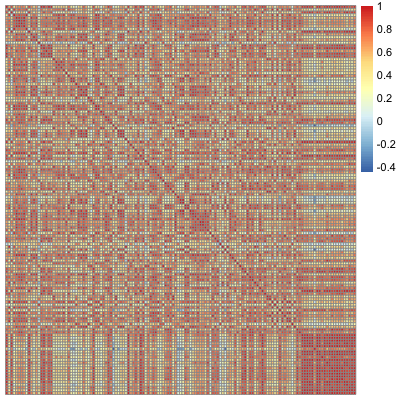

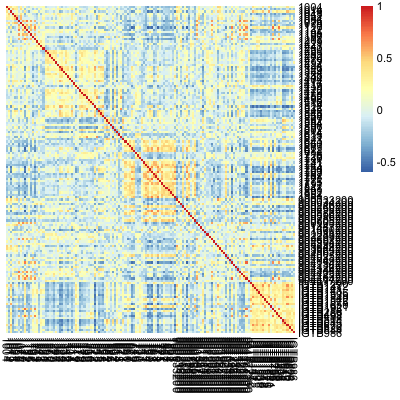

In [977]:
options(repr.plot.width = 5, repr.plot.height = 5)
pheatmap(cor(t(cbind(cm_prop, th_prop, b_prop, nk_prop, ncm_prop, tc_prop, dc_prop))),cluster_rows=F,cluster_cols=F)
options(repr.plot.width = 5, repr.plot.height = 5)
pheatmap(cor(cbind(pbmc_expr_std)),cluster_rows=F,cluster_cols=F)

# Let's do some batch adjustments

## first, let's adjust cell type proportion

In [987]:
cm_prop_mean = lm(cm_prop~1)$fitted;
th_prop_mean = lm(th_prop~1)$fitted;
b_prop_mean = lm(b_prop~1)$fitted;
nk_prop_mean = lm(nk_prop~1)$fitted;
ncm_prop_mean = lm(ncm_prop~1)$fitted;
tc_prop_mean = lm(tc_prop~1)$fitted;
dc_prop_mean = lm(dc_prop~1)$fitted;

cm_prop = lm(cm_prop~joined_pivot_filtered$batch_cov)$residual+cm_prop_mean;
th_prop = lm(th_prop~joined_pivot_filtered$batch_cov)$residual+th_prop_mean;
b_prop = lm(b_prop~joined_pivot_filtered$batch_cov)$residual+b_prop_mean;
nk_prop = lm(nk_prop~joined_pivot_filtered$batch_cov)$residual+nk_prop_mean;
ncm_prop = lm(ncm_prop~joined_pivot_filtered$batch_cov)$residual+ncm_prop_mean;
tc_prop = lm(tc_prop~joined_pivot_filtered$batch_cov)$residual+tc_prop_mean;
dc_prop = lm(dc_prop~joined_pivot_filtered$batch_cov)$residual+dc_prop_mean;
props <- as.matrix(data.frame(cm=cm_prop, th=th_prop, nk=nk_prop, ncm=ncm_prop, tc=tc_prop));

cm_sle_prop_mean = lm(cm_sle_prop~1)$fitted;
th_sle_prop_mean = lm(th_sle_prop~1)$fitted;
b_sle_prop_mean = lm(b_sle_prop~1)$fitted;
ncm_sle_prop_mean = lm(ncm_sle_prop~1)$fitted;
nk_sle_prop_mean = lm(nk_sle_prop~1)$fitted;
tc_sle_prop_mean = lm(tc_sle_prop~1)$fitted;
dc_sle_prop_mean = lm(dc_sle_prop~1)$fitted;

cm_sle_prop = lm(cm_sle_prop~joined_pivot_sle$batch_cov)$residual+cm_sle_prop_mean;
th_sle_prop = lm(th_sle_prop~joined_pivot_sle$batch_cov)$residual+th_sle_prop_mean;
b_sle_prop = lm(b_sle_prop~joined_pivot_sle$batch_cov)$residual+b_sle_prop_mean;
nk_sle_prop = lm(nk_sle_prop~joined_pivot_sle$batch_cov)$residual+nk_sle_prop_mean;
ncm_sle_prop = lm(ncm_sle_prop~joined_pivot_sle$batch_cov)$residual+ncm_sle_prop_mean;
tc_sle_prop = lm(tc_sle_prop~joined_pivot_sle$batch_cov)$residual+tc_sle_prop_mean;
dc_sle_prop = lm(dc_sle_prop~joined_pivot_sle$batch_cov)$residual+dc_sle_prop_mean;
props_sle <- as.matrix(data.frame(cm=cm_sle_prop, th=th_sle_prop, nk=nk_sle_prop, ncm=ncm_sle_prop, tc=tc_sle_prop));

cm_healthy_prop_mean = lm(cm_healthy_prop~1)$fitted;
th_healthy_prop_mean = lm(th_healthy_prop~1)$fitted;
b_healthy_prop_mean = lm(b_healthy_prop~1)$fitted;
ncm_healthy_prop_mean = lm(ncm_healthy_prop~1)$fitted;
nk_healthy_prop_mean = lm(nk_healthy_prop~1)$fitted;
tc_healthy_prop_mean = lm(tc_healthy_prop~1)$fitted;
dc_healthy_prop_mean = lm(dc_healthy_prop~1)$fitted;

cm_healthy_prop = lm(cm_healthy_prop~joined_pivot_healthy$batch_cov)$residual+cm_healthy_prop_mean;
th_healthy_prop = lm(th_healthy_prop~joined_pivot_healthy$batch_cov)$residual+th_healthy_prop_mean;
b_healthy_prop = lm(b_healthy_prop~joined_pivot_healthy$batch_cov)$residual+b_healthy_prop_mean;
nk_healthy_prop = lm(nk_healthy_prop~joined_pivot_healthy$batch_cov)$residual+nk_healthy_prop_mean;
ncm_healthy_prop = lm(ncm_healthy_prop~joined_pivot_healthy$batch_cov)$residual+ncm_healthy_prop_mean;
tc_healthy_prop = lm(tc_healthy_prop~joined_pivot_healthy$batch_cov)$residual+tc_healthy_prop_mean;
dc_healthy_prop = lm(dc_healthy_prop~joined_pivot_healthy$batch_cov)$residual+dc_healthy_prop_mean;
props_healthy <- as.matrix(data.frame(cm=cm_healthy_prop, th=th_healthy_prop, nk=nk_healthy_prop, ncm=ncm_healthy_prop, tc=tc_healthy_prop));


## second, let's adjust cell type specific expression

In [988]:
pbmc_mean <- t(lm(t(pbmc_expr)~1)$fitted)
cm_mean <- t(lm(t(cm_expr)~1)$fitted)
th_mean <- t(lm(t(th_expr)~1)$fitted)
b_mean <- t(lm(t(b_expr)~1)$fitted)
nk_mean <- t(lm(t(nk_expr)~1)$fitted)
ncm_mean <- t(lm(t(ncm_expr)~1)$fitted)
tc_mean <- t(lm(t(tc_expr)~1)$fitted)
dc_mean <- t(lm(t(dc_expr)~1)$fitted)

pbmc_expr <- t(lm(t(pbmc_expr)~joined_pivot_filtered$batch_cov)$residuals)+pbmc_mean
cm_expr <- t(lm(t(cm_expr)~joined_pivot_filtered$batch_cov)$residuals)+cm_mean
th_expr <- t(lm(t(th_expr)~joined_pivot_filtered$batch_cov)$residuals)+th_mean
b_expr <- t(lm(t(b_expr)~joined_pivot_filtered$batch_cov)$residuals)+b_mean
nk_expr <- t(lm(t(nk_expr)~joined_pivot_filtered$batch_cov)$residuals)+nk_mean
ncm_expr <- t(lm(t(ncm_expr)~joined_pivot_filtered$batch_cov)$residuals)+ncm_mean
tc_expr <- t(lm(t(tc_expr)~joined_pivot_filtered$batch_cov)$residuals)+tc_mean
dc_expr <- t(lm(t(dc_expr)~joined_pivot_filtered$batch_cov)$residuals)+dc_mean
exprs <- array(c(cm_expr, th_expr, b_expr, nk_expr, ncm_expr, tc_expr),
               c(nrow(cm_expr) , ncol(cm_expr), 6),
               list(rownames(cm_expr),colnames(cm_expr),c("cM","Th","B","NK","ncM","Tc")))

pbmc_expr_std <- t(apply(pbmc_expr,1,standardize))
cm_expr_std <- t(apply(cm_expr,1,standardize))
cm_expr_std[is.na(cm_expr_std)] <- 0
th_expr_std <- t(apply(th_expr,1,standardize))
th_expr_std[is.na(th_expr_std)] <- 0
b_expr_std <- t(apply(b_expr,1,standardize))
b_expr_std[is.na(b_expr_std)] <- 0
nk_expr_std <- t(apply(nk_expr,1,standardize))
nk_expr_std[is.na(nk_expr_std)] <- 0
ncm_expr_std <- t(apply(ncm_expr,1,standardize))
ncm_expr_std[is.na(ncm_expr_std)] <- 0
tc_expr_std <- t(apply(tc_expr,1,standardize))
tc_expr_std[is.na(tc_expr_std)] <- 0
dc_expr_std <- t(apply(dc_expr,1,standardize))
dc_expr_std[is.na(dc_expr_std)] <- 0
exprs_std <- array(c(cm_expr_std, th_expr_std, nk_expr_std, ncm_expr_std, tc_expr_std),
                   c(nrow(cm_expr) , ncol(cm_expr),5), 
                   list(rownames(cm_expr),colnames(cm_expr),c("cM","Th","NK","ncM","Tc")))

pbmc_sle_mean <- t(lm(t(pbmc_sle_expr)~1)$fitted)
cm_sle_mean <- t(lm(t(cm_sle_expr)~1)$fitted)
th_sle_mean <- t(lm(t(th_sle_expr)~1)$fitted)
b_sle_mean <- t(lm(t(b_sle_expr)~1)$fitted)
nk_sle_mean <- t(lm(t(nk_sle_expr)~1)$fitted)
ncm_sle_mean <- t(lm(t(ncm_sle_expr)~1)$fitted)
tc_sle_mean <- t(lm(t(tc_sle_expr)~1)$fitted)
dc_sle_mean <- t(lm(t(dc_sle_expr)~1)$fitted)

pbmc_sle_expr <- t(lm(t(pbmc_sle_expr)~joined_pivot_sle$batch_cov)$residuals)+pbmc_sle_mean
cm_sle_expr <- t(lm(t(cm_sle_expr)~joined_pivot_sle$batch_cov)$residuals)+cm_sle_mean
th_sle_expr <- t(lm(t(th_sle_expr)~joined_pivot_sle$batch_cov)$residuals)+th_sle_mean
b_sle_expr <- t(lm(t(b_sle_expr)~joined_pivot_sle$batch_cov)$residuals)+b_sle_mean
nk_sle_expr <- t(lm(t(nk_sle_expr)~joined_pivot_sle$batch_cov)$residuals)+nk_sle_mean
ncm_sle_expr <- t(lm(t(ncm_sle_expr)~joined_pivot_sle$batch_cov)$residuals)+ncm_sle_mean
tc_sle_expr <- t(lm(t(tc_sle_expr)~joined_pivot_sle$batch_cov)$residuals)+tc_sle_mean
dc_sle_expr <- t(lm(t(dc_sle_expr)~joined_pivot_sle$batch_cov)$residuals)+dc_sle_mean
exprs_sle <- array(c(cm_sle_expr, th_sle_expr, nk_sle_expr, ncm_sle_expr, tc_sle_expr),
                   c(nrow(cm_sle_expr) , ncol(cm_sle_expr),5),
                   list(rownames(cm_sle_expr),colnames(cm_sle_expr),c("cM","Th","NK","ncM","Tc")))

pbmc_sle_expr_std <- t(apply(pbmc_sle_expr,1,standardize))
cm_sle_expr_std <- t(apply(cm_sle_expr,1,standardize))
cm_sle_expr_std[is.na(cm_sle_expr_std)] <- 0
th_sle_expr_std <- t(apply(th_sle_expr,1,standardize))
th_sle_expr_std[is.na(th_sle_expr_std)] <- 0
b_sle_expr_std <- t(apply(b_sle_expr,1,standardize))
b_sle_expr_std[is.na(b_sle_expr_std)] <- 0
nk_sle_expr_std <- t(apply(nk_sle_expr,1,standardize))
nk_sle_expr_std[is.na(nk_sle_expr_std)] <- 0
ncm_sle_expr_std <- t(apply(ncm_sle_expr,1,standardize))
ncm_sle_expr_std[is.na(ncm_sle_expr_std)] <- 0
tc_sle_expr_std <- t(apply(tc_sle_expr,1,standardize))
tc_sle_expr_std[is.na(tc_sle_expr_std)] <- 0
dc_sle_expr_std <- t(apply(dc_sle_expr,1,standardize))
dc_sle_expr_std[is.na(dc_sle_expr_std)] <- 0
exprs_sle_std <- array(c(cm_sle_expr_std, th_sle_expr_std,  nk_sle_expr_std, ncm_sle_expr_std, tc_sle_expr_std),
                       c(nrow(cm_sle_expr) , ncol(cm_sle_expr), 5),
                       list(rownames(cm_sle_expr),colnames(cm_sle_expr),c("cM","Th","NK","ncM","Tc")))

pbmc_healthy_mean <- t(lm(t(pbmc_healthy_expr)~1)$fitted)
cm_healthy_mean <- t(lm(t(cm_healthy_expr)~1)$fitted)
th_healthy_mean <- t(lm(t(th_healthy_expr)~1)$fitted)
b_healthy_mean <- t(lm(t(b_healthy_expr)~1)$fitted)
nk_healthy_mean <- t(lm(t(nk_healthy_expr)~1)$fitted)
ncm_healthy_mean <- t(lm(t(ncm_healthy_expr)~1)$fitted)
tc_healthy_mean <- t(lm(t(tc_healthy_expr)~1)$fitted)
dc_healthy_mean <- t(lm(t(dc_healthy_expr)~1)$fitted)

pbmc_healthy_expr <- t(lm(t(pbmc_healthy_expr)~joined_pivot_healthy$batch_cov)$residuals)+pbmc_healthy_mean
cm_healthy_expr <- t(lm(t(cm_healthy_expr)~joined_pivot_healthy$batch_cov)$residuals)+cm_healthy_mean
th_healthy_expr <- t(lm(t(th_healthy_expr)~joined_pivot_healthy$batch_cov)$residuals)+th_healthy_mean
b_healthy_expr <- t(lm(t(b_healthy_expr)~joined_pivot_healthy$batch_cov)$residuals)+b_healthy_mean
nk_healthy_expr <- t(lm(t(nk_healthy_expr)~joined_pivot_healthy$batch_cov)$residuals)+nk_healthy_mean
ncm_healthy_expr <- t(lm(t(ncm_healthy_expr)~joined_pivot_healthy$batch_cov)$residuals)+ncm_healthy_mean
tc_healthy_expr <- t(lm(t(tc_healthy_expr)~joined_pivot_healthy$batch_cov)$residuals)+tc_healthy_mean
dc_healthy_expr <- t(lm(t(dc_healthy_expr)~joined_pivot_healthy$batch_cov)$residuals)+dc_healthy_mean
exprs_healthy <- array(c(cm_healthy_expr, th_healthy_expr, nk_healthy_expr, ncm_healthy_expr, tc_healthy_expr),
                       c(nrow(cm_healthy_expr) , ncol(cm_healthy_expr), 5),
                       list(rownames(cm_healthy_expr),colnames(cm_healthy_expr),c("cM","Th","NK","ncM","Tc")))

pbmc_healthy_expr_std <- t(apply(pbmc_healthy_expr,1,standardize))
cm_healthy_expr_std <- t(apply(cm_healthy_expr,1,standardize))
cm_healthy_expr_std[is.na(cm_healthy_expr_std)] <- 0
th_healthy_expr_std <- t(apply(th_healthy_expr,1,standardize))
th_healthy_expr_std[is.na(th_healthy_expr_std)] <- 0
b_healthy_expr_std <- t(apply(b_healthy_expr,1,standardize))
b_healthy_expr_std[is.na(b_healthy_expr_std)] <- 0
nk_healthy_expr_std <- t(apply(nk_healthy_expr,1,standardize))
nk_healthy_expr_std[is.na(nk_healthy_expr_std)] <- 0
ncm_healthy_expr_std <- t(apply(ncm_healthy_expr,1,standardize))
ncm_healthy_expr_std[is.na(ncm_healthy_expr_std)] <- 0
tc_healthy_expr_std <- t(apply(tc_healthy_expr,1,standardize))
tc_healthy_expr_std[is.na(tc_healthy_expr_std)] <- 0
dc_healthy_expr_std <- t(apply(dc_healthy_expr,1,standardize))
dc_healthy_expr_std[is.na(dc_healthy_expr_std)] <- 0
exprs_healthy_std <- array(c(cm_healthy_expr_std, th_healthy_expr_std, nk_healthy_expr_std, ncm_healthy_expr_std, tc_healthy_expr_std),
                           c(nrow(cm_healthy_expr) , ncol(cm_healthy_expr), 5),
                           list(rownames(cm_healthy_expr),colnames(cm_healthy_expr),c("cM","Th","NK","ncM","Tc")))


## plot both

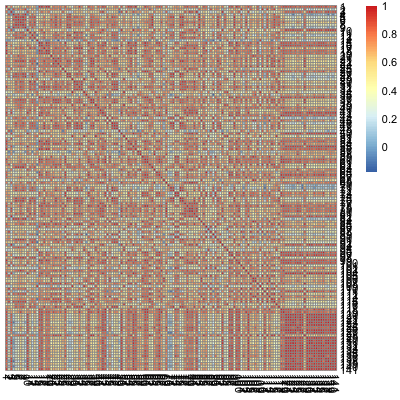

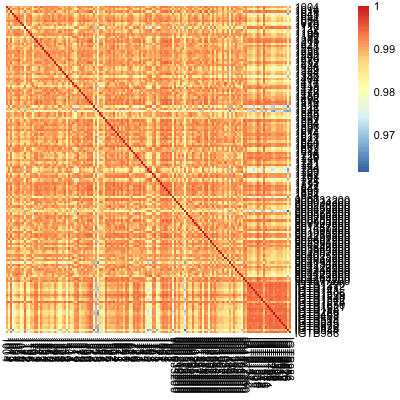

In [496]:
options(repr.plot.width = 5, repr.plot.height = 5)
pheatmap(cor(t(cbind(cm_prop, th_prop, b_prop, nk_prop, ncm_prop, tc_prop, dc_prop))),cluster_rows=F,cluster_cols=F)
options(repr.plot.width = 5, repr.plot.height = 5)
pheatmap(cor(cbind(pbmc_expr)),cluster_rows=F,cluster_cols=F)

In [477]:
pbmc_expr_prcomp <- prcomp(pbmc_expr_std)

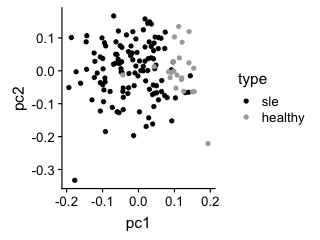

In [478]:
df <- rbind(data.frame(pc1=pbmc_expr_prcomp$rotation[1:ncol(pbmc_sle_expr),1], pc2=pbmc_expr_prcomp$rotation[1:ncol(pbmc_sle_expr),2], type="sle"),
            data.frame(pc1=pbmc_expr_prcomp$rotation[(ncol(pbmc_sle_expr)+1):ncol(pbmc_expr),1], pc2=pbmc_expr_prcomp$rotation[(ncol(pbmc_sle_expr)+1):ncol(pbmc_expr),2], type="healthy"))

options(repr.plot.width = 4, repr.plot.height = 3)
ggplot(aes(pc1,pc2,color=type),data=df)+geom_point()+scale_colour_manual(values=c("black","darkgray"))

# Figure 2A - heatmap

In [1031]:
# all_expr_std <- data.frame(pbmc=pbmc_expr_std,
#                       cm=cm_expr_std,
#                       ncm=ncm_expr_std,
#                       dc=dc_expr_std,
#                       th=th_expr_std,
#                       tc=tc_expr_std,
#                        nk=nk_expr_std,
#                       b=b_expr_std
#                       )

# ##all_expr_std <- data.frame(pbmc=pbmc_expr_std)

# all_expr_std_sig <- all_expr_std[match(pbmc_deseq_sig_genes,expr_gene_names),]


# all_expr <- data.frame(pbmc=pbmc_expr,
#                       cm=cm_expr,
#                       ncm=ncm_expr,
#                       dc=dc_expr,
#                       th=th_expr,
#                       tc=tc_expr,
#                        nk=nk_expr,
#                       b=b_expr
#                       )

# ##all_expr_std <- data.frame(pbmc=pbmc_expr_std)

# all_expr_std_sig <- all_expr_std[match(pbmc_deseq_sig_genes,expr_gene_names),]
# all_expr_sig <- all_expr[match(pbmc_deseq_sig_genes,expr_gene_names),]


In [974]:
# set.seed(1)
# kmeans_rst <- kmeans(all_expr[match(pbmc_deseq_sig_genes,expr_gene_names),], 7)

# cell_types <- c("PBMC","cM","ncM", "DC","Th","Tc","NK","B")

# kmeans_annotation <- data.frame(cluster=factor(kmeans_rst$cluster,levels=c("1","2","6","7","3","4","5")))
# rownames(kmeans_annotation) <- pbmc_deseq_sig_genes;

# all_expr_sig <- all_expr[match(pbmc_deseq_sig_genes,expr_gene_names),]
# all_expr_sig_ordered <- all_expr[match(pbmc_deseq_sig_genes,expr_gene_names),][order(kmeans_annotation$cluster),]

# all_expr_standardize_sig <- all_expr_standardize[match(pbmc_deseq_sig_genes,expr_gene_names),]
# all_expr_standardize_sig_ordered <- all_expr_standardize[match(pbmc_deseq_sig_genes,expr_gene_names),][order(kmeans_annotation$cluster),]

# kmeans_ordered_annotation <- kmeans_annotation[order(kmeans_annotation$cluster),]

# all_expr_sle_sig <- all_expr_sle[match(pbmc_deseq_sig_genes,expr_gene_names),]
# all_expr_sle_sig_ordered <- all_expr_sle[match(pbmc_deseq_sig_genes,expr_gene_names),][order(kmeans_annotation$cluster),]
# ##kmeans_ordered_annotation <- kmeans_annotation[order(kmeans_annotation$cluster),]

In [1298]:
pbmc_deseq_sig_genes = pbmc_deseq$V1[intersect(which(pbmc_deseq$qval < 0.01), which(abs(pbmc_deseq$log2FoldChange)>1))]

In [1300]:
pbmc_col_clust <- hclust(dist(t(pbmc_expr_std[match(pbmc_deseq_sig_genes,expr_gene_names),]),method = "euclidean"), method="ward.D")
pbmc_row_clust <- hclust(dist(pbmc_expr_std[match(pbmc_deseq_sig_genes,expr_gene_names),],method = "euclidean"), method="ward.D")

all_expr <- data.frame(pbmc=pbmc_expr[,pbmc_col_clust$order],
                      cm=cm_expr[,pbmc_col_clust$order],
                      ncm=ncm_expr[,pbmc_col_clust$order],
                      dc=dc_expr[,pbmc_col_clust$order],
                      th=th_expr[,pbmc_col_clust$order],
                      tc=tc_expr[,pbmc_col_clust$order],
                       nk=nk_expr[,pbmc_col_clust$order],
                      b=b_expr[,pbmc_col_clust$order]
                      )
all_expr_sig <- all_expr[match(pbmc_deseq_sig_genes,expr_gene_names),]

all_expr_std <- data.frame(pbmc=pbmc_expr_std[,pbmc_col_clust$order],
                      cm=cm_expr_std[,pbmc_col_clust$order],
                      ncm=ncm_expr_std[,pbmc_col_clust$order],
                      dc=dc_expr_std[,pbmc_col_clust$order],
                      th=th_expr_std[,pbmc_col_clust$order],
                      tc=tc_expr_std[,pbmc_col_clust$order],
                       nk=nk_expr_std[,pbmc_col_clust$order],
                      b=b_expr_std[,pbmc_col_clust$order]
                      )
all_expr_std_sig <- all_expr_std[match(pbmc_deseq_sig_genes,expr_gene_names),]


ct_annotation_one <- data.frame(disease_pop_cov=joined_pivot$disease_pop_cov,
                           sledaiscore=joined_pivot$sledaiscore)
rownames(ct_annotation_one) <- colnames(pbmc_expr);

ct_annotation <- data.frame(type=factor(rep(cell_types,each=ncol(ncm_expr))),
#                            disease=factor(rep(c(rep("sle",ncol(cm_sle_expr)),
#                                                 rep("ctrl",ncol(cm_healthy_expr)))[pbmc_clust$order],
#                                               length(cell_types))),
                           disease_pop_cov=joined_pivot$disease_pop_cov[pbmc_col_clust$order],
                           sledaiscore=joined_pivot$sledaiscore[pbmc_col_clust$order])
rownames(ct_annotation) <- colnames(all_expr_std);


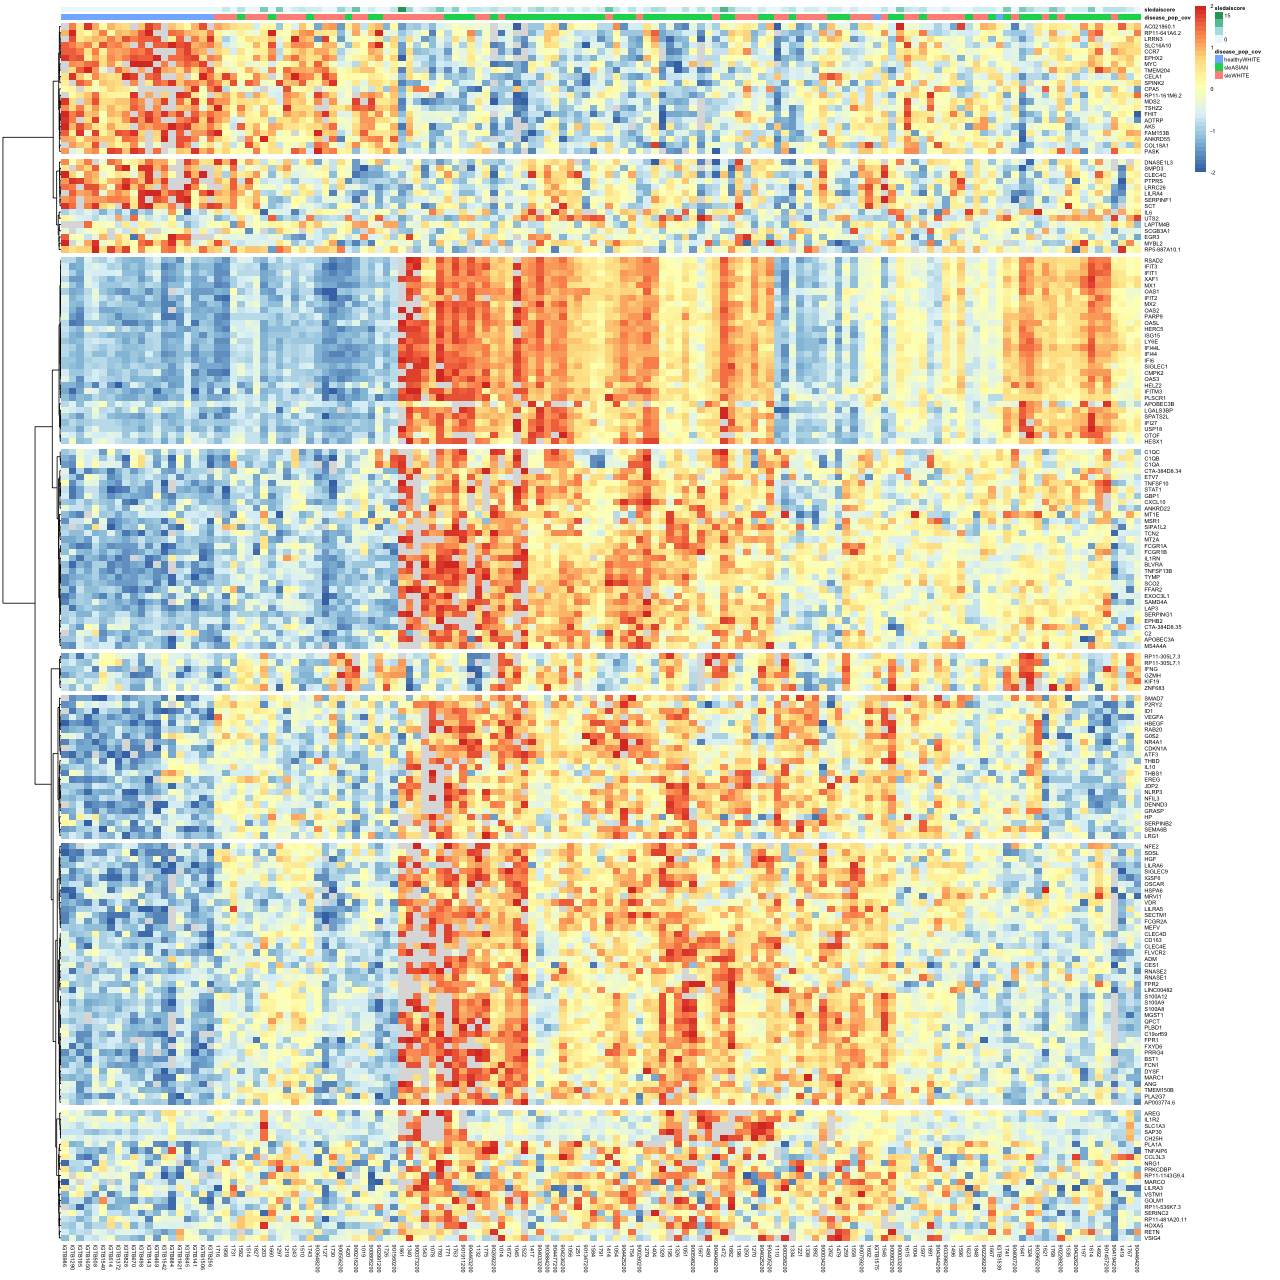

In [1299]:
options(repr.plot.width = 16, repr.plot.height = 16)

breaksList = seq(-2, 2, by = .1)
pheatmap_out <- pheatmap(pbmc_expr_std[match(pbmc_deseq_sig_genes,expr_gene_names),pbmc_col_clust$order],
         cluster_rows=T, cluster_cols=F,annotation_col = ct_annotation_one[pbmc_col_clust$order,],#annotation_row = kmeans_annotation,
         color = colorRampPalette(rev(brewer.pal(n = 7, name = "RdYlBu")))(length(breaksList)), 
                         cutree_rows=8, 
                         scale="row",fontsize=5,clustering_method="ward.D",clustering_distance_row="manhattan",# Defines the vector of colors for the legend (it has to be of the same lenght of breaksList)
        breaks = breaksList) # Sets the breaks of the color scale as in breaksList

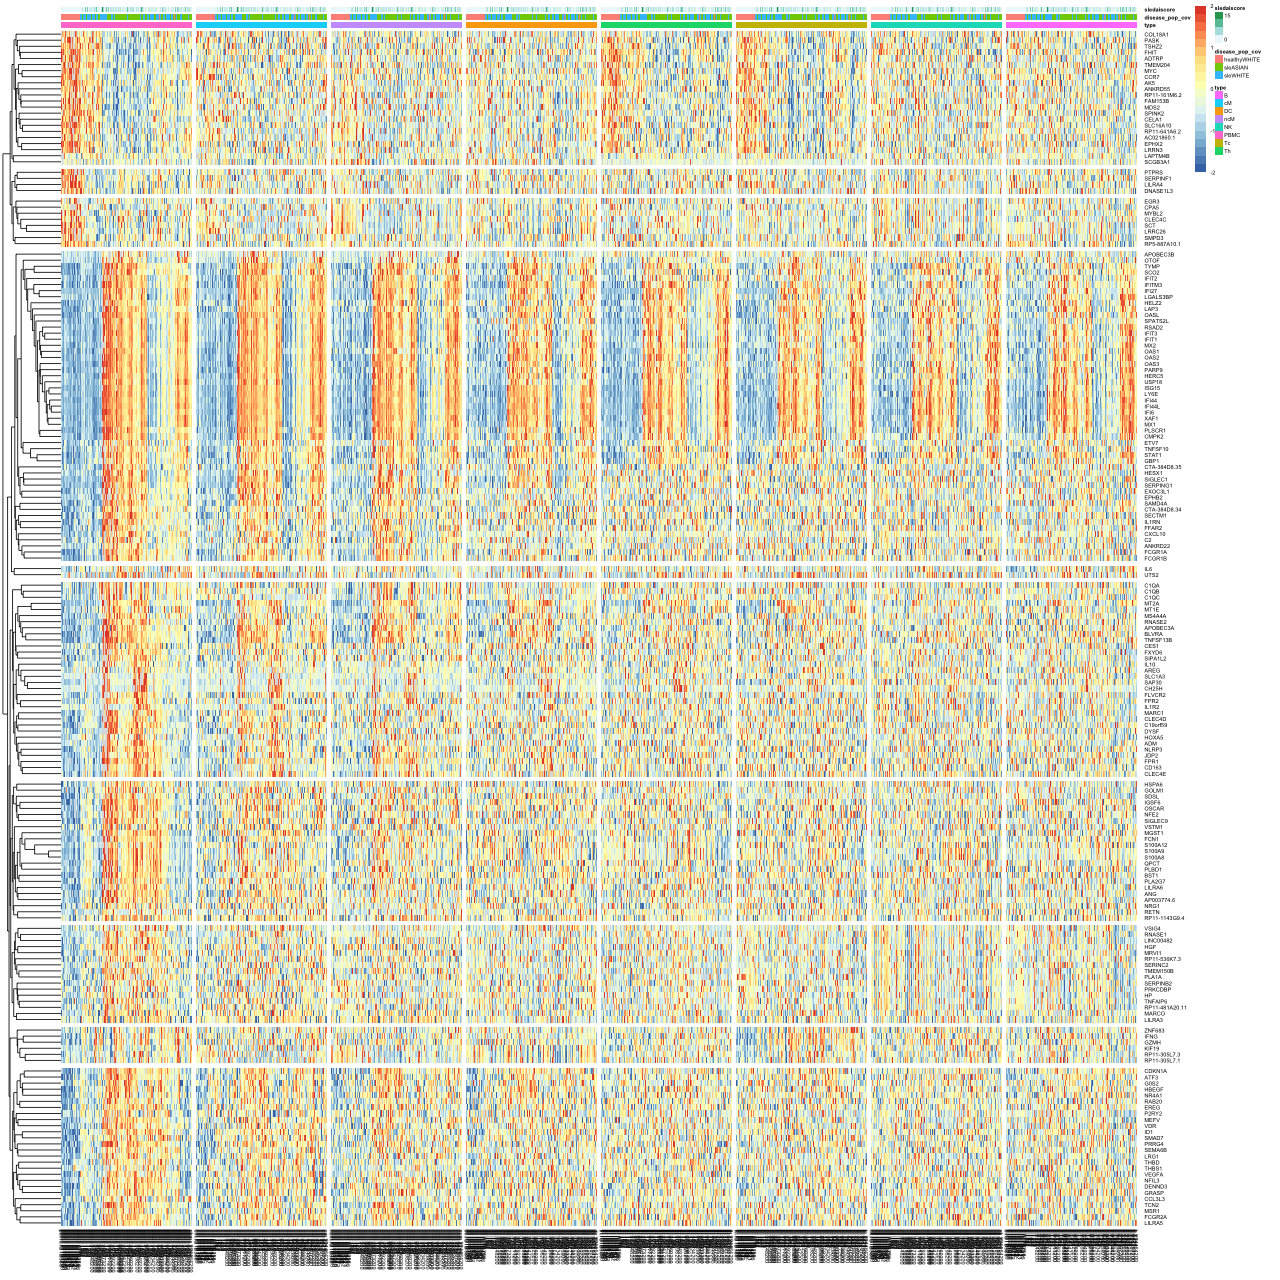

In [1301]:
options(repr.plot.width = 16, repr.plot.height = 16)
breaksList = seq(-2, 2, by = .2)

pheatmap_std_out <- pheatmap(all_expr_std_sig,
         cluster_rows=T, cluster_cols=F, annotation_col = ct_annotation, #annotation_row = kmeans_annotation,
         color = colorRampPalette(rev(brewer.pal(n = 7, name = "RdYlBu")))(length(breaksList)), # Defines the vector of colors for the legend (it has to be of the same lenght of breaksList)
        breaks = breaksList, # Sets the breaks of the color scale as in breaksList
        gaps_col=seq(ncol(cm_expr),ncol(cm_expr)*length(cell_types),ncol(cm_expr)),
                         cutree_rows=10, 
                         scale="none",fontsize=5,clustering_method="complete",clustering_distance_row="euclidean")
options(repr.plot.width = 10, repr.plot.height = 4)

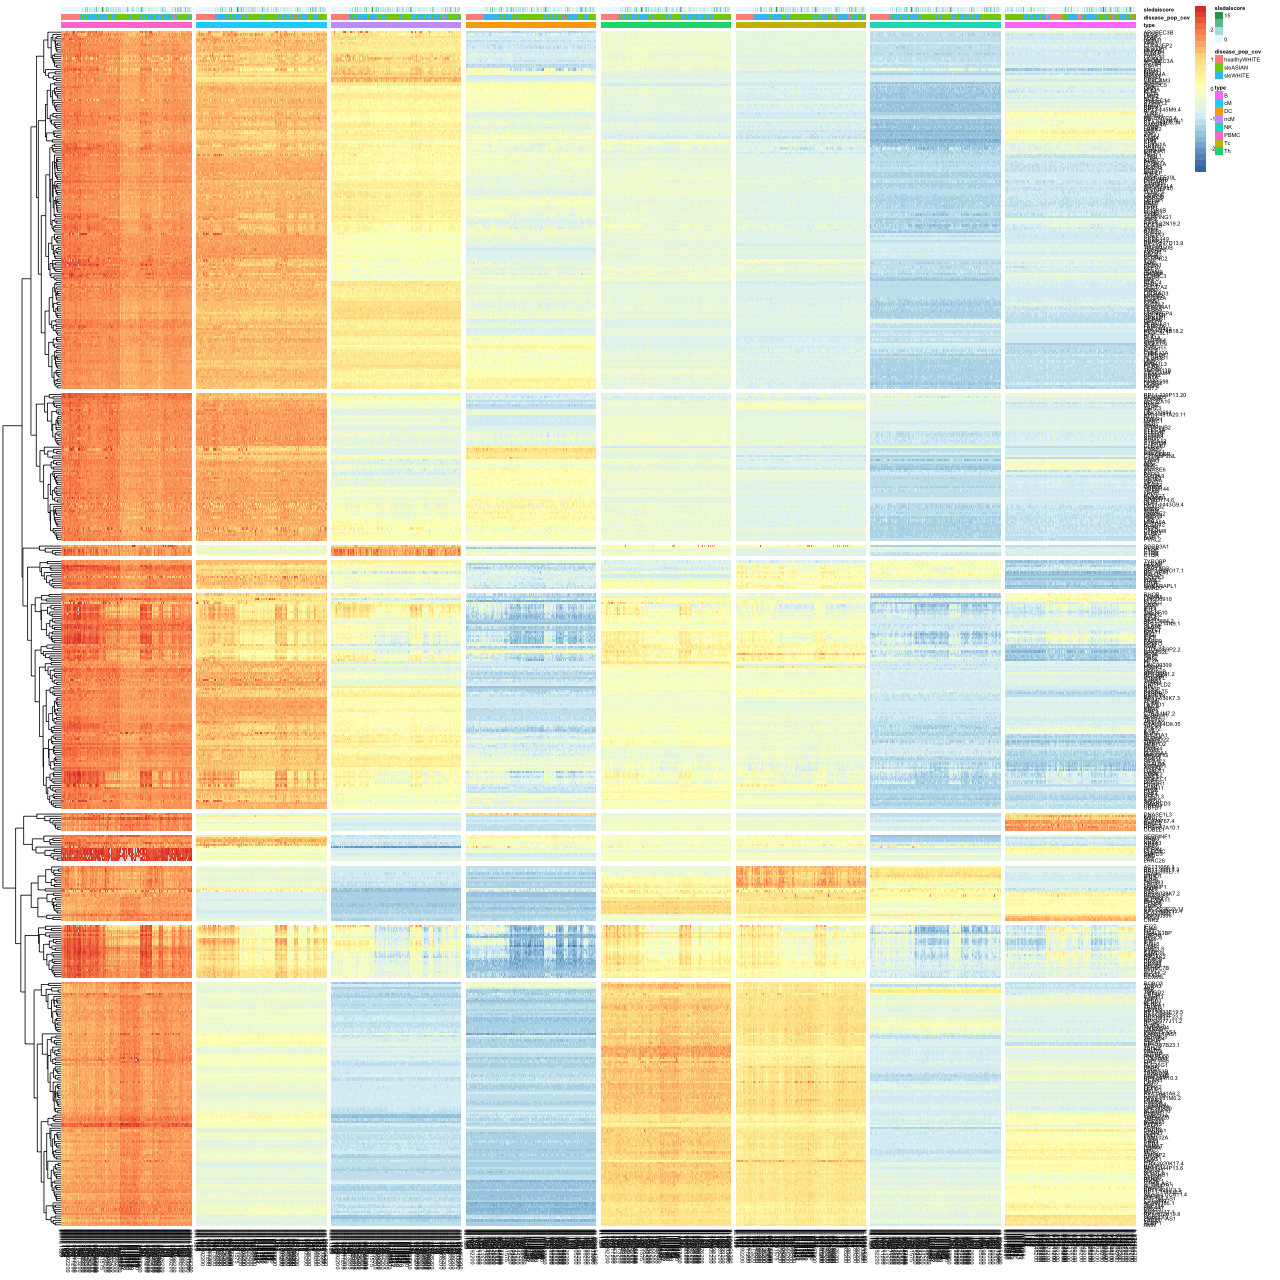

In [1289]:
options(repr.plot.width = 16, repr.plot.height = 16)
breaksList = seq(-2.8, 2.8, by = .2)

pheatmap_out <- pheatmap(all_expr_sig,
         cluster_rows=T, cluster_cols=F, annotation_col = ct_annotation, #annotation_row = kmeans_annotation,
         color = colorRampPalette(rev(brewer.pal(n = 7, name = "RdYlBu")))(length(breaksList)), # Defines the vector of colors for the legend (it has to be of the same lenght of breaksList)
        breaks = breaksList, # Sets the breaks of the color scale as in breaksList
        gaps_col=seq(ncol(cm_expr),ncol(cm_expr)*length(cell_types),ncol(cm_expr)),
                         cutree_rows=10, 
                         scale="row",fontsize=5,clustering_method="complete",clustering_distance_row="manhattan")
options(repr.plot.width = 10, repr.plot.height = 4)

## More principled way to cut the tree and label the specific signatures

In [1302]:
cuttree_out <- cutree(pheatmap_std_out$tree_row, k = 10)
cuttree_out[which(cuttree_out==4)] <- "pan";
cuttree_out[which(cuttree_out==8)] <- "cM_prop";
cuttree_out[which(cuttree_out==1)] <- "th_tc_diffexp";
cuttree_out[which(cuttree_out==6)] <- "cM_ncM_diffexp";
cuttree_out[which(cuttree_out==3)] <- "th_specific";
cuttree_out[which(cuttree_out==2)] <- "th_specific";
cuttree_out[which(cuttree_out==7)] <- "cM_diffexp";
cuttree_out[which(cuttree_out==5)] <- "B";
cuttree_out[which(cuttree_out==9)] <- "tc_specific";
cuttree_out[which(cuttree_out==10)] <- "pan2";

cuttree_gene_names <- names(cuttree_out);
cuttree_out <- cbind(cuttree_gene_names,cuttree_out)
colnames(cuttree_out) <- c("gene","cluster")
write.table(cuttree_out, file="diffexp.annotations.txt",sep="\t",col.names=T,row.names=F,quote=F);

# Figure 2B - correlogram to show coexpressed genes

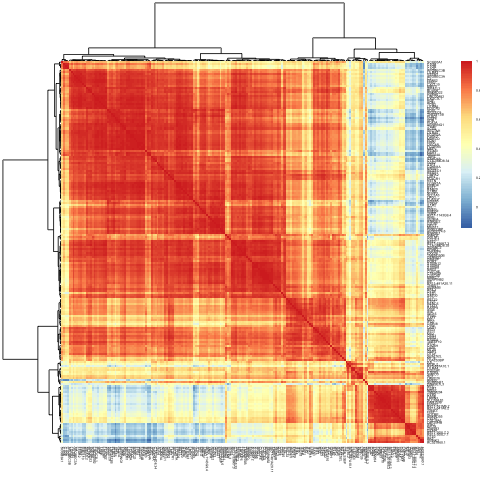

In [359]:
no_pbmc_cor <- cor(t(all_expr_sig[,-c(1,ncol(pbmc_expr))]))
options(repr.plot.width = 6, repr.plot.height = 6)
pheatmap(no_pbmc_cor,
         cluster_rows=pheatmap_out$tree_row, cluster_cols=pheatmap_out$tree_row, #annotation_row = kmeans_annotation,
         fontsize=3)
options(repr.plot.width = 4, repr.plot.height = 4)

# Figure 2C: Proportion of variance explained


First, we are going to estimate proportion of variance explained by cell type proportion

This will be a multiple regression

\begin{equation*}
e_i = -1 + b_1\times p_1 + b_2\times p_2 + ... + b_n\times p_n
\end{equation*}

Next, we are going to estimate proportion of variance explained by cell type specific expression

This will be a multiple regression


\begin{equation*}
e_i = -1 + b_1\times e_1 + b_2\times e_2 + ... + b_n\times e_n
\end{equation*}

calculate adjusted r_2 and also the cell type specific r2

Y_i = %mono*mono_i + %other*other_i + err
Or
Y_i = %mono*mono_i
log(Y_i) = log(%mono)+log(mono_i)+err


## Let's define some useful functions

In [993]:
test_single_gene <- function(expr, props, exprs, i) {
    df = NULL;
    cors = NULL;
    
    model_prop <- lm(expr[i,]~props-1)
    predicted_prop <- model_prop$fitted
    df <- data.frame(observed=expr[i,],predicted=predicted_prop,type="prop");
    cors <- cor(expr[i,], predicted_prop);

    model_expr <- lm(expr[i,]~exprs[i,,]-1)
    predicted_expr <- model_expr$fitted
    df <- rbind(df, data.frame(observed=expr[i,],predicted=predicted_expr,type="expr"))
    cors <- c(cors,cor(expr[i,], predicted_expr))
    
    predicted <- 10^(exprs[i,,1])*props[,1]+
                 10^(exprs[i,,2])*props[,2]+
                 10^(exprs[i,,3])*props[,3]+
                 10^(exprs[i,,4])*props[,4]+
                 10^(exprs[i,,5])*props[,5]  
    
    df <- rbind(df, data.frame(observed=expr[i,],predicted=log10(predicted),type="factor"))
    cors <- c(cors,cor(expr[i,], log10(predicted)))
    
    print(ggplot(aes(observed, predicted), data=df)+geom_point()+facet_wrap(~type, scales="free")+theme_bw()+geom_abline(slope=1))
    names(cors) <- c("prop","expr","factor")
    print(cors);
    return(list(model_prop, model_expr));
}


model_prop <- function(expr, props) {
    output_prop <- NULL;
    for(i in 1:nrow(expr)) {
        model <- lm(expr[i,]~props-1)
        r2 = summary(model)$coef[,1]^2*apply(props, 2,var,na.rm=T)/var(expr[i,])*100;
        output_prop <- rbind(output_prop, 
                               c(r2,sum(r2),summary(model)$adj.r.squared*100))
    }
    colnames(output_prop) <- c(colnames(props), "total r2","adj r2");
    rownames(output_prop) <- dimnames(exprs)[[1]]
    return(output_prop)
}

model_expr <- function(expr, exprs) {
    output_expr <- NULL;
    for(i in 1:nrow(expr)) {
        model <- lm(expr[i,]~exprs[i,,]-1);
    
        r2 = summary(model)$coef[,1]^2*apply(exprs[i,,], 2,var,na.rm=T)/var(expr[i,])*100;
    
        output_expr <- rbind(output_expr, 
                       c(r2,sum(r2),summary(model)$adj.r.squared*100))
    }
    colnames(output_expr) <- c(dimnames(exprs)[[3]], "total r2","adj r2");
    rownames(output_expr) <- dimnames(exprs)[[1]]
    return(output_expr)
}


## Processing all - now, let's fit with -1 but we need to standardize the outcome

In [989]:
output_prop_noint <- model_prop(pbmc_expr_std, props);
output_expr_noint <- model_expr(pbmc_expr_std, exprs_std);

## Processing SLE

In [990]:
## including dc analysis
output_sle_prop_noint <- model_prop(pbmc_sle_expr_std, props_sle);
output_sle_expr_noint <- model_expr(pbmc_sle_expr_std, exprs_sle_std);

Warning message in data.frame(observed = expr[i, ], predicted = log10(predicted), :
“NaNs produced”Warning message in is.data.frame(y):
“NaNs produced”Warning message:
“Removed 2 rows containing missing values (geom_point).”

     prop      expr    factor 
0.2320022 0.6409763        NA 


[[1]]

Call:
lm(formula = expr[i, ] ~ props - 1)

Coefficients:
   propscm     propsth     propsnk    propsncm     propstc  
-0.0113179  -0.0078525   0.0115926   0.0528458   0.0008783  


[[2]]

Call:
lm(formula = expr[i, ] ~ exprs[i, , ] - 1)

Coefficients:
 exprs[i, , ]cM   exprs[i, , ]Th   exprs[i, , ]NK  exprs[i, , ]ncM  
        0.54326          0.05005         -0.14510          0.16797  
 exprs[i, , ]Tc  
        0.18344  



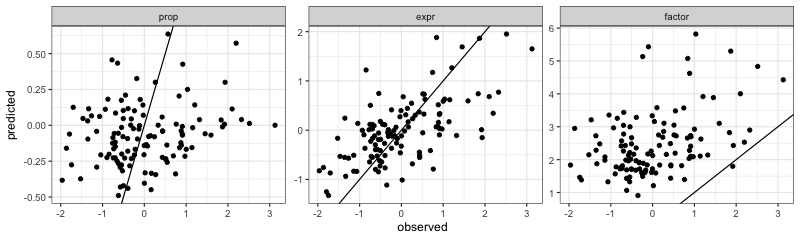

     prop      expr    factor 
0.2320022 0.6131208 0.3833890 


[[1]]

Call:
lm(formula = expr[i, ] ~ props - 1)

Coefficients:
   propscm     propsth     propsnk    propsncm     propstc  
-0.0113179  -0.0078525   0.0115926   0.0528458   0.0008783  


[[2]]

Call:
lm(formula = expr[i, ] ~ exprs[i, , ] - 1)

Coefficients:
 exprs[i, , ]cM   exprs[i, , ]Th   exprs[i, , ]NK  exprs[i, , ]ncM  
         1.7250           0.5075           0.8644           0.5672  
 exprs[i, , ]Tc  
         2.1355  



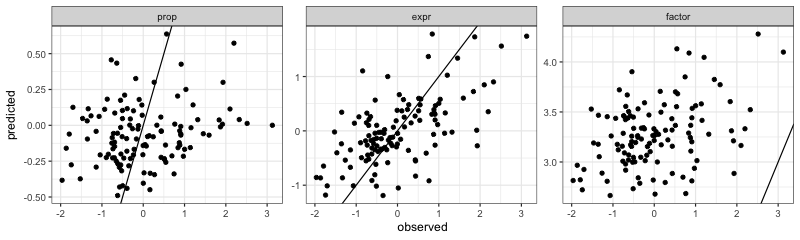

      prop       expr     factor 
-0.5806237  0.6408813  0.3833890 


[[1]]

Call:
lm(formula = expr[i, ] ~ props - 1)

Coefficients:
 propscm   propsth   propsnk  propsncm   propstc  
 0.04023   0.05465   0.07111   0.10054   0.05576  


[[2]]

Call:
lm(formula = expr[i, ] ~ exprs[i, , ] - 1)

Coefficients:
 exprs[i, , ]cM   exprs[i, , ]Th   exprs[i, , ]NK  exprs[i, , ]ncM  
         1.2772           0.2868          -1.9104           0.4726  
 exprs[i, , ]Tc  
         1.1960  



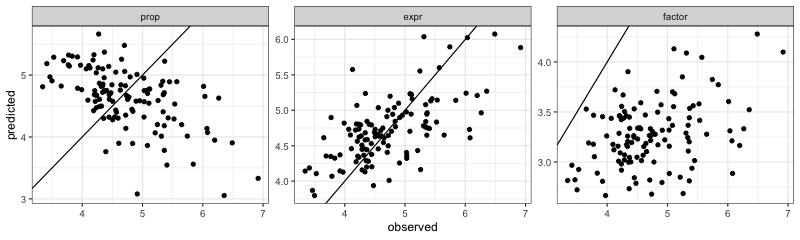

In [1003]:
test_single_gene(pbmc_sle_expr_std, props_sle, exprs_sle_std, grep("^IL6$",expr_gene_names)[1])
test_single_gene(pbmc_sle_expr_std, props_sle, exprs_sle, grep("^IL6$",expr_gene_names)[1])
test_single_gene(pbmc_sle_expr, props_sle, exprs_sle, grep("^IL6$",expr_gene_names)[1])

### Downsampled SLE to 46 samples

In [994]:
## including dc analysis
N <- 22;
samples_asian <- sample(which(joined_pivot$disease_pop=="sleASIAN"), N)
samples_white <- sample(which(joined_pivot$disease_pop=="sleWHITE"), N)

## including dc analysis
output_sle_down_asian_prop_noint <- model_prop(pbmc_sle_expr_std[,samples_asian], props_sle[samples_asian,]);
output_sle_down_asian_expr_noint <- model_expr(pbmc_sle_expr_std[,samples_asian], exprs_sle_std[,samples_asian,]);

output_sle_down_white_prop_noint <- model_prop(pbmc_sle_expr_std[,samples_white], props_sle[samples_white,]);
output_sle_down_white_expr_noint <- model_expr(pbmc_sle_expr_std[,samples_white], exprs_sle_std[,samples_white,]);

## Processing healthy

In [995]:
output_healthy_prop_noint <- model_prop(pbmc_healthy_expr_std, props_healthy);
output_healthy_expr_noint <- model_expr(pbmc_healthy_expr_std, exprs_healthy_std);

     prop      expr    factor 
0.7543320 0.9146691 0.7838976 


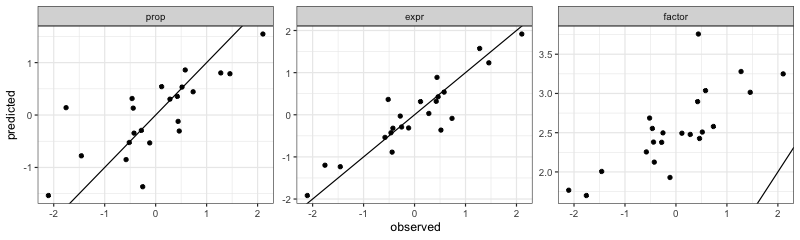

In [996]:
models = test_single_gene(pbmc_healthy_expr_std, props_healthy, exprs_healthy_std, grep("^RALBP1$",expr_gene_names)[1])

In [997]:
models[[2]]


Call:
lm(formula = expr[i, ] ~ exprs[i, , ] - 1)

Coefficients:
 exprs[i, , ]cM   exprs[i, , ]Th   exprs[i, , ]NK  exprs[i, , ]ncM  
        0.56195          0.63566          0.24312          0.07332  
 exprs[i, , ]Tc  
        0.40323  


[1,]

     prop      expr    factor 
0.7543320 0.9146691 0.7838976 


[[1]]

Call:
lm(formula = expr[i, ] ~ props - 1)

Coefficients:
 propscm   propsth   propsnk  propsncm   propstc  
 0.07781  -0.07549   0.17591   0.43849  -0.03771  


[[2]]

Call:
lm(formula = expr[i, ] ~ exprs[i, , ] - 1)

Coefficients:
 exprs[i, , ]cM   exprs[i, , ]Th   exprs[i, , ]NK  exprs[i, , ]ncM  
        0.56195          0.63566          0.24312          0.07332  
 exprs[i, , ]Tc  
        0.40323  



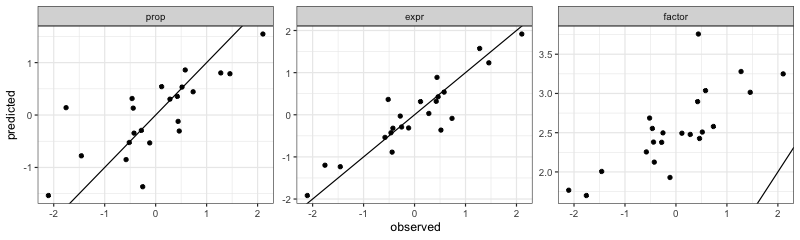

     prop      expr    factor 
0.7543320 0.8372058 0.9248640 


[[1]]

Call:
lm(formula = expr[i, ] ~ props - 1)

Coefficients:
 propscm   propsth   propsnk  propsncm   propstc  
 0.07781  -0.07549   0.17591   0.43849  -0.03771  


[[2]]

Call:
lm(formula = expr[i, ] ~ exprs[i, , ] - 1)

Coefficients:
 exprs[i, , ]cM   exprs[i, , ]Th   exprs[i, , ]NK  exprs[i, , ]ncM  
          4.820            2.817            1.311           -5.986  
 exprs[i, , ]Tc  
         -4.139  



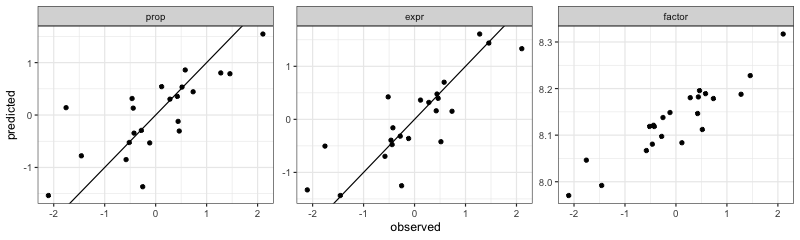

     prop      expr    factor 
0.3327353 0.8876969 0.9248640 


[[1]]

Call:
lm(formula = expr[i, ] ~ props - 1)

Coefficients:
 propscm   propsth   propsnk  propsncm   propstc  
 0.05642   0.10184   0.14973   0.19048   0.09801  


[[2]]

Call:
lm(formula = expr[i, ] ~ exprs[i, , ] - 1)

Coefficients:
 exprs[i, , ]cM   exprs[i, , ]Th   exprs[i, , ]NK  exprs[i, , ]ncM  
        0.06487          0.50192          0.07110          0.29547  
 exprs[i, , ]Tc  
        0.53041  



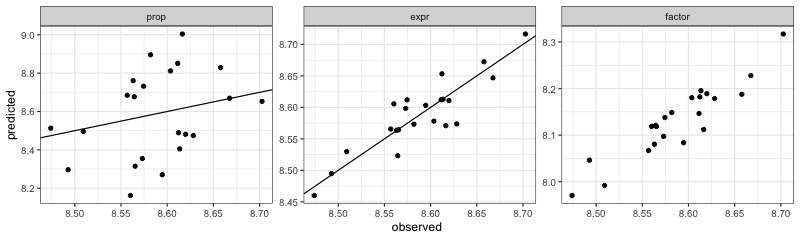

In [1001]:
options(repr.plot.width = 10, repr.plot.height = 3)
t(which(output_healthy_expr_noint[,6]>1000))
test_single_gene(pbmc_healthy_expr_std, props_healthy, exprs_healthy_std, grep("^RALBP1$",expr_gene_names)[1])
test_single_gene(pbmc_healthy_expr_std, props_healthy, exprs_healthy, grep("^RALBP1$",expr_gene_names)[1])
test_single_gene(pbmc_healthy_expr, props_healthy, exprs_healthy, grep("^RALBP1$",expr_gene_names)[1])

In [ ]:
test_single_gene(pbmc_healthy_expr_std, props_healthy, exprs_healthy_std, grep("^IL6$",expr_gene_names)[1])
test_single_gene(pbmc_healthy_expr_std, props_healthy, exprs_healthy, grep("^IL6$",expr_gene_names)[1])
test_single_gene(pbmc_healthy_expr, props_healthy, exprs_healthy, grep("^IL6$",expr_gene_names)[1])

## Summarize and plotting results

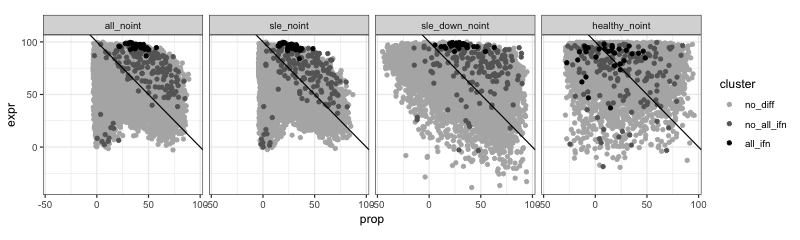

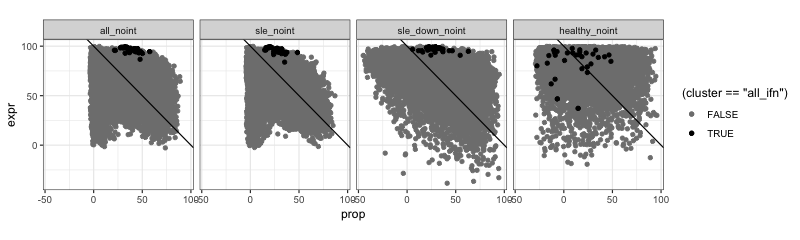

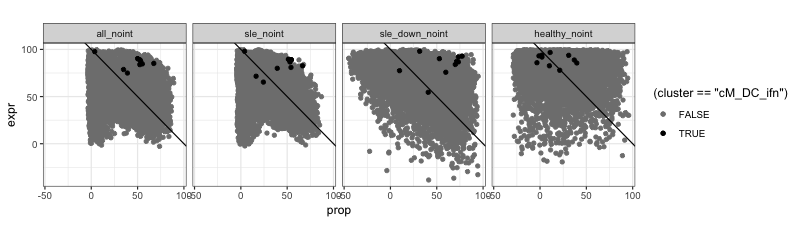

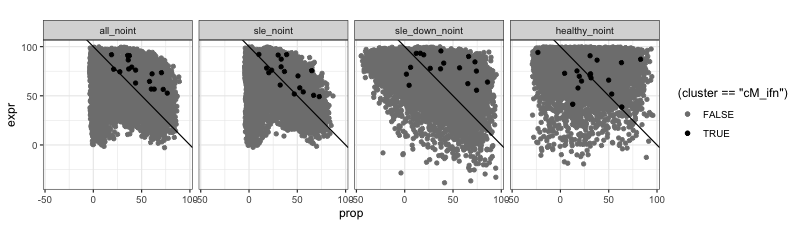

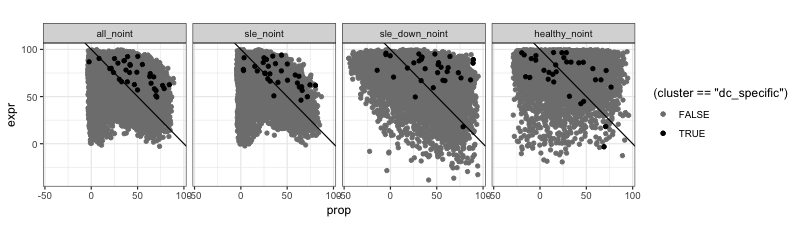

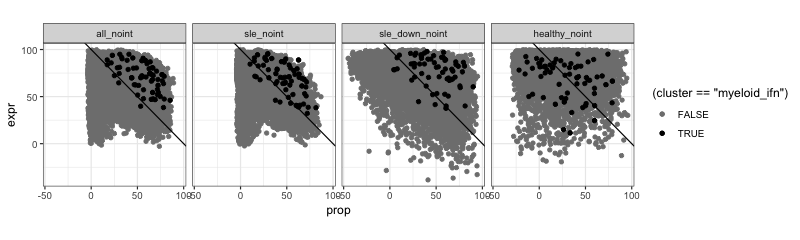

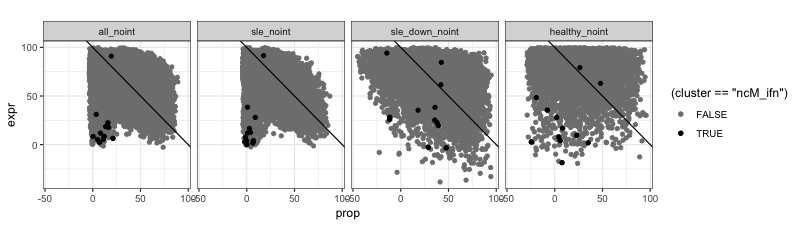

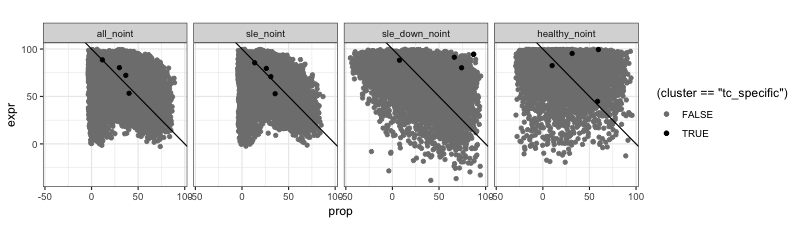

cor        prop_mean expr_mean sum_mean 
all_noint      -0.3923207 25.19553  65.63338   90.82891
sle_noint      -0.4937907 21.82173  65.17500   86.99674
sle_down_noint -0.4506650 23.88556  70.84899   94.73455
healthy_noint  -0.1034421 22.08731  79.83565  101.92296

ERROR: Error in match.names(clabs, names(xi)): names do not match previous names


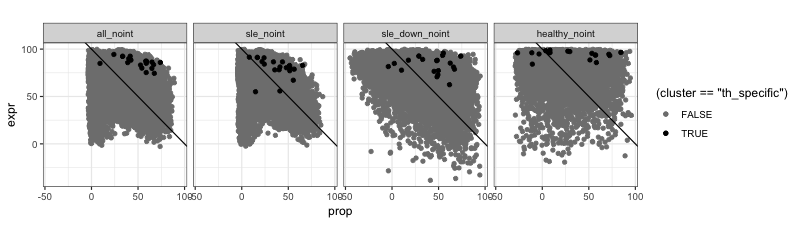

In [1002]:
output_noint_df <- data.frame(prop=output_prop_noint[,"adj r2"], expr=output_expr_noint[,"adj r2"], type="all_noint")
output_noint_df$cluster <- "no_diff";
output_noint_df$cluster[match(cuttree_out[,"gene"],rownames(output_noint_df))] <- cuttree_out[,"cluster"];

output_sle_noint_df <- data.frame(prop=output_sle_prop_noint[,"adj r2"], expr=output_sle_expr_noint[,"adj r2"], type="sle_noint")
output_sle_noint_df$cluster <- "no_diff";
output_sle_noint_df$cluster[match(cuttree_out[,"gene"],rownames(output_sle_noint_df))] <- cuttree_out[,"cluster"];

output_sle_down_noint_df <- data.frame(prop=output_sle_down_prop_noint[,"adj r2"], expr=output_sle_down_expr_noint[,"adj r2"], type="sle_down_noint")
output_sle_down_noint_df$cluster <- "no_diff";
output_sle_down_noint_df$cluster[match(cuttree_out[,"gene"],rownames(output_sle_down_noint_df))] <- cuttree_out[,"cluster"];

output_healthy_noint_df <- data.frame(prop=output_healthy_prop_noint[,"adj r2"], expr=output_healthy_expr_noint[,"adj r2"], type="healthy_noint")
output_healthy_noint_df$cluster <- "no_diff";
output_healthy_noint_df$cluster[match(cuttree_out[,"gene"],rownames(output_healthy_noint_df))] <- cuttree_out[,"cluster"];

df <- rbind(output_noint_df, output_sle_noint_df, output_sle_down_noint_df, output_healthy_noint_df)
df$cluster <- as.factor(df$cluster)

options(repr.plot.width = 10, repr.plot.height = 3)
df_all_ifn <- df;
df_all_ifn$cluster <- as.character(df_all_ifn$cluster);
df_all_ifn$cluster[which(df_all_ifn$cluster != "no_diff" & df_all_ifn$cluster != "all_ifn")] <- "no_all_ifn";
df_all_ifn$cluster <- factor(df_all_ifn$cluster, levels=c("no_diff","no_all_ifn","all_ifn"));
df_all_ifn <- df_all_ifn[order(df_all_ifn$cluster),]
ggplot(aes(prop, expr,color=cluster), data=df_all_ifn)+geom_point()+facet_grid(~type)+theme_bw()+geom_abline(slope=-1,intercept=100)+scale_color_manual(values=c("gray70","gray40", "black"))+theme(aspect.ratio=1)

ggplot(aes(prop, expr,color=(cluster=="all_ifn")), data=df)+geom_point()+facet_grid(~type)+theme_bw()+geom_point(data = subset(df, cluster == 'all_ifn'),
             aes(x = prop, y = expr, color = (cluster=="all_ifn")))+geom_abline(slope=-1,intercept=100)+scale_color_manual(values=c("gray50", "black"))+theme(aspect.ratio=1)
ggplot(aes(prop, expr,color=(cluster=="cM_DC_ifn")), data=df)+geom_point()+facet_grid(~type)+theme_bw()+geom_point(data = subset(df, cluster == 'cM_DC_ifn'),
             aes(x = prop, y = expr, color = (cluster=="cM_DC_ifn")))+geom_abline(slope=-1,intercept=100)+scale_color_manual(values=c("gray50", "black"))+theme(aspect.ratio=1)
ggplot(aes(prop, expr,color=(cluster=="cM_ifn")), data=df)+geom_point()+facet_grid(~type)+theme_bw()+geom_point(data = subset(df, cluster == 'cM_ifn'),
             aes(x = prop, y = expr, color = (cluster=="cM_ifn")))+geom_abline(slope=-1,intercept=100)+scale_color_manual(values=c("gray50", "black"))+theme(aspect.ratio=1)
ggplot(aes(prop, expr,color=(cluster=="dc_specific")), data=df)+geom_point()+facet_grid(~type)+theme_bw()+geom_point(data = subset(df, cluster == 'dc_specific'),
             aes(x = prop, y = expr, color = (cluster=="dc_specific")))+geom_abline(slope=-1,intercept=100)+scale_color_manual(values=c("gray50", "black"))+theme(aspect.ratio=1)
ggplot(aes(prop, expr,color=(cluster=="myeloid_ifn")), data=df)+geom_point()+facet_grid(~type)+theme_bw()+geom_point(data = subset(df, cluster == 'myeloid_ifn'),
             aes(x = prop, y = expr, color = (cluster=="myeloid_ifn")))+geom_abline(slope=-1,intercept=100)+scale_color_manual(values=c("gray50", "black"))+theme(aspect.ratio=1)
ggplot(aes(prop, expr,color=(cluster=="ncM_ifn")), data=df)+geom_point()+facet_grid(~type)+theme_bw()+geom_point(data = subset(df, cluster == 'ncM_ifn'),
             aes(x = prop, y = expr, color = (cluster=="ncM_ifn")))+geom_abline(slope=-1,intercept=100)+scale_color_manual(values=c("gray50", "black"))+theme(aspect.ratio=1)
ggplot(aes(prop, expr,color=(cluster=="tc_specific")), data=df)+geom_point()+facet_grid(~type)+theme_bw()+geom_point(data = subset(df, cluster == 'tc_specific'),
             aes(x = prop, y = expr, color = (cluster=="tc_specific")))+geom_abline(slope=-1,intercept=100)+scale_color_manual(values=c("gray50", "black"))+theme(aspect.ratio=1)
ggplot(aes(prop, expr,color=(cluster=="th_specific")), data=df)+geom_point()+facet_grid(~type)+theme_bw()+geom_point(data = subset(df, cluster == 'th_specific'),
             aes(x = prop, y = expr, color = (cluster=="th_specific")))+geom_abline(slope=-1,intercept=100)+scale_color_manual(values=c("gray50", "black"))+theme(aspect.ratio=1)

df2 <- data.frame(cor=c(cor(output_prop_noint[,"adj r2"], output_expr_noint[,"adj r2"]), cor(output_sle_prop_noint[,"adj r2"], output_sle_expr_noint[,"adj r2"]), cor(output_sle_down_prop_noint[,"adj r2"], output_sle_down_expr_noint[,"adj r2"]), cor(output_healthy_prop_noint[,"adj r2"], output_healthy_expr_noint[,"adj r2"])),
      prop_mean=c(mean(output_prop_noint[,"adj r2"]), mean(output_sle_prop_noint[,"adj r2"]), mean(output_sle_down_prop_noint[,"adj r2"]), mean(output_healthy_prop_noint[,"adj r2"])),
      expr_mean=c(mean(output_expr_noint[,"adj r2"]), mean(output_sle_expr_noint[,"adj r2"]), mean(output_sle_down_expr_noint[,"adj r2"]), mean(output_healthy_expr_noint[,"adj r2"])),
      sum_mean = c(mean(output_prop_noint[,"adj r2"]+output_expr_noint[,"adj r2"]), mean(output_sle_prop_noint[,"adj r2"]+output_sle_expr_noint[,"adj r2"]), mean(output_sle_down_prop_noint[,"adj r2"]+output_sle_down_expr_noint[,"adj r2"]), mean(output_healthy_prop_noint[,"adj r2"]+output_healthy_expr_noint[,"adj r2"])))
rownames(df2) <- c("all_noint", "sle_noint", "sle_down_noint", "healthy_noint")

df2

df3 <- rbind(data.frame(t(apply(output_prop_noint,2,mean,na.rm=T))),
            data.frame(t(apply(output_expr_noint,2,mean,na.rm=T))),
             data.frame(t(apply(output_sle_prop_noint,2,mean,na.rm=T))),
            data.frame(t(apply(output_sle_expr_noint,2,mean,na.rm=T))),
            data.frame(t(apply(output_sle_down_prop_noint,2,mean,na.rm=T))),
            data.frame(t(apply(output_sle_down_expr_noint,2,mean,na.rm=T))),
            data.frame(t(apply(output_healthy_prop_noint,2,mean,na.rm=T))),
            data.frame(t(apply(output_healthy_expr_noint,2,mean,na.rm=T))))

rownames(df3) <- c("all_noint_prop", "all_noint_expr", "sle_noint_prop", "sle_noint_expr", "sle_down_noint_prop", "sle_down_noint_expr", "healthy_noint_prop", "healthy_noint_expr")

df3

In [1303]:
options(repr.plot.width = 6, repr.plot.height = 10)
out <- rbind(data.frame(gene_names=rownames(output_prop_noint), prop=output_prop_noint[,"cM"], cell="cM"),
             data.frame(gene_names=rownames(output_prop_noint), prop=output_prop_noint[,"Th"], cell="Th"),
             data.frame(gene_names=rownames(output_prop_noint), prop=output_prop_noint[,"B"], cell="B"),
             data.frame(gene_names=rownames(output_prop_noint), prop=output_prop_noint[,"NK"], cell="NK"),
             data.frame(gene_names=rownames(output_prop_noint), prop=output_prop_noint[,"ncM"], cell="ncM"),
             data.frame(gene_names=rownames(output_prop_noint), prop=output_prop_noint[,"Tc"], cell="Tc"),
             data.frame(gene_names=rownames(output_prop_noint), prop=output_prop_noint[,"DC"], cell="DC"))

##clusters_ordered <- factor(cuttree_out[,"cluster"], levels=c("dc_specific","tc_specific", "th_specific","all_ifn","myeloid_ifn","ncM_ifn","cM_DC_ifn","cM_ifn"))
##cuttree_ordered <- cuttree_out[order(clusters_ordered,decreasing=T),]
matched <- match(out$gene_names, rev(pheatmap_out$tree_row$labels[pheatmap_out$tree_row$order]))
out <- out[which(!is.na(matched)),]
out_ordered <- out[order(na.omit(matched)),]
out_ordered <- cbind(out_ordered, cluster=cuttree_out[match(out_ordered$gene_names,cuttree_out[,"gene"]),"cluster"])
out_ordered$cluster <- factor(out_ordered$cluster, levels=c('dc_specific','tc_specific','th_specific','all_ifn','myeloid_ifn','ncM_ifn','cM_DC_ifn','cM_ifn'))

out_ordered$gene_names <- factor(out_ordered$gene_names,levels=c(unique(as.character(out_ordered$gene_names))))
prop_plot <- ggplot(aes(x=gene_names,y=prop,fill=cell),data=out_ordered)+geom_bar(stat="identity")+theme(axis.title.x = element_blank(), 
        axis.title.y = element_blank(), 
        axis.text.y = element_blank(), 
        ##axis.text.y = element_text(size=5),
        axis.ticks.y = element_blank(), 
        plot.margin = unit(c(1,-1,1,0), "mm"),
        legend.position="none")+facet_grid(cluster~.,scales = "free_y",space="free_y",switch="y")+scale_y_reverse(limits=c(100,0))+coord_flip()

options(repr.plot.width = 6, repr.plot.height = 10)
out_expr <- rbind(data.frame(gene_names=rownames(output_expr_noint), prop=output_expr_noint[,"cM"], cell="cM"),
             data.frame(gene_names=rownames(output_expr_noint), prop=output_expr_noint[,"Th"], cell="Th"),
             data.frame(gene_names=rownames(output_expr_noint), prop=output_expr_noint[,"B"], cell="B"),
             data.frame(gene_names=rownames(output_expr_noint), prop=output_expr_noint[,"NK"], cell="NK"),
             data.frame(gene_names=rownames(output_expr_noint), prop=output_expr_noint[,"ncM"], cell="ncM"),
             data.frame(gene_names=rownames(output_expr_noint), prop=output_expr_noint[,"Tc"], cell="Tc"),
             data.frame(gene_names=rownames(output_expr_noint), prop=output_expr_noint[,"DC"], cell="DC"))
##cuttree_ordered <- cuttree_out[order(cuttree_out[,"cluster"]),]
matched_expr <- match(out_expr$gene_names, rev(pheatmap_out$tree_row$labels[pheatmap_out$tree_row$order]))
out_expr <- out_expr[which(!is.na(matched)),]
out_expr_ordered <- out_expr[order(na.omit(matched)),]
out_expr_ordered <- cbind(out_expr_ordered, cluster=cuttree_out[match(out_expr_ordered$gene_names,cuttree_out[,"gene"]),"cluster"])
out_expr_ordered$cluster <- factor(out_expr_ordered$cluster, levels=c('dc_specific','tc_specific','th_specific','all_ifn','myeloid_ifn','ncM_ifn','cM_DC_ifn','cM_ifn'))

out_expr_ordered$gene_names <- factor(out_expr_ordered$gene_names,levels=c(unique(as.character(out_expr_ordered$gene_names))))
expr_plot <- ggplot(aes(x=gene_names,y=prop,fill=cell),data=out_expr_ordered)+geom_bar(stat="identity")+ylim(0,100)+theme(axis.title.x = element_blank(), axis.title.y = element_blank(), 
        axis.text.y = element_blank(), axis.ticks.y = element_blank(),
        plot.margin = unit(c(1,0,1,-1), "mm"),legend.position="none")+facet_grid(cluster~.,scales = "free_y",space="free_y")+coord_flip()

library(gridExtra)
gg1 <- ggplot_gtable(ggplot_build(prop_plot))
gg2 <- ggplot_gtable(ggplot_build(expr_plot))

grid.arrange(gg1,gg2,ncol=2,widths=c(4/9,4/9))


##ggplot(aes(x=gene_names,y=prop,fill=cell),data=out_ordered)+geom_bar(stat="identity")+facet_grid(~cluster,scales = "free_x", space = "free_x")

ERROR: Error in output_prop_noint[, "cM"]: subscript out of bounds


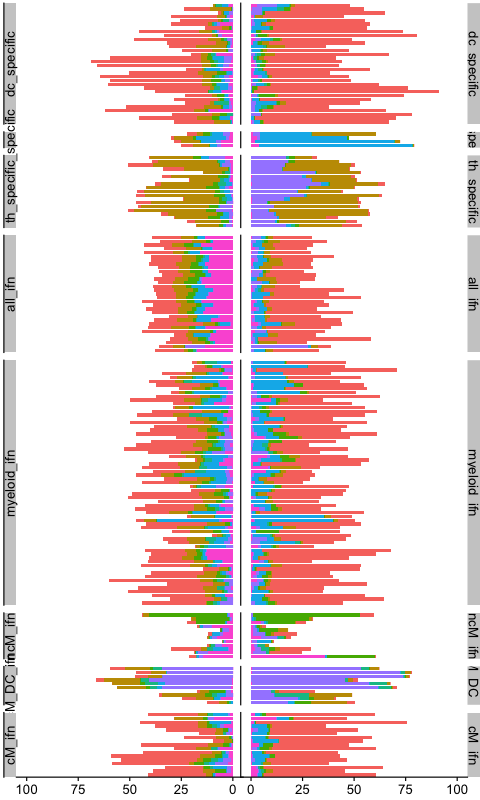

In [526]:
options(repr.plot.width = 6, repr.plot.height = 10)
out_sle_prop <- rbind(data.frame(gene_names=rownames(output_sle_prop_noint), prop=output_sle_prop_noint[,"cM"], cell="cM"),
             data.frame(gene_names=rownames(output_sle_prop_noint), prop=output_sle_prop_noint[,"Th"], cell="Th"),
             data.frame(gene_names=rownames(output_sle_prop_noint), prop=output_sle_prop_noint[,"B"], cell="B"),
             data.frame(gene_names=rownames(output_sle_prop_noint), prop=output_sle_prop_noint[,"NK"], cell="NK"),
             data.frame(gene_names=rownames(output_sle_prop_noint), prop=output_sle_prop_noint[,"ncM"], cell="ncM"),
             data.frame(gene_names=rownames(output_sle_prop_noint), prop=output_sle_prop_noint[,"Tc"], cell="Tc"),
             data.frame(gene_names=rownames(output_sle_prop_noint), prop=output_sle_prop_noint[,"DC"], cell="DC"))

##cuttree_ordered <- cuttree_out[order(cuttree_out[,"cluster"]),]
##matched <- match(out_sle_prop$gene_names, rownames(cuttree_ordered))

matched <- match(out_sle_prop$gene_names, rev(pheatmap_out$tree_row$labels[pheatmap_out$tree_row$order]))
out_sle_prop <- out_sle_prop[which(!is.na(matched)),]
out_sle_prop_ordered <- out_sle_prop[order(na.omit(matched)),]
out_sle_prop_ordered <- cbind(out_sle_prop_ordered, cluster=cuttree_out[match(out_sle_prop_ordered$gene_names,cuttree_out[,"gene"]),"cluster"])
out_sle_prop_ordered$cluster <- factor(out_sle_prop_ordered$cluster, levels=c('dc_specific','tc_specific','th_specific','all_ifn','myeloid_ifn','ncM_ifn','cM_DC_ifn','cM_ifn'))

out_sle_prop_ordered$gene_names <- factor(out_sle_prop_ordered$gene_names,levels=c(unique(as.character(out_sle_prop_ordered$gene_names))))
sle_prop_plot <- ggplot(aes(x=gene_names,y=prop,fill=cell),data=out_sle_prop_ordered)+geom_bar(stat="identity")+theme(axis.title.x = element_blank(), 
        axis.title.y = element_blank(), 
        axis.text.y = element_blank(), 
        axis.ticks.y = element_blank(), 
        plot.margin = unit(c(1,-1,1,0), "mm"),
        legend.position="none")+facet_grid(cluster~.,scales = "free_y",space="free_y",switch="y")+scale_y_reverse(limits=c(100,0))+coord_flip()


options(repr.plot.width = 6, repr.plot.height = 10)
out_sle_expr <- rbind(data.frame(gene_names=rownames(output_sle_expr_noint), prop=output_sle_expr_noint[,"cM"], cell="cM"),
             data.frame(gene_names=rownames(output_sle_expr_noint), prop=output_sle_expr_noint[,"Th"], cell="Th"),
             data.frame(gene_names=rownames(output_sle_expr_noint), prop=output_sle_expr_noint[,"B"], cell="B"),
             data.frame(gene_names=rownames(output_sle_expr_noint), prop=output_sle_expr_noint[,"NK"], cell="NK"),
             data.frame(gene_names=rownames(output_sle_expr_noint), prop=output_sle_expr_noint[,"ncM"], cell="ncM"),
             data.frame(gene_names=rownames(output_sle_expr_noint), prop=output_sle_expr_noint[,"Tc"], cell="Tc"),
             data.frame(gene_names=rownames(output_sle_expr_noint), prop=output_sle_expr_noint[,"DC"], cell="DC"))
##cuttree_ordered <- cuttree_out[order(cuttree_out[,"cluster"]),]

matched_expr <- match(out_sle_expr$gene_names, rev(pheatmap_out$tree_row$labels[pheatmap_out$tree_row$order]))
out_sle_expr <- out_sle_expr[which(!is.na(matched)),]
out_sle_expr_ordered <- out_sle_expr[order(na.omit(matched)),]
out_sle_expr_ordered <- cbind(out_sle_expr_ordered, cluster=cuttree_out[match(out_sle_expr_ordered$gene_names,cuttree_out[,"gene"]),"cluster"])
out_sle_expr_ordered$cluster <- factor(out_sle_expr_ordered$cluster, levels=c('dc_specific','tc_specific','th_specific','all_ifn','myeloid_ifn','ncM_ifn','cM_DC_ifn','cM_ifn'))

out_sle_expr_ordered$gene_names <- factor(out_sle_expr_ordered$gene_names,levels=c(unique(as.character(out_sle_expr_ordered$gene_names))))
sle_expr_plot <- ggplot(aes(x=gene_names,y=prop,fill=cell),data=out_sle_expr_ordered)+geom_bar(stat="identity")+ylim(0,100)+coord_flip()+theme(axis.title.x = element_blank(), axis.title.y = element_blank(), 
        axis.text.y = element_blank(), axis.ticks.y = element_blank(),
        plot.margin = unit(c(1,0,1,-1), "mm"),legend.position="none")+facet_grid(cluster~.,scales = "free_y",space="free_y")

library(gridExtra)
gg1 <- ggplot_gtable(ggplot_build(sle_prop_plot))
gg2 <- ggplot_gtable(ggplot_build(sle_expr_plot))

grid.arrange(gg1,gg2,ncol=2,widths=c(4/9,4/9))

Warning message:
“Removed 1 rows containing missing values (position_stack).”Warning message:
“Removed 91 rows containing missing values (geom_bar).”Warning message:
“Removed 18 rows containing missing values (position_stack).”Warning message:
“Removed 92 rows containing missing values (geom_bar).”

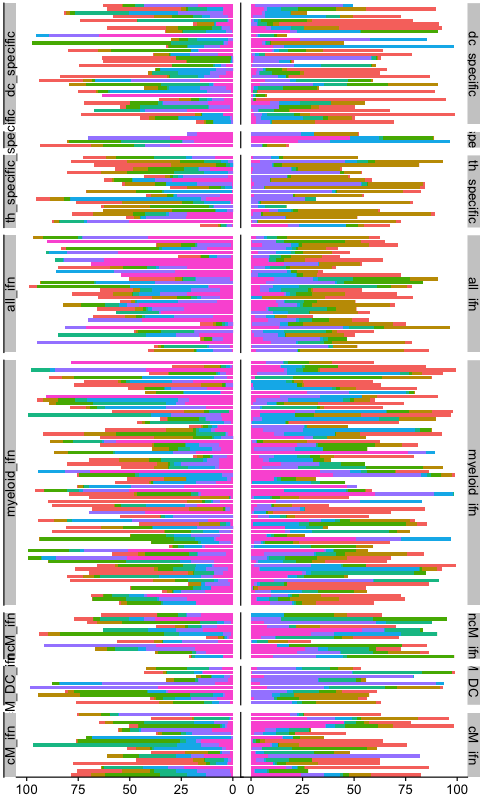

In [527]:
options(repr.plot.width = 6, repr.plot.height = 10)
out_healthy_prop <- rbind(data.frame(gene_names=rownames(output_healthy_prop_noint), prop=output_healthy_prop_noint[,"cM"], cell="cM"),
             data.frame(gene_names=rownames(output_healthy_prop_noint), prop=output_healthy_prop_noint[,"Th"], cell="Th"),
             data.frame(gene_names=rownames(output_healthy_prop_noint), prop=output_healthy_prop_noint[,"B"], cell="B"),
             data.frame(gene_names=rownames(output_healthy_prop_noint), prop=output_healthy_prop_noint[,"NK"], cell="NK"),
             data.frame(gene_names=rownames(output_healthy_prop_noint), prop=output_healthy_prop_noint[,"ncM"], cell="ncM"),
             data.frame(gene_names=rownames(output_healthy_prop_noint), prop=output_healthy_prop_noint[,"Tc"], cell="Tc"),
             data.frame(gene_names=rownames(output_healthy_prop_noint), prop=output_healthy_prop_noint[,"DC"], cell="DC"))

matched <- match(out_healthy_prop$gene_names, rev(pheatmap_out$tree_row$labels[pheatmap_out$tree_row$order]))
out_healthy_prop <- out_healthy_prop[which(!is.na(matched)),]
out_healthy_prop_ordered <- out_healthy_prop[order(na.omit(matched)),]
out_healthy_prop_ordered <- cbind(out_healthy_prop_ordered, cluster=cuttree_out[match(out_healthy_prop_ordered$gene_names,cuttree_out[,"gene"]),"cluster"])
out_healthy_prop_ordered$cluster <- factor(out_healthy_prop_ordered$cluster, levels=c('dc_specific','tc_specific','th_specific','all_ifn','myeloid_ifn','ncM_ifn','cM_DC_ifn','cM_ifn'))

out_healthy_prop_ordered$gene_names <- factor(out_healthy_prop_ordered$gene_names,levels=c(unique(as.character(out_healthy_prop_ordered$gene_names))))
healthy_prop_plot <- ggplot(aes(x=gene_names,y=prop,fill=cell),data=out_healthy_prop_ordered)+geom_bar(stat="identity")+theme(axis.title.x = element_blank(), 
        axis.title.y = element_blank(), 
        axis.text.y = element_blank(), 
        axis.ticks.y = element_blank(), 
        plot.margin = unit(c(1,-1,1,0), "mm"),
        legend.position="none")+facet_grid(cluster~.,scales = "free_y",space="free_y",switch="y")+scale_y_reverse(limits=c(100,0))+coord_flip()

options(repr.plot.width = 6, repr.plot.height = 10)
out_healthy_expr <- rbind(data.frame(gene_names=rownames(output_healthy_expr_noint), prop=output_healthy_expr_noint[,"cM"], cell="cM"),
             data.frame(gene_names=rownames(output_healthy_expr_noint), prop=output_healthy_expr_noint[,"Th"], cell="Th"),
             data.frame(gene_names=rownames(output_healthy_expr_noint), prop=output_healthy_expr_noint[,"B"], cell="B"),
             data.frame(gene_names=rownames(output_healthy_expr_noint), prop=output_healthy_expr_noint[,"NK"], cell="NK"),
             data.frame(gene_names=rownames(output_healthy_expr_noint), prop=output_healthy_expr_noint[,"ncM"], cell="ncM"),
             data.frame(gene_names=rownames(output_healthy_expr_noint), prop=output_healthy_expr_noint[,"Tc"], cell="Tc"),
             data.frame(gene_names=rownames(output_healthy_expr_noint), prop=output_healthy_expr_noint[,"DC"], cell="DC"))
##cuttree_ordered <- cuttree_out[order(cuttree_out[,"cluster"]),]
matched_expr <- match(out_healthy_expr$gene_names, rev(pheatmap_out$tree_row$labels[pheatmap_out$tree_row$order]))
out_healthy_expr <- out_healthy_expr[which(!is.na(matched)),]
out_healthy_expr_ordered <- out_healthy_expr[order(na.omit(matched)),]
out_healthy_expr_ordered <- cbind(out_healthy_expr_ordered, cluster=cuttree_out[match(out_healthy_expr_ordered$gene_names,cuttree_out[,"gene"]),"cluster"])
out_healthy_expr_ordered$cluster <- factor(out_healthy_expr_ordered$cluster, levels=c('dc_specific','tc_specific','th_specific','all_ifn','myeloid_ifn','ncM_ifn','cM_DC_ifn','cM_ifn'))

out_healthy_expr_ordered$gene_names <- factor(out_healthy_expr_ordered$gene_names,levels=c(unique(as.character(out_healthy_expr_ordered$gene_names))))
healthy_expr_plot <- ggplot(aes(x=gene_names,y=prop,fill=cell),data=out_healthy_expr_ordered)+geom_bar(stat="identity")+ylim(0,100)+coord_flip()+theme(axis.title.x = element_blank(), axis.title.y = element_blank(), 
        axis.text.y = element_blank(), axis.ticks.y = element_blank(),
        plot.margin = unit(c(1,0,1,-1), "mm"),legend.position="none")+facet_grid(cluster~.,scales = "free_y",space="free_y")

library(gridExtra)
gg1 <- ggplot_gtable(ggplot_build(healthy_prop_plot))
gg2 <- ggplot_gtable(ggplot_build(healthy_expr_plot))

grid.arrange(gg1,gg2,ncol=2,widths=c(4/9,4/9))

In [528]:
r2 <- cbind(output_sle_down_prop_noint[,"adj r2"],output_healthy_prop_noint[,"adj r2"])
head(r2[order(apply(r2,1,mean),decreasing=T),])

[,1]     [,2]    
LST1  87.50459 96.66114
PRF1  93.60331 90.36130
GNS   85.73753 96.09432
CTSZ  90.86384 90.57718
CST3  88.66592 91.77393
BLVRB 86.70203 93.37627

In [529]:
r2 <- cbind(output_sle_down_expr_noint[,"adj r2"],output_healthy_expr_noint[,"adj r2"])
head(r2[order(apply(r2,1,mean),decreasing=T),])

[,1]     [,2]    
RPS26      99.61131 99.84994
EIF5A      99.46541 99.86361
RP1-3J17.3 99.53842 99.76853
AL592183.1 99.29382 99.77829
ERAP2      98.92017 99.89328
XIST       99.63780 98.75181

In [530]:
r2.rat <- cbind(output_sle_down_prop_noint[,"total r2"]/(output_sle_down_expr_noint[,"total r2"]+output_sle_down_prop_noint[,"total r2"]),
                output_healthy_prop_noint[,"total r2"]/(output_healthy_expr_noint[,"total r2"]+output_healthy_prop_noint[,"total r2"]))
r2.rat["NKG7",]

[1] 0.5019560 0.4437705

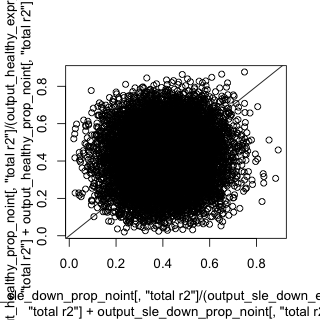

In [817]:
## look for cell type proportion genes
options(repr.plot.width = 4, repr.plot.height = 4)
plot(output_sle_down_prop_noint[,"total r2"]/(output_sle_down_expr_noint[,"total r2"]+output_sle_down_prop_noint[,"total r2"]),
output_healthy_prop_noint[,"total r2"]/(output_healthy_expr_noint[,"total r2"]+output_healthy_prop_noint[,"total r2"]))
abline(a=0,b=1)


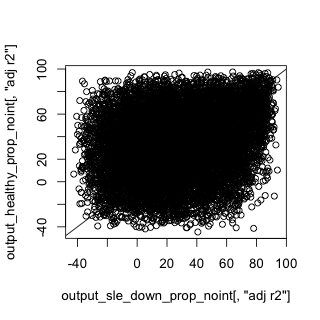

In [532]:
options(repr.plot.width = 4, repr.plot.height = 4)
plot(output_sle_down_prop_noint[,"adj r2"], output_healthy_prop_noint[,"adj r2"])
abline(b=1,a=0)

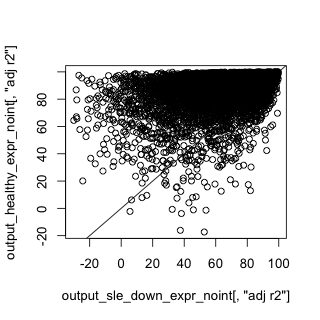

In [533]:
options(repr.plot.width = 4, repr.plot.height = 4)
plot(output_sle_down_expr_noint[,"adj r2"], output_healthy_expr_noint[,"adj r2"])
abline(b=1,a=0)

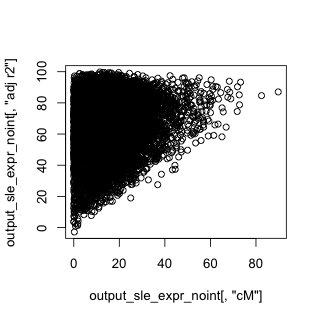

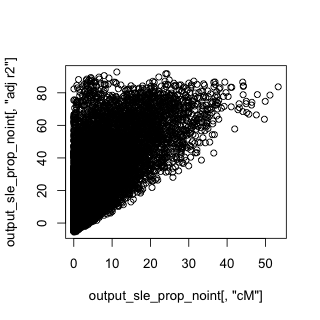

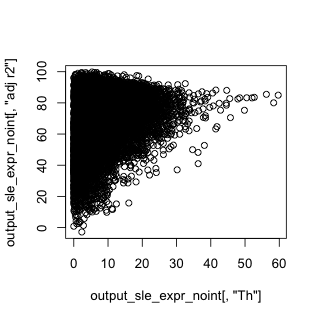

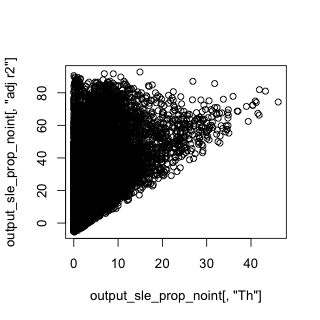

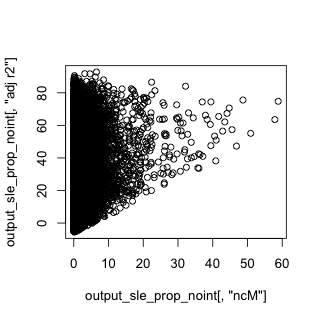

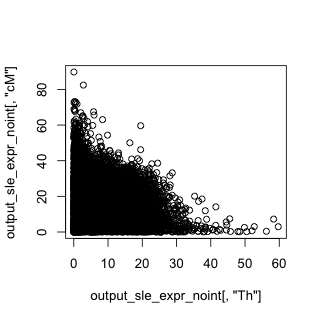

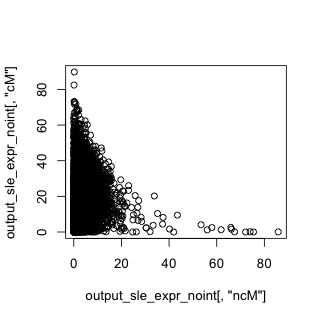

In [534]:
options(repr.plot.width = 4, repr.plot.height = 4)
plot(output_sle_expr_noint[,"cM"], output_sle_expr_noint[,"adj r2"])
plot(output_sle_prop_noint[,"cM"], output_sle_prop_noint[,"adj r2"])
plot(output_sle_expr_noint[,"Th"], output_sle_expr_noint[,"adj r2"])
plot(output_sle_prop_noint[,"Th"], output_sle_prop_noint[,"adj r2"])
plot(output_sle_prop_noint[,"ncM"], output_sle_prop_noint[,"adj r2"])
plot(output_sle_expr_noint[,"Th"], output_sle_expr_noint[,"cM"])
plot(output_sle_expr_noint[,"ncM"], output_sle_expr_noint[,"cM"])


# Let's do the estimation using resampling

We are going to work with counts here. Given the expression of an arbitrary gene $i$ and individual $j$ in PBMCs $P$, and two cell types (B and T) for simplicity. $N_j^B$ and $N_j^T$ are the number of B cells and T cells for individual $j$.

\begin{align*}
P_{ij} &= B_{ij1}+B_{ij2}+...+B_{ijN_b}+T_{ij1}+T_{ij2}+...+T_{ijN_t} \\
P_{ij} &= \sum_k^{N_j^B}B_{ijk} + \sum_k^{N_j^T}T_{ijk} \\
P_{ij} &= N_j^B\times{\bar{B}_{ij}} + N_j^T\times{\bar{T}_{ij}} \\
\bar{P_{ij}} &= {{N_j^B}\over{N_j^{PBMC}}}\times{\bar{B_{ij}}} + {{N_j^T}\over{N_j^{PBMC}}}\times{\bar{T_{ij}}} \\
\bar{P_{ij}} &= {{{\rho}_j^B}\times{\bar{B_{ij}}} + {{\rho}_j^T}\times{\bar{T_{ij}}}}
\end{align*}


$\bar{B}_{ij}$ is the average expression of the gene $i$ in individual $j$ in cell type B. $\bar{T}_{ij}$ is the average expression of the gene $i$ in individual $j$ in cell type T

First, fit proportion

\begin{align*}
\bar{P_{ij}} &= {{\rho}_j^B}\times{\bar{B_{i}}} + {{\rho}_j^T}\times{\bar{T_{i}}}
\end{align*}

When we fit, we will take the average of expression over all individuals. That is $\bar{B_{i}} = {{\sum_j^{J}\bar{B_{ij}}}\over{J}}$

Second, fit expression

\begin{align*}
\bar{P_{ij}} &= {\bar{{\rho}^B}}\times{B_{ij}} + {\bar{{\rho}^T}}\times{T_{ij}}
\end{align*}

When we fit, we will take the average of expression over all individuals. That is $\bar{{\rho}^B} = {{{\sum_j^{J}{\rho_j^B}}}\over{J}}$


## First, let's do all individuals

In [535]:
##joined_pivot_filtered <- joined_pivot[match(colnames(pbmc_expr),joined_pivot$ind_cov),]
# cm_counts_mean <- sweep(exp(cm_expr), 2, joined_pivot_filtered$counts*cm_prop/100, "/")
# th_counts_mean <- sweep(exp(th_expr), 2, joined_pivot_filtered$counts*th_prop/100, "/")
# tc_counts_mean <- sweep(exp(tc_expr), 2, joined_pivot_filtered$counts*tc_prop/100, "/")
# b_counts_mean <- sweep(exp(b_expr), 2, joined_pivot_filtered$counts*b_prop/100, "/")
# nk_counts_mean <- sweep(exp(nk_expr), 2, joined_pivot_filtered$counts*nk_prop/100, "/")
# ncm_counts_mean <- sweep(exp(ncm_expr), 2, joined_pivot_filtered$counts*ncm_prop/100, "/")
# dc_counts_mean <- sweep(exp(dc_expr), 2, joined_pivot_filtered$counts*dc_prop/100, "/")
# pbmc_counts_mean <- sweep(exp(pbmc_expr), 2, joined_pivot_filtered$counts, "/")

cm_counts_mean <- exp(cm_expr)
th_counts_mean <- exp(th_expr)
tc_counts_mean <- exp(tc_expr)
b_counts_mean <- exp(b_expr)
nk_counts_mean <- exp(nk_expr)
ncm_counts_mean <- exp(ncm_expr)
dc_counts_mean <- exp(dc_expr)
pbmc_counts_mean <- exp(pbmc_expr)


## some samples do not have b cells or dcs, let's set those means to 0
b_counts_mean[is.nan(b_counts_mean)] <- 0;
dc_counts_mean[is.nan(dc_counts_mean)] <- 0;
b_counts_mean[!is.finite(b_counts_mean)] <- 0;
dc_counts_mean[!is.finite(dc_counts_mean)] <- 0;

# cm_counts_global_mean <- rowSums(exp(cm_expr))/sum(joined_pivot_filtered$counts*cm_prop/100, na.rm=T)
# th_counts_global_mean <- rowSums(exp(th_expr))/sum(joined_pivot_filtered$counts*th_prop/100, na.rm=T)
# tc_counts_global_mean <- rowSums(exp(tc_expr))/sum(joined_pivot_filtered$counts*tc_prop/100, na.rm=T)
# b_counts_global_mean <- rowSums(exp(b_expr))/sum(joined_pivot_filtered$counts*b_prop/100, na.rm=T)
# nk_counts_global_mean <- rowSums(exp(nk_expr))/sum(joined_pivot_filtered$counts*nk_prop/100, na.rm=T)
# ncm_counts_global_mean <- rowSums(exp(ncm_expr))/sum(joined_pivot_filtered$counts*ncm_prop/100, na.rm=T)
# dc_counts_global_mean <- rowSums(exp(dc_expr))/sum(joined_pivot_filtered$counts*dc_prop/100, na.rm=T)

cm_counts_global_mean <- apply(exp(cm_expr),1,mean)
th_counts_global_mean <- apply(exp(th_expr),1,mean)
tc_counts_global_mean <- apply(exp(tc_expr),1,mean)
b_counts_global_mean <- apply(exp(b_expr),1,mean)
nk_counts_global_mean <- apply(exp(nk_expr),1,mean)
ncm_counts_global_mean <- apply(exp(ncm_expr),1,mean)
dc_counts_global_mean <- apply(exp(dc_expr),1,mean)


a <- cbind(cm_counts_global_mean, th_counts_global_mean, tc_counts_global_mean, b_counts_global_mean, nk_counts_global_mean, ncm_counts_global_mean, dc_counts_global_mean)
##sle_counts_means <- cbind(cm_sle_counts_mean, th_sle_counts_mean, tc_sle_counts_mean, b_sle_counts_mean, nk_sle_counts_mean, ncm_sle_counts_mean, dc_sle_counts_mean)

output_direct_global_prop <- NULL;

for(i in 1:nrow(pbmc_counts[match(expr_gene_names, counts_gene_names),])) {    
    predicted <- rowSums(cbind(cm_counts_global_mean[i]*cm_prop/100,
                               th_counts_global_mean[i]*th_prop/100, 
                               b_counts_global_mean[i]*b_prop/100, 
                               nk_counts_global_mean[i]*nk_prop/100, 
                               ncm_counts_global_mean[i]*ncm_prop/100, 
                               tc_counts_global_mean[i]*tc_prop/100,##), na.rm=T)
                               dc_counts_global_mean[i]*dc_prop/100), na.rm=T)

    output_direct_global_prop <- rbind(output_direct_global_prop, c(cor(log(predicted),pbmc_expr_std[i,])^2*100, 1-cor(log(predicted),pbmc_expr_std[i,])^2*100))
}


rownames(output_direct_global_prop) <- counts_gene_names[match(expr_gene_names, counts_gene_names)];
colnames(output_direct_global_prop) <- c("r2", "res")

output_direct_global_expr <- NULL;

cm_prop_global_mean <- sum(joined_pivot_filtered$counts*cm_prop/100,na.rm=T)/sum(joined_pivot_filtered$counts)
th_prop_global_mean <- sum(joined_pivot_filtered$counts*th_prop/100,na.rm=T)/sum(joined_pivot_filtered$counts)
tc_prop_global_mean <- sum(joined_pivot_filtered$counts*tc_prop/100,na.rm=T)/sum(joined_pivot_filtered$counts)
b_prop_global_mean <- sum(joined_pivot_filtered$counts*b_prop/100,na.rm=T)/sum(joined_pivot_filtered$counts)
nk_prop_global_mean <- sum(joined_pivot_filtered$counts*nk_prop/100,na.rm=T)/sum(joined_pivot_filtered$counts)
ncm_prop_global_mean <- sum(joined_pivot_filtered$counts*ncm_prop/100,na.rm=T)/sum(joined_pivot_filtered$counts)
dc_prop_global_mean <- sum(joined_pivot_filtered$counts*dc_prop/100,na.rm=T)/sum(joined_pivot_filtered$counts)

a_prop <- c(cm_prop_global_mean, th_prop_global_mean, tc_prop_global_mean, b_prop_global_mean, nk_prop_global_mean, ncm_prop_global_mean, dc_prop_global_mean);

for(i in 1:nrow(pbmc_counts[match(expr_gene_names, counts_gene_names),])) {
   predicted <- rowSums(cbind(cm_counts_mean[i,]*cm_prop_global_mean, 
                              th_counts_mean[i,]*th_prop_global_mean, 
                              b_counts_mean[i,]*b_prop_global_mean,
                              nk_counts_mean[i,]*nk_prop_global_mean, 
                               ncm_counts_mean[i,]*ncm_prop_global_mean,
                              tc_counts_mean[i,]*tc_prop_global_mean,##), na.rm=T)
                              dc_counts_mean[i,]*dc_prop_global_mean), na.rm=T)

    output_direct_global_expr <- rbind(output_direct_global_expr, c(cor(log(predicted),pbmc_expr_std[i,])^2*100, 1-cor(log(predicted),pbmc_expr_std[i,])^2*100))
}

rownames(output_direct_global_expr) <- expr_gene_names;
colnames(output_direct_global_expr) <- c("r2", "res")

Warning message in log(predicted):
“NaNs produced”Warning message in log(predicted):
“NaNs produced”Warning message in log(predicted):
“NaNs produced”Warning message in log(predicted):
“NaNs produced”Warning message in log(predicted):
“NaNs produced”Warning message in log(predicted):
“NaNs produced”

[1] 0.8942793

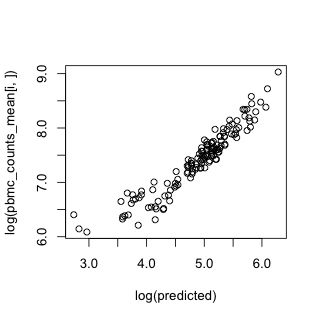

[1] 0.4346369

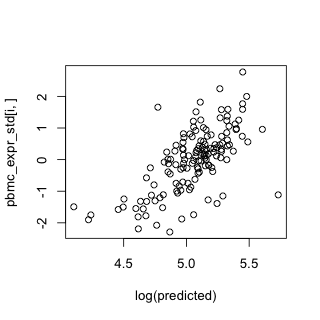

[1] 0.9424095

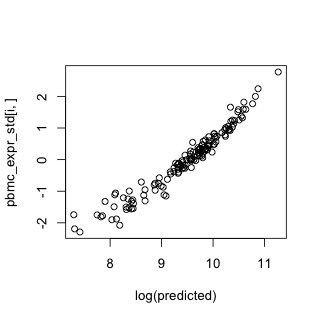

In [536]:
options(repr.plot.width = 4, repr.plot.height = 4)
i=10
i=grep("^CD22$",expr_gene_names)[1]
##i=grep("ERAP2",expr_gene_names)[1]
predicted <- rowSums(cbind(cm_counts_global_mean[i]*cm_prop/100,
                               th_counts_global_mean[i]*th_prop/100,
                               b_counts_global_mean[i]*b_prop/100,
                               nk_counts_global_mean[i]*nk_prop/100, 
                               ncm_counts_global_mean[i]*ncm_prop/100,
                               tc_counts_global_mean[i]*tc_prop/100,
                     dc_counts_global_mean[i]*dc_prop/100),na.rm=T)
plot(log(predicted), log(pbmc_counts_mean[i,]))
cor(log(predicted), pbmc_expr_std[i,])^2

predicted <- rowSums(cbind(cm_counts_mean[i,]*cm_prop_global_mean, 
                              th_counts_mean[i,]*th_prop_global_mean, 
                              b_counts_mean[i,]*b_prop_global_mean,
                              nk_counts_mean[i,]*nk_prop_global_mean, 
                               ncm_counts_mean[i,]*ncm_prop_global_mean,
                              tc_counts_mean[i,]*tc_prop_global_mean,
                          dc_counts_mean[i,]*dc_prop_global_mean), na.rm=T)
plot(log(predicted), pbmc_expr_std[i,])
cor(log(predicted), pbmc_expr_std[i,])^2


predicted <- rowSums(cbind(cm_counts_mean[i,]*cm_prop, 
                              th_counts_mean[i,]*th_prop, 
                              b_counts_mean[i,]*b_prop,
                              nk_counts_mean[i,]*nk_prop, 
                               ncm_counts_mean[i,]*ncm_prop,
                              tc_counts_mean[i,]*tc_prop,
                          dc_counts_mean[i,]*dc_prop), na.rm=T)
plot(log(predicted), pbmc_expr_std[i,])
cor(log(predicted), pbmc_expr_std[i,])^2

## Second, let's do SLE

Mean of means might be a bit unstable, let's calculate a global mean

### All SLE

In [537]:
# cm_sle_counts_mean <- sweep(exp(cm_sle_expr), 2, joined_pivot_sle$counts*cm_sle_prop/100, "/")
# th_sle_counts_mean <- sweep(exp(th_sle_expr), 2, joined_pivot_sle$counts*th_sle_prop/100, "/")
# tc_sle_counts_mean <- sweep(exp(tc_sle_expr), 2, joined_pivot_sle$counts*tc_sle_prop/100, "/")
# b_sle_counts_mean <- sweep(exp(b_sle_expr), 2, joined_pivot_sle$counts*b_sle_prop/100, "/")
# nk_sle_counts_mean <- sweep(exp(nk_sle_expr), 2, joined_pivot_sle$counts*nk_sle_prop/100, "/")
# ncm_sle_counts_mean <- sweep(exp(ncm_sle_expr), 2, joined_pivot_sle$counts*ncm_sle_prop/100, "/")
# dc_sle_counts_mean <- sweep(exp(dc_sle_expr), 2, joined_pivot_sle$counts*dc_sle_prop/100, "/")
# pbmc_sle_counts_mean <- sweep(exp(pbmc_sle_expr), 2, joined_pivot_sle$counts, "/")


cm_sle_counts_mean <- exp(cm_sle_expr);
th_sle_counts_mean <- exp(th_sle_expr);
tc_sle_counts_mean <- exp(tc_sle_expr);
b_sle_counts_mean <- exp(b_sle_expr);
nk_sle_counts_mean <- exp(nk_sle_expr);
ncm_sle_counts_mean <- exp(ncm_sle_expr);
dc_sle_counts_mean <- exp(dc_sle_expr);
pbmc_sle_counts_mean <- exp(pbmc_sle_expr);

# cm_sle_counts_global_mean <- rowSums(exp(cm_sle_expr))/sum(joined_pivot_sle$counts*cm_sle_prop/100, na.rm=T)
# th_sle_counts_global_mean <- rowSums(exp(th_sle_expr))/sum(joined_pivot_sle$counts*th_sle_prop/100, na.rm=T)
# tc_sle_counts_global_mean <- rowSums(exp(tc_sle_expr))/sum(joined_pivot_sle$counts*tc_sle_prop/100, na.rm=T)
# b_sle_counts_global_mean <- rowSums(exp(b_sle_expr))/sum(joined_pivot_sle$counts*b_sle_prop/100, na.rm=T)
# nk_sle_counts_global_mean <- rowSums(exp(nk_sle_expr))/sum(joined_pivot_sle$counts*nk_sle_prop/100, na.rm=T)
# ncm_sle_counts_global_mean <- rowSums(exp(ncm_sle_expr))/sum(joined_pivot_sle$counts*ncm_sle_prop/100, na.rm=T)
# dc_sle_counts_global_mean <- rowSums(exp(dc_sle_expr))/sum(joined_pivot_sle$counts*dc_sle_prop/100, na.rm=T)

cm_sle_counts_global_mean <- apply(exp(cm_sle_expr),1,mean)
th_sle_counts_global_mean <- apply(exp(th_sle_expr),1,mean)
tc_sle_counts_global_mean <- apply(exp(tc_sle_expr),1,mean)
b_sle_counts_global_mean <- apply(exp(b_sle_expr),1,mean)
nk_sle_counts_global_mean <- apply(exp(nk_sle_expr),1,mean)
ncm_sle_counts_global_mean <- apply(exp(ncm_sle_expr),1,mean)
dc_sle_counts_global_mean <- apply(exp(dc_sle_expr),1,mean)


## some samples do not have b cells or dcs, let's set those means to 0
b_sle_counts_mean[is.nan(b_sle_counts_mean)] <- 0;
dc_sle_counts_mean[is.nan(dc_sle_counts_mean)] <- 0;
b_sle_counts_mean[!is.finite(b_sle_counts_mean)] <- 0;
dc_sle_counts_mean[!is.finite(dc_sle_counts_mean)] <- 0;

##sle_counts_means <- cbind(cm_sle_counts_mean, th_sle_counts_mean, tc_sle_counts_mean, b_sle_counts_mean, nk_sle_counts_mean, ncm_sle_counts_mean, dc_sle_counts_mean)

output_sle_direct_global_prop <- NULL;

for(i in 1:nrow(pbmc_sle_counts[match(expr_gene_names, counts_gene_names),])) {    
    predicted <- rowSums(cbind(cm_sle_counts_global_mean[i]*cm_sle_prop/100,
                               th_sle_counts_global_mean[i]*th_sle_prop/100,
                               b_sle_counts_global_mean[i]*b_sle_prop/100,
                               nk_sle_counts_global_mean[i]*nk_sle_prop/100, 
                               ncm_sle_counts_global_mean[i]*ncm_sle_prop/100,
                               tc_sle_counts_global_mean[i]*tc_sle_prop/100,##), na.rm=T)
                               dc_sle_counts_global_mean[i]*dc_sle_prop/100),na.rm=T)

    output_sle_direct_global_prop <- rbind(output_sle_direct_global_prop, 
                                               c(cor(log(predicted),pbmc_sle_expr_std[i,])^2*100, 1-cor(log(predicted),pbmc_sle_expr_std[i,])^2*100))
}


rownames(output_sle_direct_global_prop) <- counts_gene_names[match(expr_gene_names, counts_gene_names)];
colnames(output_sle_direct_global_prop) <- c("r2", "res")

output_sle_direct_global_expr <- NULL;

cm_sle_prop_global_mean <- sum(joined_pivot_sle$counts*cm_sle_prop/100,na.rm=T)/sum(joined_pivot_sle$counts)
th_sle_prop_global_mean <- sum(joined_pivot_sle$counts*th_sle_prop/100,na.rm=T)/sum(joined_pivot_sle$counts)
tc_sle_prop_global_mean <- sum(joined_pivot_sle$counts*tc_sle_prop/100,na.rm=T)/sum(joined_pivot_sle$counts)
b_sle_prop_global_mean <- sum(joined_pivot_sle$counts*b_sle_prop/100,na.rm=T)/sum(joined_pivot_sle$counts)
nk_sle_prop_global_mean <- sum(joined_pivot_sle$counts*nk_sle_prop/100,na.rm=T)/sum(joined_pivot_sle$counts)
ncm_sle_prop_global_mean <- sum(joined_pivot_sle$counts*ncm_sle_prop/100,na.rm=T)/sum(joined_pivot_sle$counts)
dc_sle_prop_global_mean <- sum(joined_pivot_sle$counts*dc_sle_prop/100,na.rm=T)/sum(joined_pivot_sle$counts)

for(i in 1:nrow(pbmc_sle_counts[match(expr_gene_names, counts_gene_names),])) {
   predicted <- rowSums(cbind(cm_sle_counts_mean[i,]*cm_sle_prop_global_mean,
                              th_sle_counts_mean[i,]*th_sle_prop_global_mean,
                              b_sle_counts_mean[i,]*b_sle_prop_global_mean,
                              nk_sle_counts_mean[i,]*nk_sle_prop_global_mean, 
                               ncm_sle_counts_mean[i,]*ncm_sle_prop_global_mean,
                              tc_sle_counts_mean[i,]*tc_sle_prop_global_mean,##), na.rm=T)
                              dc_sle_counts_mean[i]*dc_sle_prop_global_mean),na.rm=T)

   ##output_sle_direct_global_expr <- rbind(output_sle_direct_global_expr, c(var(predicted)/var(pbmc_sle_counts_mean[i,],na.rm=T)*100, 100-var(predicted)/var(pbmc_sle_counts_mean[i,],na.rm=T)*100))
  output_sle_direct_global_expr <- rbind(output_sle_direct_global_expr, 
                                         c(cor(log(predicted),pbmc_sle_expr_std[i,])^2*100, 1-cor(log(predicted),pbmc_sle_expr_std[i,])^2*100))
}

rownames(output_sle_direct_global_expr) <- expr_gene_names;
colnames(output_sle_direct_global_expr) <- c("r2", "res")

[1] 0.9105623

[1] 87.60595

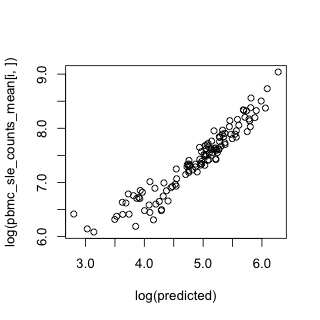

[1] 0.3009795

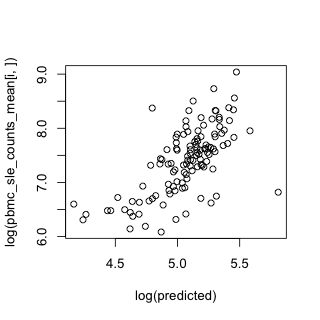

[1] 0.9679007

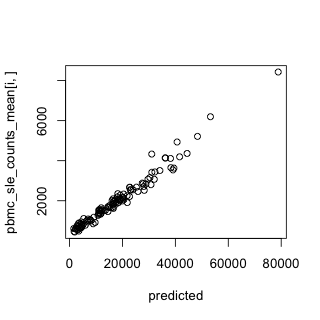

In [538]:
options(repr.plot.width = 4, repr.plot.height = 4)
i=2
i=grep("^CD22$",expr_gene_names)[1]
predicted <- rowSums(cbind(cm_sle_counts_global_mean[i]*cm_sle_prop/100,
                               th_sle_counts_global_mean[i]*th_sle_prop/100,
                               b_sle_counts_global_mean[i]*b_sle_prop/100,
                               nk_sle_counts_global_mean[i]*nk_sle_prop/100, 
                               ncm_sle_counts_global_mean[i]*ncm_sle_prop/100,
                               tc_sle_counts_global_mean[i]*tc_sle_prop/100,
                          dc_sle_counts_global_mean[i]*dc_sle_prop/100), na.rm=T)
plot(log(predicted), log(pbmc_sle_counts_mean[i,]))
cor(predicted, pbmc_sle_counts_mean[i,])^2
output_sle_prop_noint[i,"adj r2"]

predicted <- rowSums(cbind(cm_sle_counts_mean[i,]*cm_sle_prop_global_mean, 
                              th_sle_counts_mean[i,]*th_sle_prop_global_mean, 
                              b_sle_counts_mean[i,]*b_sle_prop_global_mean,
                              nk_sle_counts_mean[i,]*nk_sle_prop_global_mean, 
                               ncm_sle_counts_mean[i,]*ncm_sle_prop_global_mean,
                              tc_sle_counts_mean[i,]*tc_sle_prop_global_mean,##), na.rm=T)
                          dc_sle_counts_mean[i,]*dc_sle_prop_global_mean), na.rm=T)

plot(log(predicted), log(pbmc_sle_counts_mean[i,]))
cor(predicted, pbmc_sle_counts_mean[i,])^2

predicted <- rowSums(cbind(cm_sle_counts_mean[i,]*cm_sle_prop, 
                              th_sle_counts_mean[i,]*th_sle_prop, 
                              b_sle_counts_mean[i,]*b_sle_prop,
                              nk_sle_counts_mean[i,]*nk_sle_prop, 
                               ncm_sle_counts_mean[i,]*ncm_sle_prop,
                              tc_sle_counts_mean[i,]*tc_sle_prop,
                          dc_sle_counts_mean[i,]*dc_sle_prop), na.rm=T)
plot(predicted, pbmc_sle_counts_mean[i,])
cor(predicted, pbmc_sle_counts_mean[i,])^2



### Now, let's downsample to 46 and redo SLE

In [539]:
cm_sle_down_counts_global_mean <- apply(exp(cm_sle_expr[,samples]),1,mean)
th_sle_down_counts_global_mean <- apply(exp(th_sle_expr[,samples]),1,mean)
tc_sle_down_counts_global_mean <- apply(exp(tc_sle_expr[,samples]),1,mean)
b_sle_down_counts_global_mean <- apply(exp(b_sle_expr[,samples]),1,mean)
nk_sle_down_counts_global_mean <- apply(exp(nk_sle_expr[,samples]),1,mean)
ncm_sle_down_counts_global_mean <- apply(exp(ncm_sle_expr[,samples]),1,mean)
dc_sle_down_counts_global_mean <- apply(exp(dc_sle_expr[,samples]),1,mean)

# cm_sle_down_counts_global_mean <- rowSums(exp(cm_sle_expr[,samples]))/sum((joined_pivot_sle$counts*cm_sle_prop/100)[samples])
# th_sle_down_counts_global_mean <- rowSums(exp(th_sle_expr[,samples]))/sum((joined_pivot_sle$counts*th_sle_prop/100)[samples])
# tc_sle_down_counts_global_mean <- rowSums(exp(tc_sle_expr[,samples]))/sum((joined_pivot_sle$counts*tc_sle_prop/100)[samples])
# b_sle_down_counts_global_mean <- rowSums(exp(b_sle_expr[,samples]),na.rm=T)/sum((joined_pivot_sle$counts*b_sle_prop/100)[samples],na.rm=T)
# nk_sle_down_counts_global_mean <- rowSums(exp(nk_sle_expr[,samples]))/sum((joined_pivot_sle$counts*nk_sle_prop/100)[samples])
# ncm_sle_down_counts_global_mean <- rowSums(exp(ncm_sle_expr[,samples]))/sum((joined_pivot_sle$counts*ncm_sle_prop/100)[samples])
# dc_sle_down_counts_global_mean <- rowSums(exp(dc_sle_expr[,samples]),na.rm=T)/sum((joined_pivot_sle$counts*dc_sle_prop/100)[samples],na.rm=T)

output_sle_down_direct_global_prop <- NULL;

for(i in 1:nrow(pbmc_sle_counts[match(expr_gene_names, counts_gene_names),samples])) {    
    predicted <- rowSums(cbind(cm_sle_counts_global_mean[i]*cm_sle_prop[samples]/100, 
                               th_sle_counts_global_mean[i]*th_sle_prop[samples]/100, 
                               b_sle_counts_global_mean[i]*b_sle_prop[samples]/100, 
                               nk_sle_counts_global_mean[i]*nk_sle_prop[samples]/100, 
                               ncm_sle_counts_global_mean[i]*ncm_sle_prop[samples]/100, 
                               tc_sle_counts_global_mean[i]*tc_sle_prop[samples]/100,##), na.rm=T)
                               dc_sle_counts_global_mean[i]*dc_sle_prop[samples]/100), na.rm=T)

    output_sle_down_direct_global_prop <- rbind(output_sle_down_direct_global_prop,
                                                c(cor(log(predicted),pbmc_sle_expr_std[i,samples])^2*100, 1-cor(log(predicted),pbmc_sle_expr_std[i,samples])^2*100))
}


rownames(output_sle_down_direct_global_prop) <- counts_gene_names[match(expr_gene_names, counts_gene_names)];
colnames(output_sle_down_direct_global_prop) <- c("r2", "res")

output_sle_down_direct_global_expr <- NULL;

cm_sle_down_prop_global_mean <- sum((joined_pivot_sle$counts*cm_sle_prop/100)[samples],na.rm=T)/sum(joined_pivot_sle$counts[samples])
th_sle_down_prop_global_mean <- sum((joined_pivot_sle$counts*th_sle_prop/100)[samples],na.rm=T)/sum(joined_pivot_sle$counts[samples])
tc_sle_down_prop_global_mean <- sum((joined_pivot_sle$counts*tc_sle_prop/100)[samples],na.rm=T)/sum(joined_pivot_sle$counts[samples])
b_sle_down_prop_global_mean <- sum((joined_pivot_sle$counts*b_sle_prop/100)[samples],na.rm=T)/sum(joined_pivot_sle$counts[samples],na.rm=T)
nk_sle_down_prop_global_mean <- sum((joined_pivot_sle$counts*nk_sle_prop/100)[samples],na.rm=T)/sum(joined_pivot_sle$counts[samples])
ncm_sle_down_prop_global_mean <- sum((joined_pivot_sle$counts*ncm_sle_prop/100)[samples],na.rm=T)/sum(joined_pivot_sle$counts[samples])
dc_sle_down_prop_global_mean <- sum((joined_pivot_sle$counts*dc_sle_prop/100)[samples],na.rm=T)/sum(joined_pivot_sle$counts[samples],na.rm=T)

for(i in 1:nrow(pbmc_sle_counts[match(expr_gene_names, counts_gene_names),])) {
   predicted <- rowSums(cbind(cm_sle_counts_mean[i,samples]*cm_sle_down_prop_global_mean,
                              th_sle_counts_mean[i,samples]*th_sle_down_prop_global_mean, 
                              b_sle_counts_mean[i,samples]*b_sle_down_prop_global_mean, 
                              nk_sle_counts_mean[i,samples]*nk_sle_down_prop_global_mean,
                              ncm_sle_counts_mean[i,samples]*ncm_sle_down_prop_global_mean, 
                              tc_sle_counts_mean[i,samples]*tc_sle_down_prop_global_mean,##), na.rm=T)
                              dc_sle_counts_mean[i,samples]*dc_sle_down_prop_global_mean), na.rm=T)

    output_sle_down_direct_global_expr <- rbind(output_sle_down_direct_global_expr, 
                                                c(cor(log(predicted),pbmc_sle_expr_std[i,samples])^2*100, 1-cor(log(predicted),pbmc_sle_expr_std[i,samples])^2*100))
  
}


## Finally, processed the healthy

In [540]:
cm_healthy_counts_mean <- exp(cm_healthy_expr)
th_healthy_counts_mean <- exp(th_healthy_expr)
tc_healthy_counts_mean <- exp(tc_healthy_expr)
b_healthy_counts_mean <- exp(b_healthy_expr)
nk_healthy_counts_mean <- exp(nk_healthy_expr)
ncm_healthy_counts_mean <- exp(ncm_healthy_expr)
dc_healthy_counts_mean <- exp(dc_healthy_expr)
pbmc_healthy_counts_mean <- exp(pbmc_healthy_expr)


# cm_healthy_counts_mean <- sweep(exp(cm_healthy_expr), 2, joined_pivot_healthy$counts*cm_healthy_prop/100, "/")
# th_healthy_counts_mean <- sweep(exp(th_healthy_expr), 2, joined_pivot_healthy$counts*th_healthy_prop/100, "/")
# tc_healthy_counts_mean <- sweep(exp(tc_healthy_expr), 2, joined_pivot_healthy$counts*tc_healthy_prop/100, "/")
# b_healthy_counts_mean <- sweep(exp(b_healthy_expr), 2, joined_pivot_healthy$counts*b_healthy_prop/100, "/")
# nk_healthy_counts_mean <- sweep(exp(nk_healthy_expr), 2, joined_pivot_healthy$counts*nk_healthy_prop/100, "/")
# ncm_healthy_counts_mean <- sweep(exp(ncm_healthy_expr), 2, joined_pivot_healthy$counts*ncm_healthy_prop/100, "/")
# dc_healthy_counts_mean <- sweep(exp(dc_healthy_expr), 2, joined_pivot_healthy$counts*dc_healthy_prop/100, "/")
# pbmc_healthy_counts_mean <- sweep(exp(pbmc_healthy_expr), 2, joined_pivot_healthy$counts, "/")

cm_healthy_counts_global_mean <- apply(exp(cm_healthy_expr),1,mean)
th_healthy_counts_global_mean <- apply(exp(th_healthy_expr),1,mean)
tc_healthy_counts_global_mean <- apply(exp(tc_healthy_expr),1,mean)
b_healthy_counts_global_mean <- apply(exp(b_healthy_expr),1,mean)
nk_healthy_counts_global_mean <- apply(exp(nk_healthy_expr),1,mean)
ncm_healthy_counts_global_mean <- apply(exp(ncm_healthy_expr),1,mean)
dc_healthy_counts_global_mean <- apply(exp(dc_healthy_expr),1,mean)

# cm_healthy_counts_global_mean <- rowSums(exp(cm_healthy_expr))/sum(joined_pivot_healthy$counts*cm_healthy_prop/100, na.rm=T)
# th_healthy_counts_global_mean <- rowSums(exp(th_healthy_expr))/sum(joined_pivot_healthy$counts*th_healthy_prop/100, na.rm=T)
# tc_healthy_counts_global_mean <- rowSums(exp(tc_healthy_expr))/sum(joined_pivot_healthy$counts*tc_healthy_prop/100, na.rm=T)
# b_healthy_counts_global_mean <- rowSums(exp(b_healthy_expr))/sum(joined_pivot_healthy$counts*b_healthy_prop/100, na.rm=T)
# nk_healthy_counts_global_mean <- rowSums(exp(nk_healthy_expr))/sum(joined_pivot_healthy$counts*nk_healthy_prop/100, na.rm=T)
# ncm_healthy_counts_global_mean <- rowSums(exp(ncm_healthy_expr))/sum(joined_pivot_healthy$counts*ncm_healthy_prop/100, na.rm=T)
# dc_healthy_counts_global_mean <- rowSums(exp(dc_healthy_expr))/sum(joined_pivot_healthy$counts*dc_healthy_prop/100, na.rm=T)

##healthy_counts_means <- cbind(cm_healthy_counts_mean, th_healthy_counts_mean, tc_healthy_counts_mean, b_healthy_counts_mean, nk_healthy_counts_mean, ncm_healthy_counts_mean, dc_healthy_counts_mean)

output_healthy_direct_global_prop <- NULL;

for(i in 1:nrow(pbmc_healthy_counts[match(expr_gene_names, counts_gene_names),])) {    
    predicted <- rowSums(cbind(cm_healthy_counts_global_mean[i]*cm_healthy_prop/100,
                               th_healthy_counts_global_mean[i]*th_healthy_prop/100,
                               b_healthy_counts_global_mean[i]*b_healthy_prop/100,
                               nk_healthy_counts_global_mean[i]*nk_healthy_prop/100, 
                               ncm_healthy_counts_global_mean[i]*ncm_healthy_prop/100,
                               tc_healthy_counts_global_mean[i]*tc_healthy_prop/100,##), na.rm=T)
                               dc_healthy_counts_global_mean[i]*dc_healthy_prop/100),na.rm=T)

    output_healthy_direct_global_prop <- rbind(output_healthy_direct_global_prop, 
                                               c(cor(log(predicted),pbmc_healthy_expr_std[i,])^2*100, 1-cor(log(predicted),pbmc_healthy_expr_std[i,])^2*100))
}


rownames(output_healthy_direct_global_prop) <- counts_gene_names[match(expr_gene_names, counts_gene_names)];
colnames(output_healthy_direct_global_prop) <- c("r2", "res")

output_healthy_direct_global_expr <- NULL;

cm_healthy_prop_global_mean <- sum(joined_pivot_healthy$counts*cm_healthy_prop/100,na.rm=T)/sum(joined_pivot_healthy$counts)
th_healthy_prop_global_mean <- sum(joined_pivot_healthy$counts*th_healthy_prop/100,na.rm=T)/sum(joined_pivot_healthy$counts)
tc_healthy_prop_global_mean <- sum(joined_pivot_healthy$counts*tc_healthy_prop/100,na.rm=T)/sum(joined_pivot_healthy$counts)
b_healthy_prop_global_mean <- sum(joined_pivot_healthy$counts*b_healthy_prop/100,na.rm=T)/sum(joined_pivot_healthy$counts)
nk_healthy_prop_global_mean <- sum(joined_pivot_healthy$counts*nk_healthy_prop/100,na.rm=T)/sum(joined_pivot_healthy$counts)
ncm_healthy_prop_global_mean <- sum(joined_pivot_healthy$counts*ncm_healthy_prop/100,na.rm=T)/sum(joined_pivot_healthy$counts)
dc_healthy_prop_global_mean <- sum(joined_pivot_healthy$counts*dc_healthy_prop/100,na.rm=T)/sum(joined_pivot_healthy$counts)

for(i in 1:nrow(pbmc_healthy_counts[match(expr_gene_names, counts_gene_names),])) {
   predicted <- rowSums(cbind(cm_healthy_counts_mean[i,]*cm_healthy_prop_global_mean,
                              th_healthy_counts_mean[i,]*th_healthy_prop_global_mean,
                              b_healthy_counts_mean[i,]*b_healthy_prop_global_mean,
                              nk_healthy_counts_mean[i,]*nk_healthy_prop_global_mean, 
                               ncm_healthy_counts_mean[i,]*ncm_healthy_prop_global_mean,
                              tc_healthy_counts_mean[i,]*tc_healthy_prop_global_mean,##), na.rm=T)
                              dc_healthy_counts_mean[i]*dc_healthy_prop_global_mean),na.rm=T)

   ##output_healthy_direct_global_expr <- rbind(output_healthy_direct_global_expr, c(var(predicted)/var(pbmc_healthy_counts_mean[i,],na.rm=T)*100, 100-var(predicted)/var(pbmc_healthy_counts_mean[i,],na.rm=T)*100))
  output_healthy_direct_global_expr <- rbind(output_healthy_direct_global_expr, 
                                         c(cor(log(predicted),pbmc_healthy_expr_std[i,])^2*100, 1-cor(log(predicted),pbmc_healthy_expr_std[i,])^2*100))
}

rownames(output_healthy_direct_global_expr) <- expr_gene_names;
colnames(output_healthy_direct_global_expr) <- c("r2", "res")

[1] 80.4917

[1] 85.68012

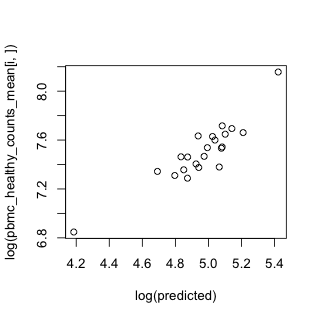

[1] 0.4696301

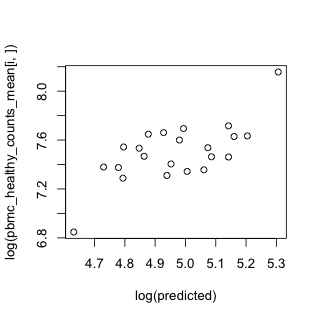

[1] 0.950548

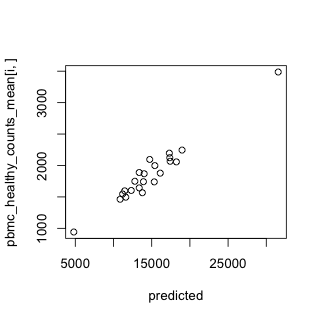

In [541]:
options(repr.plot.width = 4, repr.plot.height = 4)
i=10
i=grep("^CD22$",expr_gene_names)[1]
predicted <- rowSums(cbind(cm_healthy_counts_global_mean[i]*cm_healthy_prop/100,
                               th_healthy_counts_global_mean[i]*th_healthy_prop/100,
                               b_healthy_counts_global_mean[i]*b_healthy_prop/100,
                               nk_healthy_counts_global_mean[i]*nk_healthy_prop/100, 
                               ncm_healthy_counts_global_mean[i]*ncm_healthy_prop/100,
                               tc_healthy_counts_global_mean[i]*tc_healthy_prop/100,
                          dc_healthy_counts_global_mean[i]*dc_healthy_prop/100), na.rm=T)
plot(log(predicted), log(pbmc_healthy_counts_mean[i,]))
cor(predicted, pbmc_healthy_counts_mean[i,])^2*100
output_healthy_prop_noint[i,"adj r2"]

predicted <- rowSums(cbind(cm_healthy_counts_mean[i,]*cm_healthy_prop_global_mean, 
                              th_healthy_counts_mean[i,]*th_healthy_prop_global_mean, 
                              b_healthy_counts_mean[i,]*b_healthy_prop_global_mean,
                              nk_healthy_counts_mean[i,]*nk_healthy_prop_global_mean, 
                               ncm_healthy_counts_mean[i,]*ncm_healthy_prop_global_mean,
                              tc_healthy_counts_mean[i,]*tc_healthy_prop_global_mean,
                          dc_healthy_counts_mean[i,]*dc_healthy_prop_global_mean), na.rm=T)
plot(log(predicted), log(pbmc_healthy_counts_mean[i,]))
cor(predicted, pbmc_healthy_counts_mean[i,])^2


predicted <- rowSums(cbind(cm_healthy_counts_mean[i,]*cm_healthy_prop, 
                              th_healthy_counts_mean[i,]*th_healthy_prop, 
                              b_healthy_counts_mean[i,]*b_healthy_prop,
                              nk_healthy_counts_mean[i,]*nk_healthy_prop, 
                               ncm_healthy_counts_mean[i,]*ncm_healthy_prop,
                              tc_healthy_counts_mean[i,]*tc_healthy_prop,
                          dc_healthy_counts_mean[i,]*dc_healthy_prop), na.rm=T)
plot(predicted, pbmc_healthy_counts_mean[i,])
cor(predicted, pbmc_healthy_counts_mean[i,])^2

## Plotting

cor        prop_mean expr_mean sum_mean 
all_noint      -0.6135244 30.12053  71.26213  101.38265
sle_noint      -0.7066295 27.68660  70.58870   98.27530
sle_down_noint -0.3963608 26.66282  70.96730   97.63012
healthy_noint  -0.1888755 33.32799  90.15800  123.48599

cM        Th        B         NK       ncM      Tc       
all_noint_prop       7.248924  5.628587  3.345977 1.761226 2.333511  1.986999
all_noint_expr      14.492869 11.595982  4.692061 2.827747 3.743361 11.276601
sle_noint_prop       6.581046  4.461328  4.094777 1.949712 2.521178  2.437570
sle_noint_expr      16.467211 10.096615  4.674008 2.817013 3.968900 10.827871
sle_down_noint_prop  9.100343  6.282662  6.645943 4.506382 5.323095  4.076271
sle_down_noint_expr 17.716007 13.995249  6.081299 4.261502 5.876283 14.057547
healthy_noint_prop  11.932217  5.036646 12.878317 8.822333 9.416199 11.225602
healthy_noint_expr  16.068649 29.787771 11.669219 8.760767 7.234713 18.767798
                    DC        total.r2 adj.r2  
all_noint_prop       1.734870 24.04009 30.12053
all_noint_expr       1.526973 50.15559 71.26213
sle_noint_prop       2.064385 24.11000 27.68660
sle_noint_expr       1.456580 50.30820 70.58870
sle_down_noint_prop  6.842551 42.77725 26.66282
sle_down_noint_expr  3.319914 65.30780 70.96730
healthy_noint_prop  13.121665 72.43298 33.32799
healthy_noint_expr   6.380408 98.66933 90.15800

Warning message:
“Removed 3 rows containing missing values (geom_point).”

Warning message:
“Removed 3 rows containing missing values (geom_point).”

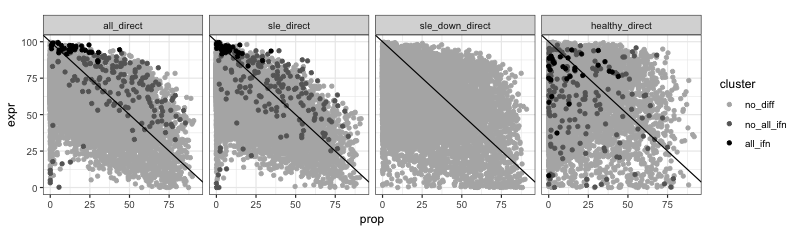

Warning message:
“Removed 3 rows containing missing values (geom_point).”

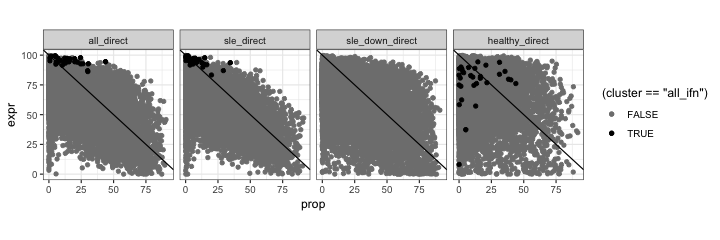

Warning message:
“Removed 3 rows containing missing values (geom_point).”

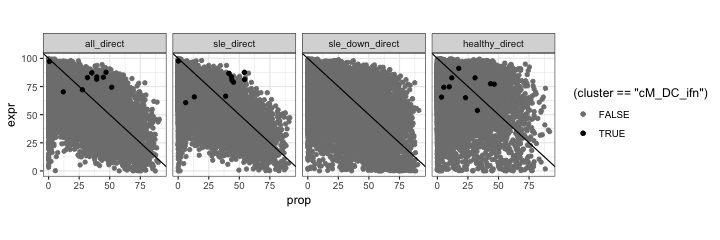

Warning message:
“Removed 3 rows containing missing values (geom_point).”

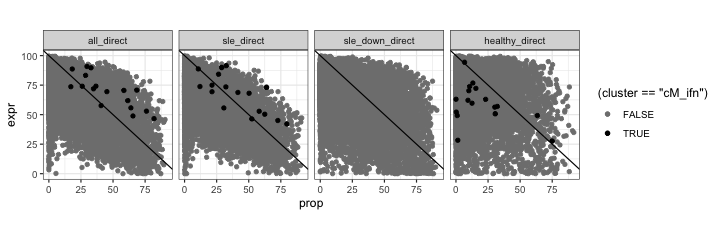

Warning message:
“Removed 3 rows containing missing values (geom_point).”

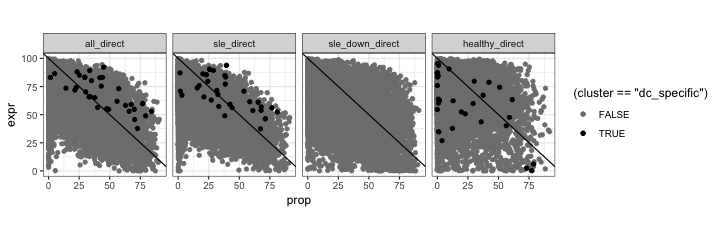

Warning message:
“Removed 3 rows containing missing values (geom_point).”

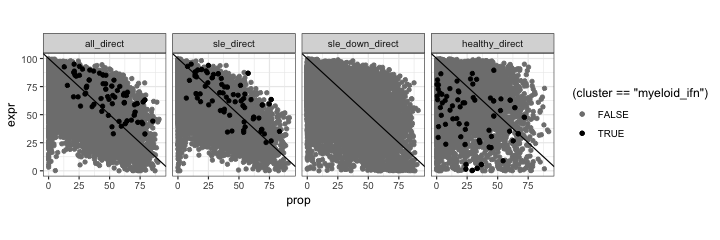

Warning message:
“Removed 3 rows containing missing values (geom_point).”Warning message:
“Removed 2 rows containing missing values (geom_point).”

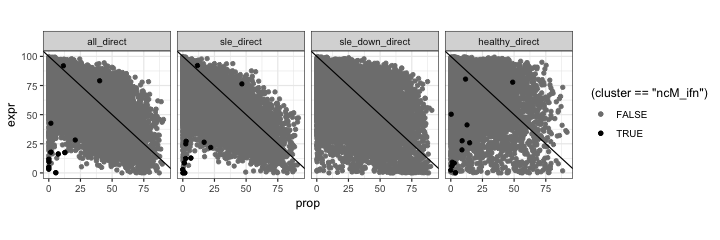

Warning message:
“Removed 3 rows containing missing values (geom_point).”

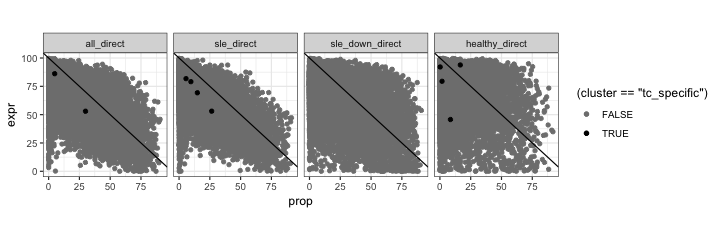

cor        prop_mean expr_mean sum_mean
all_direct      -0.5779571 20.13953  61.21830  81.35454
sle_direct      -0.6394277 18.21445  61.02096  79.23541
sle_down_direct -0.4372295 21.56922  63.30503  84.87425
healthy_direct  -0.2247550 14.16577  69.28118  83.44695

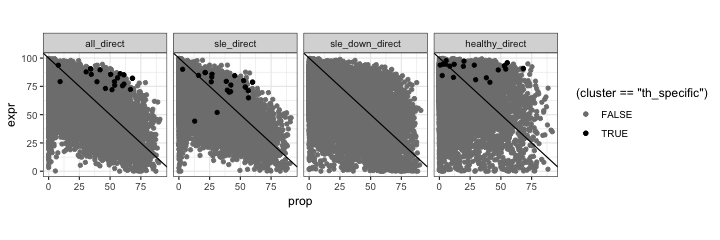

In [542]:
df2 <- data.frame(cor=c(cor(output_prop_noint[,"adj r2"], output_expr_noint[,"adj r2"]), cor(output_sle_prop_noint[,"adj r2"], output_sle_expr_noint[,"adj r2"]), cor(output_sle_down_prop_noint[,"adj r2"], output_sle_down_expr_noint[,"adj r2"]), cor(output_healthy_prop_noint[,"adj r2"], output_healthy_expr_noint[,"adj r2"])),
      prop_mean=c(mean(output_prop_noint[,"adj r2"]), mean(output_sle_prop_noint[,"adj r2"]), mean(output_sle_down_prop_noint[,"adj r2"]), mean(output_healthy_prop_noint[,"adj r2"])),
      expr_mean=c(mean(output_expr_noint[,"adj r2"]), mean(output_sle_expr_noint[,"adj r2"]), mean(output_sle_down_expr_noint[,"adj r2"]), mean(output_healthy_expr_noint[,"adj r2"])),
      sum_mean = c(mean(output_prop_noint[,"adj r2"]+output_expr_noint[,"adj r2"]), mean(output_sle_prop_noint[,"adj r2"]+output_sle_expr_noint[,"adj r2"]), mean(output_sle_down_prop_noint[,"adj r2"]+output_sle_down_expr_noint[,"adj r2"]), mean(output_healthy_prop_noint[,"adj r2"]+output_healthy_expr_noint[,"adj r2"])))
rownames(df2) <- c("all_noint", "sle_noint", "sle_down_noint", "healthy_noint")

df2

df3 <- rbind(data.frame(t(apply(output_prop_noint,2,mean,na.rm=T))),
            data.frame(t(apply(output_expr_noint,2,mean,na.rm=T))),
             data.frame(t(apply(output_sle_prop_noint,2,mean,na.rm=T))),
            data.frame(t(apply(output_sle_expr_noint,2,mean,na.rm=T))),
            data.frame(t(apply(output_sle_down_prop_noint,2,mean,na.rm=T))),
            data.frame(t(apply(output_sle_down_expr_noint,2,mean,na.rm=T))),
            data.frame(t(apply(output_healthy_prop_noint,2,mean,na.rm=T))),
            data.frame(t(apply(output_healthy_expr_noint,2,mean,na.rm=T))))

rownames(df3) <- c("all_noint_prop", "all_noint_expr", "sle_noint_prop", "sle_noint_expr", "sle_down_noint_prop", "sle_down_noint_expr", "healthy_noint_prop", "healthy_noint_expr")

df3


output_direct_global_df <- data.frame(prop=output_direct_global_prop[,1], expr=output_direct_global_expr[,1], type="all_direct")
output_direct_global_df$cluster <- "no_diff";
output_direct_global_df$cluster[na.omit(match(cuttree_out[,"gene"],rownames(output_direct_global_df)))] <- cuttree_out[,"cluster"];

output_sle_direct_global_df <- data.frame(prop=output_sle_direct_global_prop[,1], expr=output_sle_direct_global_expr[,1], type="sle_direct")
output_sle_direct_global_df$cluster <- "no_diff";
output_sle_direct_global_df$cluster[na.omit(match(cuttree_out[,"gene"],rownames(output_sle_direct_global_df)))] <- cuttree_out[,"cluster"];

output_sle_down_direct_global_df <- data.frame(prop=output_sle_down_direct_global_prop[,1], expr=output_sle_down_direct_global_expr[,1], type="sle_down_direct")
output_sle_down_direct_global_df$cluster <- "no_diff";
output_sle_down_direct_global_df$cluster[na.omit(match(cuttree_out[,"gene"],rownames(output_sle_down_direct_global_df)))] <- cuttree_out[,"cluster"];

output_healthy_direct_global_df <- data.frame(prop=output_healthy_direct_global_prop[,1], expr=output_healthy_direct_global_expr[,1], type="healthy_direct")
output_healthy_direct_global_df$cluster <- "no_diff";
output_healthy_direct_global_df$cluster[na.omit(match(cuttree_out[,"gene"],rownames(output_healthy_direct_global_df)))] <- cuttree_out[,"cluster"];

df <- rbind(output_direct_global_df, output_sle_direct_global_df, output_sle_down_direct_global_df, output_healthy_direct_global_df)
df$cluster <- as.factor(df$cluster)


options(repr.plot.width = 10, repr.plot.height = 3)
df_all_ifn <- df;
df_all_ifn$cluster <- as.character(df_all_ifn$cluster);
df_all_ifn$cluster[which(df_all_ifn$cluster != "no_diff" & df_all_ifn$cluster != "all_ifn")] <- "no_all_ifn";
df_all_ifn$cluster <- factor(df_all_ifn$cluster, levels=c("no_diff","no_all_ifn","all_ifn"));
df_all_ifn <- df_all_ifn[order(df_all_ifn$cluster),]
ggplot(aes(prop, expr,color=cluster), data=df_all_ifn)+geom_point()+facet_grid(~type)+theme_bw()+geom_abline(slope=-1,intercept=100)+scale_color_manual(values=c("gray70","gray40", "black"))+theme(aspect.ratio=1)


options(repr.plot.width = 9, repr.plot.height = 3)
ggplot(aes(prop, expr,color=(cluster=="all_ifn")), data=df)+geom_point()+facet_grid(~type)+theme_bw()+geom_point(data = subset(df, cluster == 'all_ifn'),
             aes(x = prop, y = expr, color = (cluster=="all_ifn")))+geom_abline(slope=-1,intercept=100)+scale_color_manual(values=c("gray50", "black"))+theme(aspect.ratio=1)
ggplot(aes(prop, expr,color=(cluster=="cM_DC_ifn")), data=df)+geom_point()+facet_grid(~type)+theme_bw()+geom_point(data = subset(df, cluster == 'cM_DC_ifn'),
             aes(x = prop, y = expr, color = (cluster=="cM_DC_ifn")))+geom_abline(slope=-1,intercept=100)+scale_color_manual(values=c("gray50", "black"))+theme(aspect.ratio=1)
ggplot(aes(prop, expr,color=(cluster=="cM_ifn")), data=df)+geom_point()+facet_grid(~type)+theme_bw()+geom_point(data = subset(df, cluster == 'cM_ifn'),
             aes(x = prop, y = expr, color = (cluster=="cM_ifn")))+geom_abline(slope=-1,intercept=100)+scale_color_manual(values=c("gray50", "black"))+theme(aspect.ratio=1)
ggplot(aes(prop, expr,color=(cluster=="dc_specific")), data=df)+geom_point()+facet_grid(~type)+theme_bw()+geom_point(data = subset(df, cluster == 'dc_specific'),
             aes(x = prop, y = expr, color = (cluster=="dc_specific")))+geom_abline(slope=-1,intercept=100)+scale_color_manual(values=c("gray50", "black"))+theme(aspect.ratio=1)
ggplot(aes(prop, expr,color=(cluster=="myeloid_ifn")), data=df)+geom_point()+facet_grid(~type)+theme_bw()+geom_point(data = subset(df, cluster == 'myeloid_ifn'),
             aes(x = prop, y = expr, color = (cluster=="myeloid_ifn")))+geom_abline(slope=-1,intercept=100)+scale_color_manual(values=c("gray50", "black"))+theme(aspect.ratio=1)
ggplot(aes(prop, expr,color=(cluster=="ncM_ifn")), data=df)+geom_point()+facet_grid(~type)+theme_bw()+geom_point(data = subset(df, cluster == 'ncM_ifn'),
             aes(x = prop, y = expr, color = (cluster=="ncM_ifn")))+geom_abline(slope=-1,intercept=100)+scale_color_manual(values=c("gray50", "black"))+theme(aspect.ratio=1)
ggplot(aes(prop, expr,color=(cluster=="tc_specific")), data=df)+geom_point()+facet_grid(~type)+theme_bw()+geom_point(data = subset(df, cluster == 'tc_specific'),
             aes(x = prop, y = expr, color = (cluster=="tc_specific")))+geom_abline(slope=-1,intercept=100)+scale_color_manual(values=c("gray50", "black"))+theme(aspect.ratio=1)
ggplot(aes(prop, expr,color=(cluster=="th_specific")), data=df)+geom_point()+facet_grid(~type)+theme_bw()+geom_point(data = subset(df, cluster == 'th_specific'),
             aes(x = prop, y = expr, color = (cluster=="th_specific")))+geom_abline(slope=-1,intercept=100)+scale_color_manual(values=c("gray50", "black"))+theme(aspect.ratio=1)

df2 <- data.frame(cor=c(cor(output_direct_global_prop[,1], output_direct_global_expr[,1],use='complete.obs'), 
                        cor(output_sle_direct_global_prop[,1], output_sle_direct_global_expr[,1],use='complete.obs'), 
                        cor(output_sle_down_direct_global_prop[,1], output_sle_down_direct_global_expr[,1],use='complete.obs'),
                        cor(output_healthy_direct_global_prop[,1], output_healthy_direct_global_expr[,1])),
      prop_mean=c(mean(output_direct_global_prop[,1],na.rm=T), mean(output_sle_direct_global_prop[,1],na.rm=T), mean(output_sle_down_direct_global_prop[,1],na.rm=T), mean(output_healthy_direct_global_prop[,1])),
      expr_mean=c(mean(output_direct_global_expr[,1]), mean(output_sle_direct_global_expr[,1]), mean(output_sle_down_direct_global_expr[,1]), mean(output_healthy_direct_global_expr[,1])),
      sum_mean = c(mean(output_direct_global_prop[,1]+output_direct_global_expr[,1],na.rm=T), mean(output_sle_direct_global_prop[,1]+output_sle_direct_global_expr[,1],na.rm=T), mean(output_sle_down_direct_global_prop[,1]+output_sle_down_direct_global_expr[,1],na.rm=T), mean(output_healthy_direct_global_prop[,1]+output_healthy_direct_global_expr[,1])))
rownames(df2) <- c("all_direct", "sle_direct", "sle_down_direct", "healthy_direct")

df2


## Compare to previous estimates using linear regression

Warning message:
“Removed 5033 rows containing missing values (geom_point).”

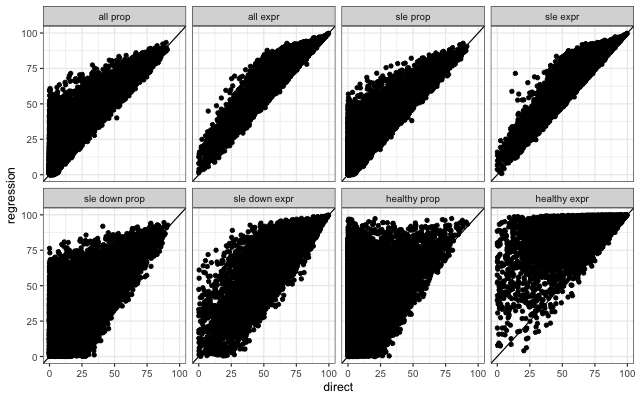

In [543]:
df <- rbind(data.frame(direct=output_direct_global_prop[,1], regression=output_prop_noint[,"adj r2"], type="all prop"),
            data.frame(direct=output_direct_global_expr[,1], regression=output_expr_noint[,"adj r2"], type="all expr"),
            
            data.frame(direct=output_sle_direct_global_prop[,1], regression=output_sle_prop_noint[,"adj r2"], type="sle prop"),
            data.frame(direct=output_sle_direct_global_expr[,1], regression=output_sle_expr_noint[,"adj r2"], type="sle expr"),
            
            data.frame(direct=output_sle_down_direct_global_prop[,1], regression=output_sle_down_prop_noint[,"adj r2"], type="sle down prop"),
            data.frame(direct=output_sle_down_direct_global_expr[,1], regression=output_sle_down_expr_noint[,"adj r2"], type="sle down expr"),
            
            data.frame(direct=output_healthy_direct_global_prop[,1], regression=output_healthy_prop_noint[,"adj r2"], type="healthy prop"),
            data.frame(direct=output_healthy_direct_global_expr[,1], regression=output_healthy_expr_noint[,"adj r2"], type="healthy expr"))
  
options(repr.plot.width = 8, repr.plot.height = 5)
ggplot(aes(direct, regression), data=df)+geom_point()+facet_wrap(~ type, nrow = 2)+theme_bw()+xlim(0,100)+ylim(0,100)+geom_abline(slope=1, intercept=0,
  na.rm = FALSE, show.legend = NA)
##ggplot(aes(direct, regression), data=df)+geom_point()+facet_wrap(~ type, nrow = 2)+theme_bw()+geom_abline(slope=1, intercept=0,
##  na.rm = FALSE, show.legend = NA)


In [506]:
cor(output_sle_direct_global_prop[,1], output_sle_prop_noint[,"adj r2"],use='complete.obs')
cor(output_sle_direct_global_expr[,1], output_sle_expr_noint[,"adj r2"])

cor(output_sle_down_direct_global_prop[,1], output_sle_down_prop_noint[,"adj r2"],use='complete.obs')
cor(output_sle_down_direct_global_expr[,1], output_sle_down_expr_noint[,"adj r2"])

cor(output_healthy_direct_global_prop[,1], output_healthy_prop_noint[,"adj r2"])
cor(output_healthy_direct_global_expr[,1], output_healthy_expr_noint[,"adj r2"])

[1] 0.8983682

[1] 0.9310379

[1] 0.8764412

[1] 0.9108841

[1] 0.4083191

[1] 0.5604086

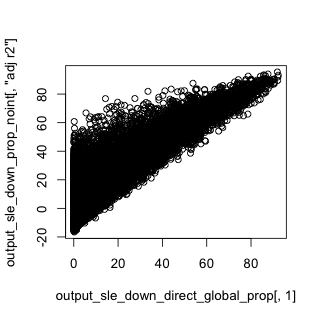

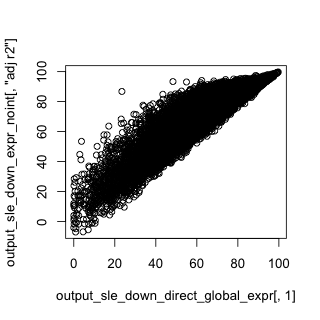

In [507]:
options(repr.plot.width = 4, repr.plot.height = 4)
plot(output_sle_down_direct_global_prop[,1], output_sle_down_prop_noint[,"adj r2"])
plot(output_sle_down_direct_global_expr[,1], output_sle_down_expr_noint[,"adj r2"])


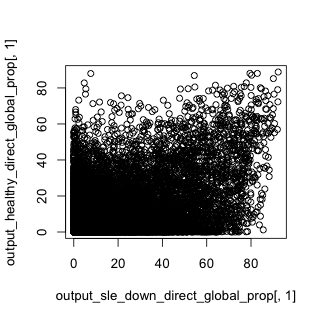

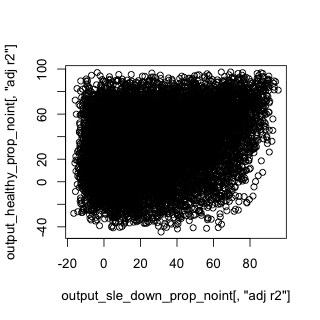

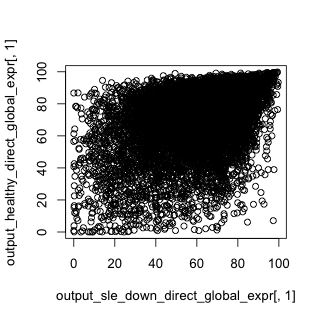

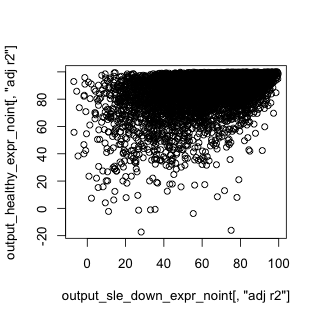

In [508]:
options(repr.plot.width = 4, repr.plot.height = 4)
plot(output_sle_down_direct_global_prop[,1], output_healthy_direct_global_prop[,1])
plot(output_sle_down_prop_noint[,"adj r2"], output_healthy_prop_noint[,"adj r2"])
plot(output_sle_down_direct_global_expr[,1], output_healthy_direct_global_expr[,1])
plot(output_sle_down_expr_noint[,"adj r2"], output_healthy_expr_noint[,"adj r2"])

# Load the cell type proportion estimates using the ```joined_pivot.txt``` generated by the Figure 1 code

In [509]:
# ifn = read.table("v2.ifn.sig.txt", sep=" ",header=T)
# ifn$name = sapply(ifn$name, function(x) {strsplit(as.character(x), "_")[[1]][[1]]})
# ifn

# match(colnames(pbmc_expr),joined_pivot$ind_cov)

# Correlate cell type specific expression with over all expression

No id variables; using all as measure variables
No id variables; using all as measure variables


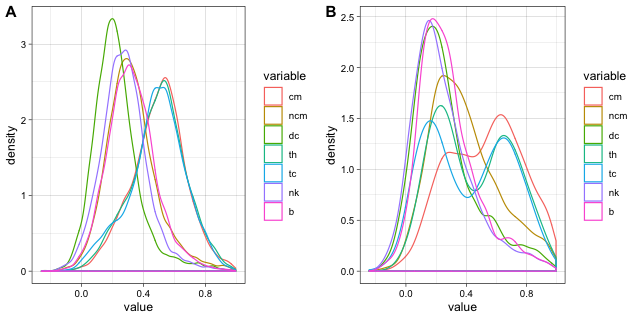

In [510]:
pbmc_cm_expr_cor <- sapply(1:nrow(pbmc_expr), function(i) {cor(pbmc_expr[i,],cm_expr[i,],use='complete.obs')})
pbmc_th_expr_cor <- sapply(1:nrow(pbmc_expr), function(i) {cor(pbmc_expr[i,],th_expr[i,],use='complete.obs')})
pbmc_b_expr_cor <- sapply(1:nrow(pbmc_expr), function(i) {cor(pbmc_expr[i,],b_expr[i,],use='complete.obs')})
pbmc_nk_expr_cor <- sapply(1:nrow(pbmc_expr), function(i) {cor(pbmc_expr[i,],nk_expr[i,],use='complete.obs')})
pbmc_ncm_expr_cor <- sapply(1:nrow(pbmc_expr), function(i) {cor(pbmc_expr[i,],ncm_expr[i,],use='complete.obs')})
pbmc_tc_expr_cor <- sapply(1:nrow(pbmc_expr), function(i) {cor(pbmc_expr[i,],tc_expr[i,],use='complete.obs')})
pbmc_dc_expr_cor <- sapply(1:nrow(pbmc_expr), function(i) {cor(pbmc_expr[i,],dc_expr[i,],use='complete.obs')})

mat_expr_cor <- data.frame(cm=pbmc_cm_expr_cor,
                           ncm=pbmc_ncm_expr_cor,
                             dc=pbmc_dc_expr_cor,
                           th=pbmc_th_expr_cor,
                           tc=pbmc_tc_expr_cor,
                          nk=pbmc_nk_expr_cor,
                          b=pbmc_b_expr_cor)
df_expr_cor <- melt(mat_expr_cor)
ggplot1 <- ggplot(aes(value,color=variable), data=df_expr_cor)+geom_density()+theme_linedraw();

mat_expr_cor_sig <- mat_expr_cor[match(pbmc_deseq_sig,expr_gene_names),]
df_expr_cor_sig <- melt(mat_expr_cor_sig)
ggplot2 <- ggplot(aes(value,color=variable), data=df_expr_cor_sig)+geom_density()+theme_linedraw();

options(repr.plot.width = 8, repr.plot.height = 4)
plot_grid(ggplot1, ggplot2, labels = "AUTO")

## Let's plot the shifts in distribution for just the SLE samples

No id variables; using all as measure variables
No id variables; using all as measure variables


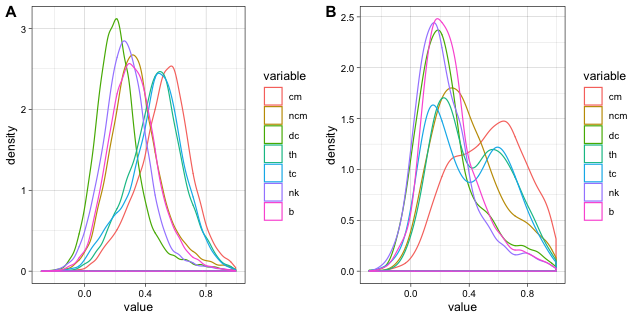

In [511]:
pbmc_cm_sle_expr_cor <- sapply(1:nrow(pbmc_sle_expr), function(i) {cor(pbmc_sle_expr[i,],cm_sle_expr[i,],use='complete.obs')})
pbmc_th_sle_expr_cor <- sapply(1:nrow(pbmc_sle_expr), function(i) {cor(pbmc_sle_expr[i,],th_sle_expr[i,],use='complete.obs')})
pbmc_b_sle_expr_cor <- sapply(1:nrow(pbmc_sle_expr), function(i) {cor(pbmc_sle_expr[i,],b_sle_expr[i,],use='complete.obs')})
pbmc_nk_sle_expr_cor <- sapply(1:nrow(pbmc_sle_expr), function(i) {cor(pbmc_sle_expr[i,],nk_sle_expr[i,],use='complete.obs')})
pbmc_ncm_sle_expr_cor <- sapply(1:nrow(pbmc_sle_expr), function(i) {cor(pbmc_sle_expr[i,],ncm_sle_expr[i,],use='complete.obs')})
pbmc_tc_sle_expr_cor <- sapply(1:nrow(pbmc_sle_expr), function(i) {cor(pbmc_sle_expr[i,],tc_sle_expr[i,],use='complete.obs')})
pbmc_dc_sle_expr_cor <- sapply(1:nrow(pbmc_sle_expr), function(i) {cor(pbmc_sle_expr[i,],dc_sle_expr[i,],use='complete.obs')})

mat_sle_expr_cor <- data.frame(cm=pbmc_cm_sle_expr_cor,
                           ncm=pbmc_ncm_sle_expr_cor,
                             dc=pbmc_dc_sle_expr_cor,
                           th=pbmc_th_sle_expr_cor,
                           tc=pbmc_tc_sle_expr_cor,
                          nk=pbmc_nk_sle_expr_cor,
                          b=pbmc_b_sle_expr_cor)
df_sle_expr_cor <- melt(mat_sle_expr_cor)
ggplot1 <- ggplot(aes(value,color=variable), data=df_sle_expr_cor)+geom_density()+theme_linedraw();

mat_sle_expr_cor_sig <- mat_sle_expr_cor[match(pbmc_deseq_sig,expr_gene_names),]
df_sle_expr_cor_sig <- melt(mat_sle_expr_cor_sig)
ggplot2 <- ggplot(aes(value,color=variable), data=df_sle_expr_cor_sig)+geom_density()+theme_linedraw();

options(repr.plot.width = 8, repr.plot.height = 4)
plot_grid(ggplot1, ggplot2, labels = "AUTO")

## Let's plot the shifts in distribution for just the healthy samples

No id variables; using all as measure variables
No id variables; using all as measure variables


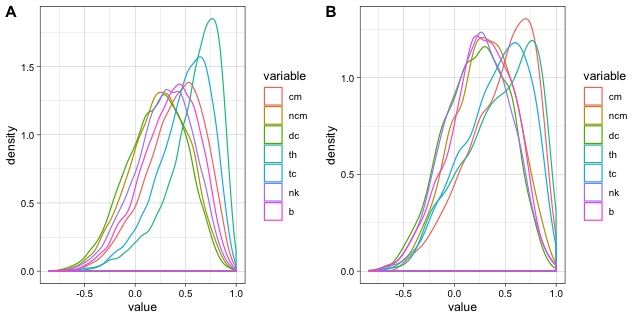

In [512]:
pbmc_cm_healthy_expr_cor <- sapply(1:nrow(pbmc_healthy_expr), function(i) {cor(pbmc_healthy_expr[i,],cm_healthy_expr[i,],use='complete.obs')})
pbmc_th_healthy_expr_cor <- sapply(1:nrow(pbmc_healthy_expr), function(i) {cor(pbmc_healthy_expr[i,],th_healthy_expr[i,],use='complete.obs')})
pbmc_b_healthy_expr_cor <- sapply(1:nrow(pbmc_healthy_expr), function(i) {cor(pbmc_healthy_expr[i,],b_healthy_expr[i,],use='complete.obs')})
pbmc_nk_healthy_expr_cor <- sapply(1:nrow(pbmc_healthy_expr), function(i) {cor(pbmc_healthy_expr[i,],nk_healthy_expr[i,],use='complete.obs')})
pbmc_ncm_healthy_expr_cor <- sapply(1:nrow(pbmc_healthy_expr), function(i) {cor(pbmc_healthy_expr[i,],ncm_healthy_expr[i,],use='complete.obs')})
pbmc_tc_healthy_expr_cor <- sapply(1:nrow(pbmc_healthy_expr), function(i) {cor(pbmc_healthy_expr[i,],tc_healthy_expr[i,],use='complete.obs')})
pbmc_dc_healthy_expr_cor <- sapply(1:nrow(pbmc_healthy_expr), function(i) {cor(pbmc_healthy_expr[i,],dc_healthy_expr[i,],use='complete.obs')})

mat_healthy_expr_cor <- data.frame(cm=pbmc_cm_healthy_expr_cor,
                           ncm=pbmc_ncm_healthy_expr_cor,
                             dc=pbmc_dc_healthy_expr_cor,
                           th=pbmc_th_healthy_expr_cor,
                           tc=pbmc_tc_healthy_expr_cor,
                          nk=pbmc_nk_healthy_expr_cor,
                          b=pbmc_b_healthy_expr_cor)
df_healthy_expr_cor <- melt(mat_healthy_expr_cor)
ggplot1 <- ggplot(aes(value,color=variable), data=df_healthy_expr_cor)+geom_density()+theme_linedraw();

mat_healthy_expr_cor_sig <- mat_healthy_expr_cor[match(pbmc_deseq_sig,expr_gene_names),]
df_healthy_expr_cor_sig <- melt(mat_healthy_expr_cor_sig)
ggplot2 <- ggplot(aes(value,color=variable), data=df_healthy_expr_cor_sig)+geom_density()+theme_linedraw();

options(repr.plot.width = 8, repr.plot.height = 4)
plot_grid(ggplot1, ggplot2, labels = "AUTO")

# Let's look at contribution to total gene expression from each of the cell types

In [513]:
pbmc_cm_counts_rat <- sapply(1:nrow(pbmc_counts), function(i) {mean(cm_counts[i,]/pbmc_counts[i,],na.rm=T)});
pbmc_ncm_counts_rat <- sapply(1:nrow(pbmc_counts), function(i) {mean(ncm_counts[i,]/pbmc_counts[i,],na.rm=T)});
pbmc_th_counts_rat <- sapply(1:nrow(pbmc_counts), function(i) {mean(th_counts[i,]/pbmc_counts[i,],na.rm=T)});
pbmc_tc_counts_rat <- sapply(1:nrow(pbmc_counts), function(i) {mean(tc_counts[i,]/pbmc_counts[i,],na.rm=T)});
pbmc_nk_counts_rat <- sapply(1:nrow(pbmc_counts), function(i) {mean(nk_counts[i,]/pbmc_counts[i,],na.rm=T)});
pbmc_b_counts_rat <- sapply(1:nrow(pbmc_counts), function(i) {mean(b_counts[i,]/pbmc_counts[i,],na.rm=T)});
pbmc_dc_counts_rat <- sapply(1:nrow(pbmc_counts), function(i) {mean(dc_counts[i,]/pbmc_counts[i,],na.rm=T)});

No id variables; using all as measure variables
No id variables; using all as measure variables
Warning message:
“Removed 103367 rows containing non-finite values (stat_density).”Warning message:
“Removed 4940 rows containing non-finite values (stat_density).”

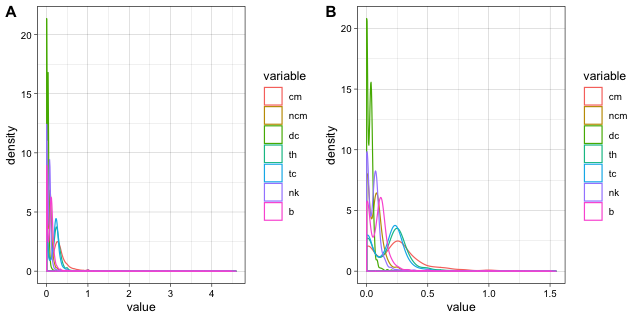

In [514]:
mat_counts_rat <- data.frame(cm=pbmc_cm_counts_rat,
                           ncm=pbmc_ncm_counts_rat,
                            dc=pbmc_dc_counts_rat,
                           th=pbmc_th_counts_rat,
                           tc=pbmc_tc_counts_rat,
                          nk=pbmc_nk_counts_rat,
                          b=pbmc_b_counts_rat)
df_counts_rat <- melt(mat_counts_rat)
ggplot1 <- ggplot(aes(value,color=variable), data=df_counts_rat)+geom_density()+theme_linedraw();

mat_counts_rat_sig <- mat_counts_rat[match(pbmc_deseq_sig,expr_gene_names),]
df_counts_rat_sig <- melt(mat_counts_rat_sig)
ggplot2 <- ggplot(aes(value,color=variable), data=df_counts_rat_sig)+geom_density()+theme_linedraw(); ##geom_histogram(alpha=0.2, position="identity")

options(repr.plot.width = 8, repr.plot.height = 4)
plot_grid(ggplot1, ggplot2, labels = "AUTO")

# Correlate cell type proportion estimate with overall expression

No id variables; using all as measure variables
No id variables; using all as measure variables


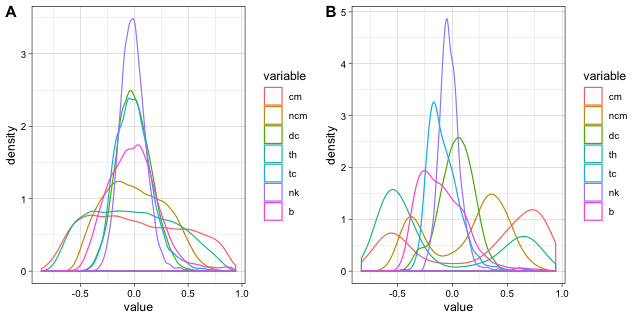

In [515]:
pbmc_cm_prop_cor <- sapply(1:nrow(pbmc_expr), function(i) {cor(pbmc_expr[i,],cm_prop,use='complete.obs')})
pbmc_th_prop_cor <- sapply(1:nrow(pbmc_expr), function(i) {cor(pbmc_expr[i,],th_prop,use='complete.obs')})
pbmc_b_prop_cor <- sapply(1:nrow(pbmc_expr), function(i) {cor(pbmc_expr[i,],b_prop,use='complete.obs')})
pbmc_nk_prop_cor <- sapply(1:nrow(pbmc_expr), function(i) {cor(pbmc_expr[i,],nk_prop,use='complete.obs')})
pbmc_ncm_prop_cor <- sapply(1:nrow(pbmc_expr), function(i) {cor(pbmc_expr[i,],ncm_prop,use='complete.obs')})
pbmc_tc_prop_cor <- sapply(1:nrow(pbmc_expr), function(i) {cor(pbmc_expr[i,],tc_prop,use='complete.obs')})
pbmc_dc_prop_cor <- sapply(1:nrow(pbmc_expr), function(i) {cor(pbmc_expr[i,],dc_prop,use='complete.obs')})

mat_prop_cor <- data.frame(cm=pbmc_cm_prop_cor,
                           ncm=pbmc_ncm_prop_cor,
                           dc=pbmc_dc_prop_cor,
                           th=pbmc_th_prop_cor,
                           tc=pbmc_tc_prop_cor,
                          nk=pbmc_nk_prop_cor,
                          b=pbmc_b_prop_cor)
df_prop_cor <- melt(mat_prop_cor)
ggplot1 = ggplot(aes(value,color=variable), data=df_prop_cor)+geom_density()+theme_linedraw(); ##geom_histogram(alpha=0.2, position="identity")

mat_prop_cor_sig <- mat_prop_cor[match(pbmc_deseq_sig,expr_gene_names),]
df_prop_cor_sig <- melt(mat_prop_cor_sig)
ggplot2 = ggplot(aes(value,color=variable), data=df_prop_cor_sig)+geom_density()+theme_linedraw(); ##geom_histogram(alpha=0.2, position="identity")

options(repr.plot.width = 8, repr.plot.height = 4)
plot_grid(ggplot1, ggplot2, labels = "AUTO")


No id variables; using all as measure variables
No id variables; using all as measure variables


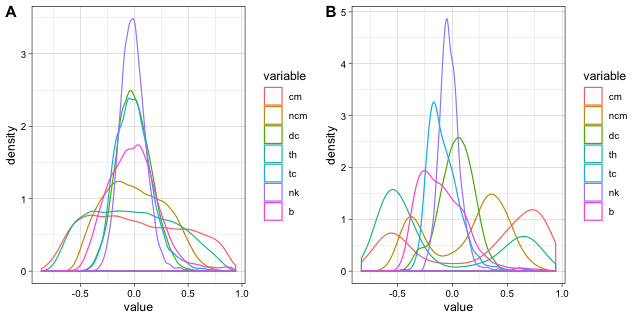

In [516]:
pbmc_std_expr <- t(apply(pbmc_expr,1,standardize));

pbmc_std_cm_prop_cor <- sapply(1:nrow(pbmc_std_expr), function(i) {cor(pbmc_std_expr[i,],cm_prop,use='complete.obs')})
pbmc_std_th_prop_cor <- sapply(1:nrow(pbmc_std_expr), function(i) {cor(pbmc_std_expr[i,],th_prop,use='complete.obs')})
pbmc_std_b_prop_cor <- sapply(1:nrow(pbmc_std_expr), function(i) {cor(pbmc_std_expr[i,],b_prop,use='complete.obs')})
pbmc_std_nk_prop_cor <- sapply(1:nrow(pbmc_std_expr), function(i) {cor(pbmc_std_expr[i,],nk_prop,use='complete.obs')})
pbmc_std_ncm_prop_cor <- sapply(1:nrow(pbmc_std_expr), function(i) {cor(pbmc_std_expr[i,],ncm_prop,use='complete.obs')})
pbmc_std_tc_prop_cor <- sapply(1:nrow(pbmc_std_expr), function(i) {cor(pbmc_std_expr[i,],tc_prop,use='complete.obs')})
pbmc_std_dc_prop_cor <- sapply(1:nrow(pbmc_std_expr), function(i) {cor(pbmc_std_expr[i,],dc_prop,use='complete.obs')})

mat_prop_cor <- data.frame(cm=pbmc_std_cm_prop_cor,
                           ncm=pbmc_std_ncm_prop_cor,
                           dc=pbmc_std_dc_prop_cor,
                           th=pbmc_std_th_prop_cor,
                           tc=pbmc_std_tc_prop_cor,
                          nk=pbmc_std_nk_prop_cor,
                          b=pbmc_std_b_prop_cor)
df_prop_cor <- melt(mat_prop_cor)
ggplot1 = ggplot(aes(value,color=variable), data=df_prop_cor)+geom_density()+theme_linedraw(); ##geom_histogram(alpha=0.2, position="identity")

mat_prop_cor_sig <- mat_prop_cor[match(pbmc_deseq_sig,expr_gene_names),]
df_prop_cor_sig <- melt(mat_prop_cor_sig)
ggplot2 = ggplot(aes(value,color=variable), data=df_prop_cor_sig)+geom_density()+theme_linedraw(); ##geom_histogram(alpha=0.2, position="identity")

options(repr.plot.width = 8, repr.plot.height = 4)
plot_grid(ggplot1, ggplot2, labels = "AUTO")


## Some sanity checking code

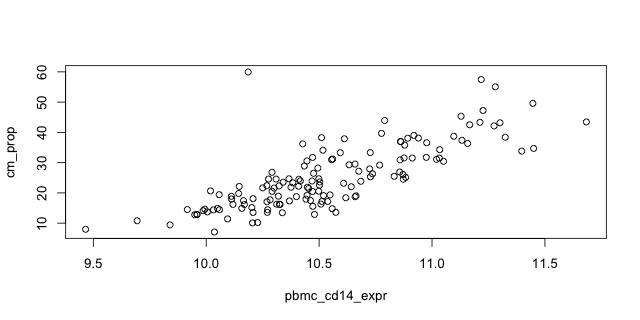

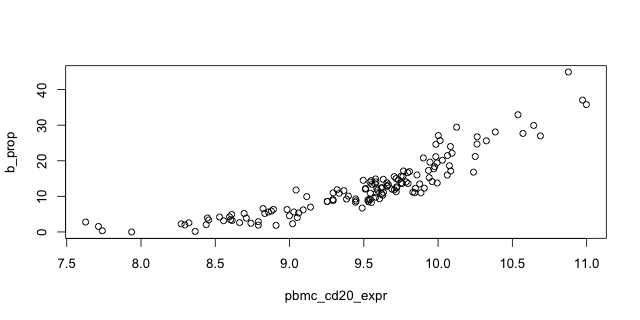

In [517]:
pbmc_cd14_expr = pbmc_expr[which(expr_gene_names=="CD14"),];
plot(pbmc_cd14_expr,cm_prop)

pbmc_cd20_expr = pbmc_expr[which(expr_gene_names=="MS4A1"),];
plot(pbmc_cd20_expr,b_prop)

In [518]:
cor(pbmc_cd14_expr, cm_prop, use='complete.obs')

[1] 0.7781012

In [519]:
counts <- fread("counts.txt",sep=",")
counts$V1 <- sapply(counts$V1, function(x) {strsplit(x,"_")[[1]][[1]]})
counts <- counts[match(colnames(pbmc_counts),counts$V1),]

In [520]:
pbmc_counts_norm <- as.matrix(sweep(pbmc_counts, 2, counts$V2, "/"))
pbmc_counts <- as.matrix(pbmc_counts) ##pbmc_counts_norm <- sapply(1:ncol(pbmc_counts), function(i) {pbmc_counts[,..i]/counts$V2[match(colnames(pbmc_counts)[i],counts$V1)]})

In [521]:
pbmc_cd14_counts <- pbmc_counts[which(counts_gene_names=="CD14"),match(joined_pivot_filtered$ind_cov,colnames(pbmc_counts))]
plot(log2(pbmc_cd14_counts), cm_prop)

ERROR: Error in xy.coords(x, y, xlabel, ylabel, log): 'x' and 'y' lengths differ


In [ ]:
pbmc_cd14_counts_norm <- pbmc_counts_norm[which(counts_gene_names=="CD14"),match(joined_pivot_filtered$ind_cov,colnames(pbmc_counts))]
plot(log2(pbmc_cd14_counts_norm), cm_prop)

In [ ]:
cor(log2(pbmc_cd14_counts), cm_prop,use='complete')

In [ ]:
cor(log2(pbmc_cd14_counts_norm), cm_prop,use='complete')

In [ ]:
plot(pbmc_cm_prop_cor, pbmc_cm_expr_cor)

## Do a formal test for significance to expression and proportion

In [ ]:
pbmc_cm_expr_r2 <- sapply(1:nrow(pbmc_expr), function(i) {summary(lm(pbmc_expr[i,]~cm_expr[i,]))$r.squared})
pbmc_cm_expr_p <- sapply(1:nrow(pbmc_expr), function(i) {anova(lm(pbmc_expr[i,]~cm_expr[i,]))$"Pr(>F)"}[[1]])

In [ ]:
pbmc_cm_prop_r2 <- sapply(1:nrow(pbmc_expr), function(i) {summary(lm(pbmc_expr[i,]~cm_prop))$r.squared})
pbmc_cm_prop_p <- sapply(1:nrow(pbmc_expr), function(i) {anova(lm(pbmc_expr[i,]~cm_prop))$"Pr(>F)"}[[1]])

In [ ]:
pbmc_cm_expr_prop_r2 <- sapply(1:nrow(pbmc_expr), function(i) {summary(lm(pbmc_expr[i,]~cm_expr[i,]+cm_prop))$r.squared})
pbmc_cm_expr_prop_p <- sapply(1:nrow(pbmc_expr), function(i) {anova(lm(pbmc_expr[i,]~cm_expr[i,]+cm_prop))$"Pr(>F)"}[[1]])

In [ ]:
cm_expr_cm_prop_r2 <- sapply(1:nrow(cm_expr), function(i) {summary(lm(cm_expr[i,]~cm_prop))$r.squared})
cm_expr_cm_prop_p <- sapply(1:nrow(cm_expr), function(i) {anova(lm(cm_expr[i,]~cm_prop))$"Pr(>F)"}[[1]])

In [ ]:
plot(-log10(pbmc_cm_prop_p), -log10(pbmc_cm_expr_p))
pbmc_cm_prop_sig <- which(pbmc_cm_prop_p<1e-15)
pbmc_cm_expr_sig <- which(pbmc_cm_expr_p<1e-30)
#text(-log10(cd14_prop_p)[cd14_prop_sig], -log10(cd14_expr_p)[cd14_prop_sig], labels=gene_names[cd14_prop_sig], col="red")
#text(-log10(cd14_prop_p)[cd14_expr_sig], -log10(cd14_expr_p)[cd14_expr_sig], labels=gene_names[cd14_expr_sig], col="blue")

In [ ]:
pbmc_cm_total_r2 = pbmc_cm_prop_r2+pbmc_cm_expr_r2

In [ ]:
plot(pbmc_cm_prop_r2/pbmc_cm_expr_prop_r2, pbmc_cm_expr_prop_r2)

In [ ]:
# ## let's get the batch information
# covars <- fread("/ye/yelabstore2/10x.lupus/eqtls/v2/v2.covs.csv",header=T)
# covars <- covars[,c("ind", "well", "disease", "pop", "batch")]
# covars <- covars[!duplicated(covars$ind),]
# covars$ind[grep("1891",covars$ind)] <- "1891";
# covars$ind[grep("1221",covars$ind)] <- "1221";
# covars$ind[grep("1251",covars$ind)] <- "1251";

# ifn <- fread("v2.ifn.sig.txt");
# ifn$V1[grep("1891",ifn$V1)] <- "1891";
# ifn$V1[grep("1221",ifn$V1)] <- "1221";
# ifn$V1[grep("1251",ifn$V1)] <- "1251";


# ## get clinical data
# clinical = fread("/ye/yelabstore2/10x.lupus/clinical.data/v2/v2.clinical.data.txt",header=T,sep="\t")
# clinical$genotypeid[grep("1891",clinical$genotypeid)] <- "1891";
# clinical$genotypeid[grep("1221",clinical$genotypeid)] <- "1221";
# clinical$genotypeid[grep("1251",clinical$genotypeid)] <- "1251";

# cd14.rst <- pca_cell_type_plot("CD14+.Monocytes", covars, ifn, clinical)
# pbmc.rst <- pca_cell_type_plot("PBMC", covars, ifn, clinical)
# cd4.rst <- pca_cell_type_plot("CD4.T.cells", covars, ifn, clinical)
# cd19.rst <- pca_cell_type_plot("B.cells", covars, ifn, clinical)


# # healthy <- fread("v2.healthy.PBMC.expr.matrix.eqtl.txt")
# # sle <- fread("v2.PBMC.expr.matrix.eqtl.txt")

# # gene.names <- healthy$gene;

# # all <- cbind(healthy[,-1], sle[,-1]);

# # all.log <- log2(all);
# # sle.log <- log2(sle[,-1]);
# # all.log.norm <- apply(all.log, 2, function(x) {(x-mean(x))})
# # all.log.std <- t(apply(all.log.norm, 1, function(x) {(x-mean(x))/sd(x)}))

# # all.prcomp <- prcomp(all.log.std);

# # pdf("prcomp.pdf");
# # plot(all.prcomp$rotation[,c(1,2)]);
# # dev.off();

# # sle.prcomp <- prcomp(sle.log);

# # pdf("prcomp.sle.pdf");
# # plot(sle.prcomp$rotation[,c(1,2)]);
# # dev.off();

# # healthy.cd4 <- fread("v2.healthy.CD4.T.cells.expr.matrix.eqtl.txt")
# # sle.cd4 <- fread("v2.CD4.T.cells.expr.matrix.eqtl.txt")

# # all.cd4 <- cbind(healthy.cd4[,-1], sle.cd4[,-1])

# # all.cd4.log <- log2(all.cd4);
# # sle.cd4.log <- log2(sle.cd4[,-1]);

# # all.cd4.prcomp <- prcomp(all.cd4.log[-which(is.na(rowSums(all.cd4.log))),]);


# # pdf("cd4.prcomp.pdf");
# # plot(all.cd4.prcomp$rotation[,c(1,2)]);
# # dev.off();